## Ramesh Gopinath's TVS Hackathon Submission 1

## Importing Necessary Libraries

In [1]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## 1 Data Cleaning

In [138]:
Train_set_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Project/Hackathon/Train_Set_TVS.csv")

Test_set_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Project/Hackathon/Test_Set_TVS.csv")

In [139]:
print("Train set shape",Train_set_df.shape)
print("Test set shape", Test_set_df.shape)

Train set shape (132440, 33)
Test set shape (56760, 32)


In [140]:
Original_Train_set = Train_set_df.copy()
Original_Test_set = Test_set_df.copy()

In [6]:
Train_set_df.dtypes

ID                      int64
Compensation          float64
Vehicle_Status         object
Loan_amt              float64
Annuity_amt           float64
density_Ind           float64
Job_Type               object
Default_hist           object
Prop_List              object
Home_Appliances       float64
Region_Type            object
Credit_Inq             object
Education_det          object
Marital_Stat           object
Gen                    object
Credit_Lnks            object
Experience            float64
Income_Alt             object
Day_Process            object
Ph.No                  object
Type_Loan              object
Dependents            float64
Company_Rating        float64
Region                 object
Age                   float64
hour_Process          float64
Addr_permanent         object
Permanent_Addr_tag     object
c1_rated              float64
c2_rated              float64
Contact_age           float64
Product_bought        float64
Default               float64
dtype: obj

In [7]:
Test_set_df.dtypes

ID                      int64
Compensation          float64
Vehicle_Status         object
Loan_amt              float64
Annuity_amt           float64
density_Ind           float64
Job_Type               object
Default_hist           object
Prop_List              object
Home_Appliances       float64
Region_Type            object
Credit_Inq             object
Education_det          object
Marital_Stat           object
Gen                    object
Credit_Lnks            object
Experience            float64
Income_Alt             object
Day_Process            object
Ph.No                  object
Type_Loan              object
Dependents            float64
Company_Rating        float64
Region                 object
Age                   float64
hour_Process          float64
Addr_permanent         object
Permanent_Addr_tag     object
c1_rated              float64
c2_rated              float64
Contact_age           float64
Product_bought        float64
dtype: object

In [8]:
def chk_miss(df):

    for i in df.columns:
        percent_missing = df[i].isnull().sum() * 100 / len(df[i])
        if percent_missing:
            print("column is ",i)
            print("% missing",percent_missing)
            print("")

In [9]:
chk_miss(Train_set_df)

column is  Compensation
% missing 4.7130776200543645

column is  Vehicle_Status
% missing 6.874056176381758

column is  Annuity_amt
% missing 3.4815765629719118

column is  density_Ind
% missing 4.089398973119903

column is  Job_Type
% missing 7.73784355179704

column is  Prop_List
% missing 1.4836907278767744

column is  Home_Appliances
% missing 8.278465720326185

column is  Credit_Inq
% missing 2.031108426457264

column is  Experience
% missing 16.49426155240109

column is  Income_Alt
% missing 5.800362428269405

column is  Company_Rating
% missing 8.857595892479614

column is  c1_rated
% missing 13.223346421020839

column is  c2_rated
% missing 10.05813953488372

column is  Contact_age
% missing 6.155995167623074



In [10]:
chk_miss(Test_set_df)  #...... checking for missing values in Test data

column is  Compensation
% missing 4.844961240310077

column is  Vehicle_Status
% missing 6.841085271317829

column is  Annuity_amt
% missing 3.4584214235377027

column is  density_Ind
% missing 4.008104298801973

column is  Job_Type
% missing 7.6109936575052854

column is  Prop_List
% missing 1.6050035236081748

column is  Home_Appliances
% missing 8.384425651867513

column is  Credit_Inq
% missing 2.054263565891473

column is  Experience
% missing 16.47463002114165

column is  Income_Alt
% missing 5.8121916842847074

column is  Company_Rating
% missing 8.902396053558844

column is  c1_rated
% missing 12.97216349541931

column is  c2_rated
% missing 9.963002114164905

column is  Contact_age
% missing 6.20507399577167



In [11]:
# Checking for missing values
print('Number of missing values across columns-\n', Train_set_df.isnull().sum())

Number of missing values across columns-
 ID                        0
Compensation           6242
Vehicle_Status         9104
Loan_amt                  0
Annuity_amt            4611
density_Ind            5416
Job_Type              10248
Default_hist              0
Prop_List              1965
Home_Appliances       10964
Region_Type               0
Credit_Inq             2690
Education_det             0
Marital_Stat              0
Gen                       0
Credit_Lnks               0
Experience            21845
Income_Alt             7682
Day_Process               0
Ph.No                     0
Type_Loan                 0
Dependents                0
Company_Rating        11731
Region                    0
Age                       0
hour_Process              0
Addr_permanent            0
Permanent_Addr_tag        0
c1_rated              17513
c2_rated              13321
Contact_age            8153
Product_bought            0
Default                   0
dtype: int64


In [12]:
# Checking for missing values in Test set
print('Number of missing values in Test set across columns-\n', Test_set_df.isnull().sum())

Number of missing values in Test set across columns-
 ID                       0
Compensation          2750
Vehicle_Status        3883
Loan_amt                 0
Annuity_amt           1963
density_Ind           2275
Job_Type              4320
Default_hist             0
Prop_List              911
Home_Appliances       4759
Region_Type              0
Credit_Inq            1166
Education_det            0
Marital_Stat             0
Gen                      0
Credit_Lnks              0
Experience            9351
Income_Alt            3299
Day_Process              0
Ph.No                    0
Type_Loan                0
Dependents               0
Company_Rating        5053
Region                   0
Age                      0
hour_Process             0
Addr_permanent           0
Permanent_Addr_tag       0
c1_rated              7363
c2_rated              5655
Contact_age           3522
Product_bought           0
dtype: int64


There are lots of missing rows in the Training_set & Testing set, similar features (columns) seem to be missing data in both Training and Testing it is better to impute them with Nearest neighbour


In [13]:
Train_set_df.dtypes

ID                      int64
Compensation          float64
Vehicle_Status         object
Loan_amt              float64
Annuity_amt           float64
density_Ind           float64
Job_Type               object
Default_hist           object
Prop_List              object
Home_Appliances       float64
Region_Type            object
Credit_Inq             object
Education_det          object
Marital_Stat           object
Gen                    object
Credit_Lnks            object
Experience            float64
Income_Alt             object
Day_Process            object
Ph.No                  object
Type_Loan              object
Dependents            float64
Company_Rating        float64
Region                 object
Age                   float64
hour_Process          float64
Addr_permanent         object
Permanent_Addr_tag     object
c1_rated              float64
c2_rated              float64
Contact_age           float64
Product_bought        float64
Default               float64
dtype: obj

For imputing we need to convert all the Categorical variables into numericals

Printing Unique data from the Object datatypes in Train_set

In [14]:
def Unq(df):

    for col in df.select_dtypes(include=['object']).columns:
        print("% S unique values", col)
        print(df[col].value_counts())
        print("")
    

In [15]:
Unq(Train_set_df)

% S unique values Vehicle_Status
N    81370
Y    41966
Name: Vehicle_Status, dtype: int64

% S unique values Job_Type
IT        66982
Non-IT    29488
Govt.     25722
Name: Job_Type, dtype: int64

% S unique values Default_hist
ndf    119170
df      13270
Name: Default_hist, dtype: int64

% S unique values Prop_List
One             91559
Morethan_One    25896
None            13020
Name: Prop_List, dtype: int64

% S unique values Region_Type
Metro    107548
Rural     22278
other      2614
Name: Region_Type, dtype: int64

% S unique values Credit_Inq
1     67072
2     30362
3     23178
>4     9138
Name: Credit_Inq, dtype: int64

% S unique values Education_det
Grad      93858
P_Grad    32457
Other      6125
Name: Education_det, dtype: int64

% S unique values Marital_Stat
Married    97609
Single     19664
Divorce     8391
Widow       6776
Name: Marital_Stat, dtype: int64

% S unique values Gen
M    87063
F    45377
Name: Gen, dtype: int64

% S unique values Credit_Lnks
1_to_3    117604
4_

In [17]:
def hist_df(df):

    for col1 in df.select_dtypes(include=['object']).columns:
        fig = plt.figure(figsize = (10,5))
        plt.rcParams.update({'figure.max_open_warning': 0})
        ax = fig.gca()
        fig.suptitle(col1, fontsize=20)
        sns.histplot(df[col1], kde=True, ax=ax)

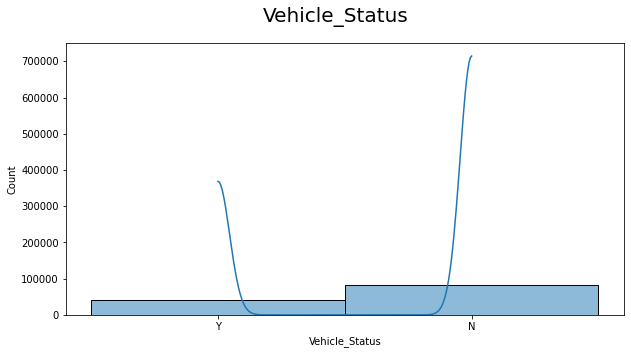

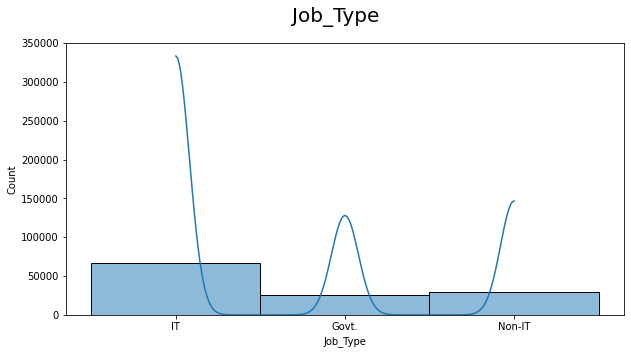

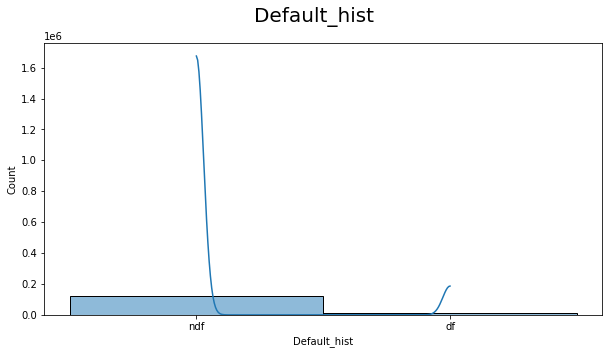

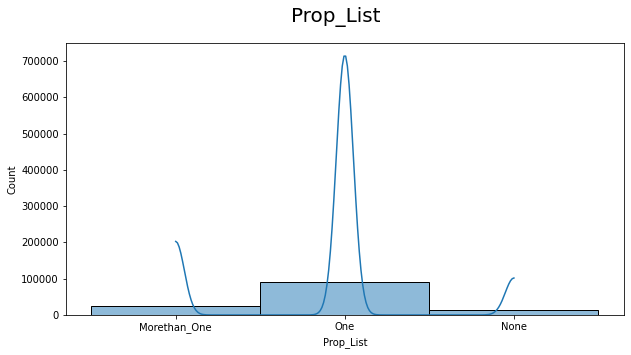

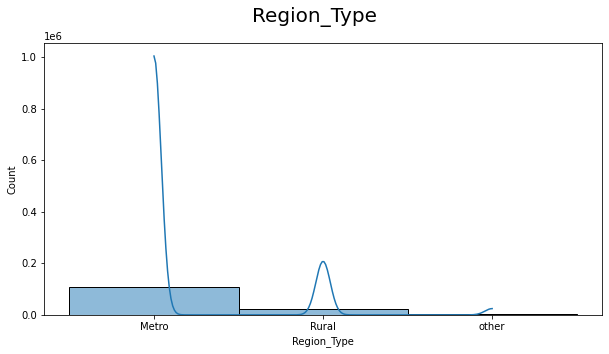

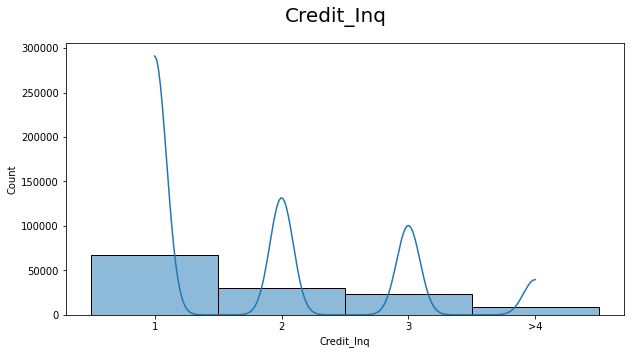

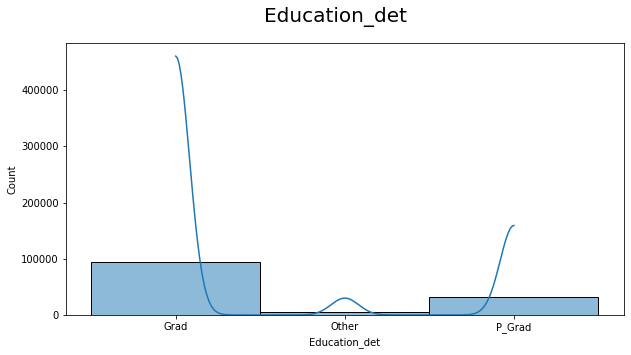

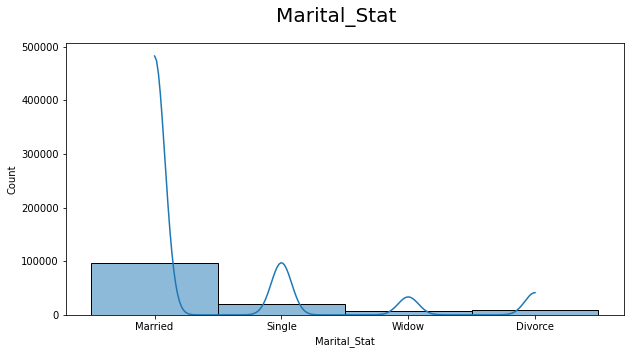

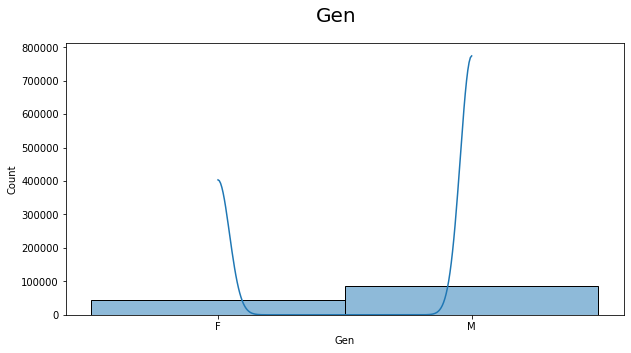

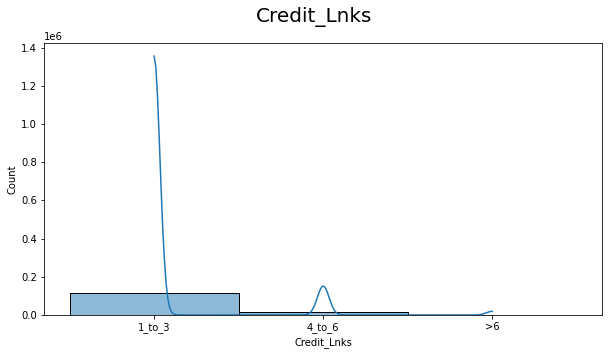

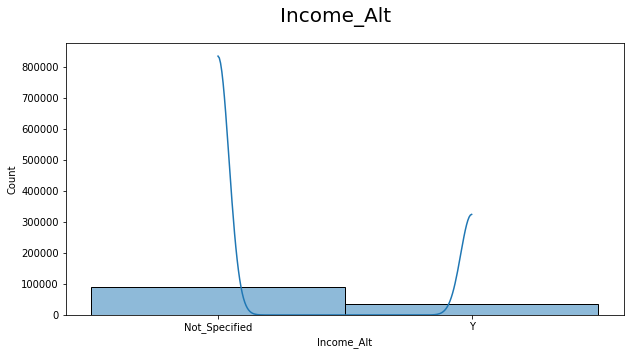

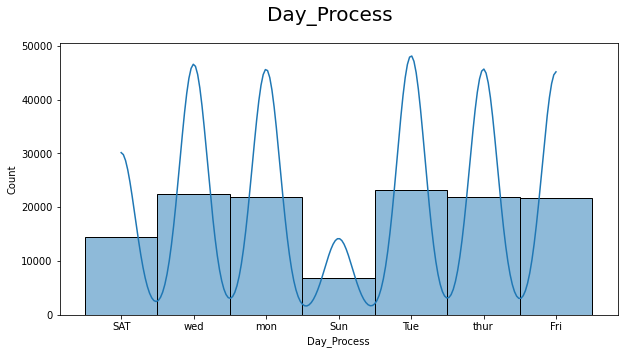

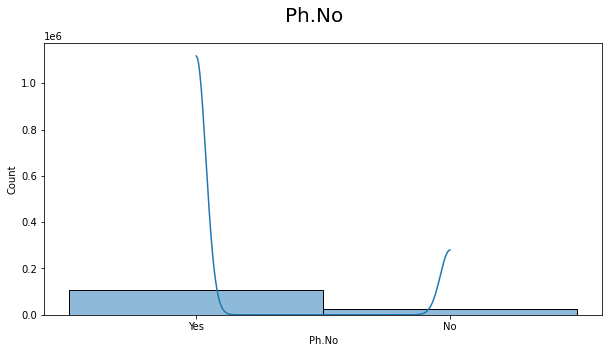

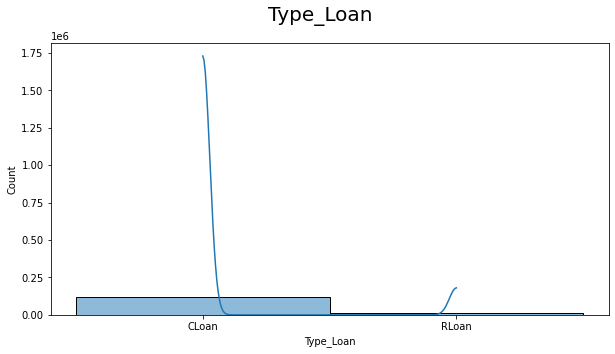

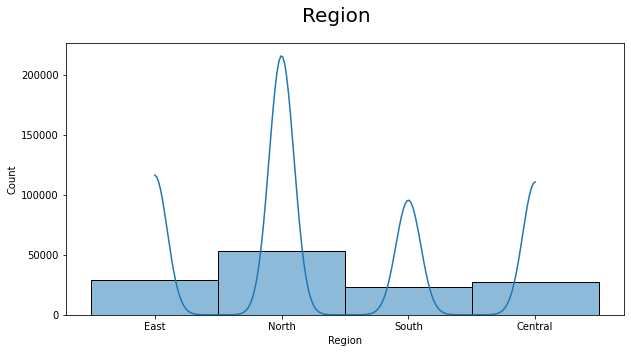

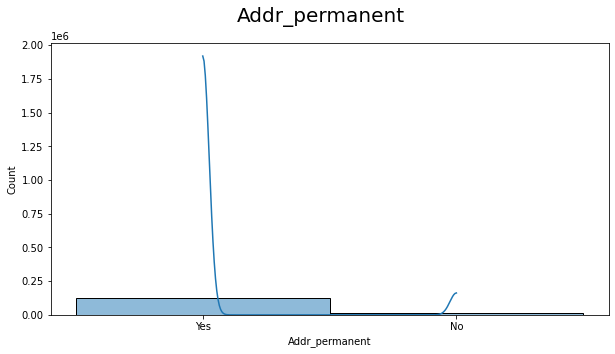

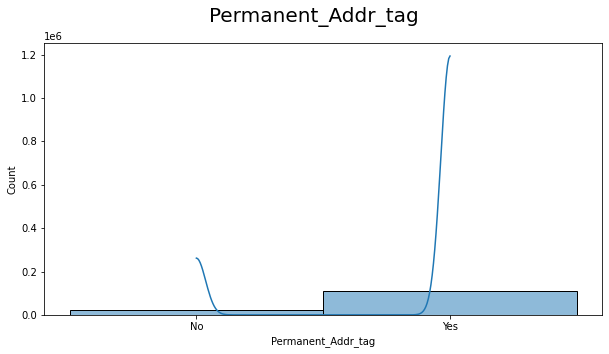

In [18]:
hist_df(Train_set_df)

In [19]:
#Function to accept dataframe and then print pie charts for all Categorical columns

def pie_df(df):
        
    for col2 in df.select_dtypes(include=['object']).columns:
        df.groupby(col2).size().plot(kind='pie', subplots=True, shadow=True, startangle=30, figsize=(8,6), autopct='%1.2f%%')                
        font1 = {'family':'serif','color':'blue','size':20}
        plt.title(col2, fontdict = font1)    
        plt.tight_layout()
        plt.show()

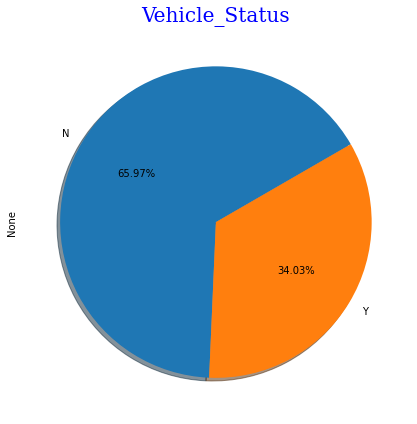

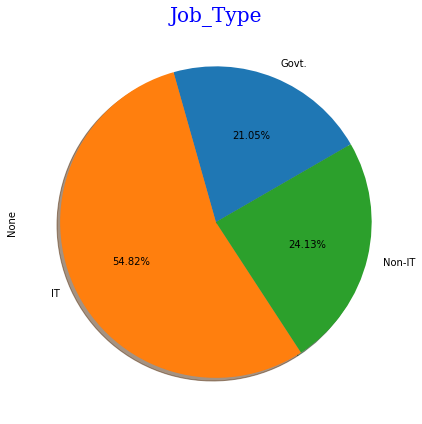

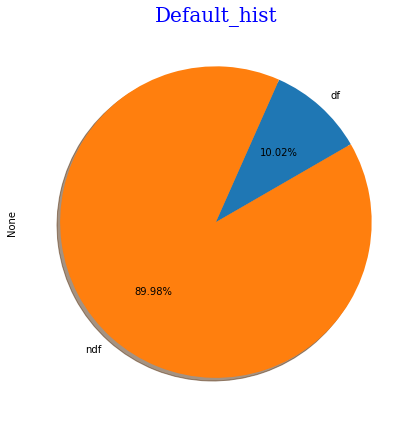

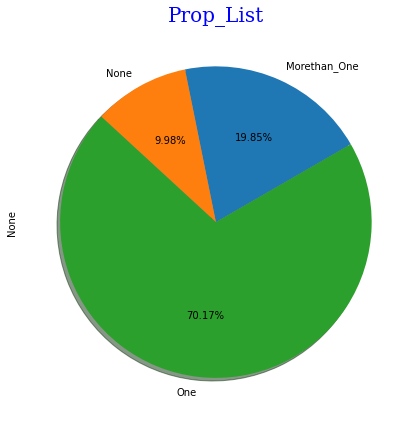

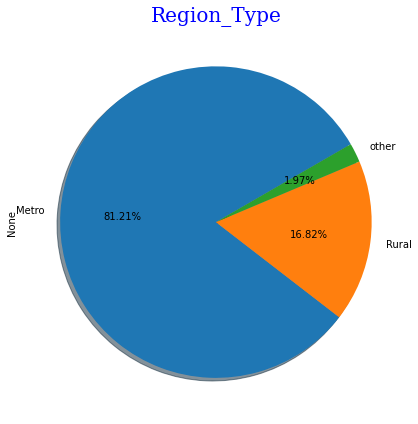

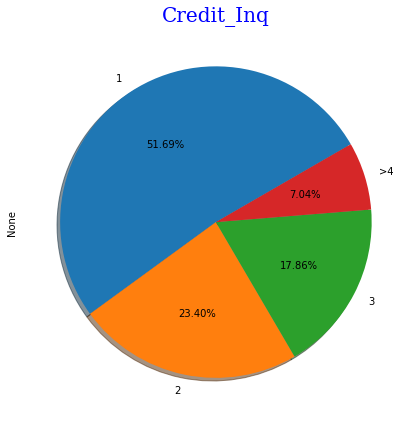

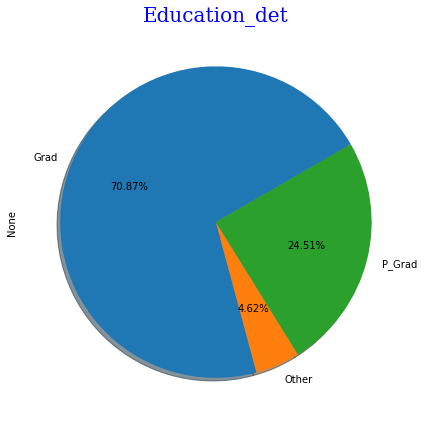

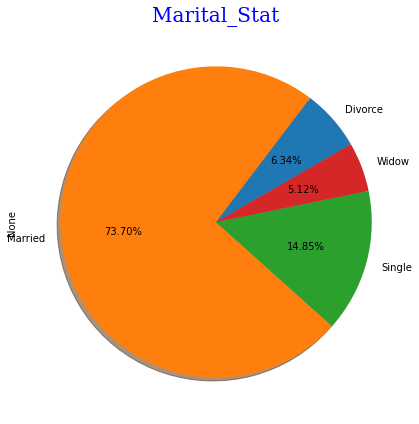

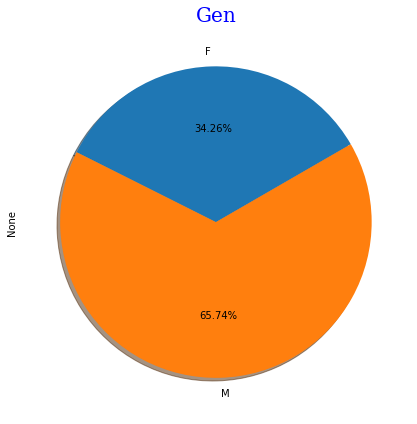

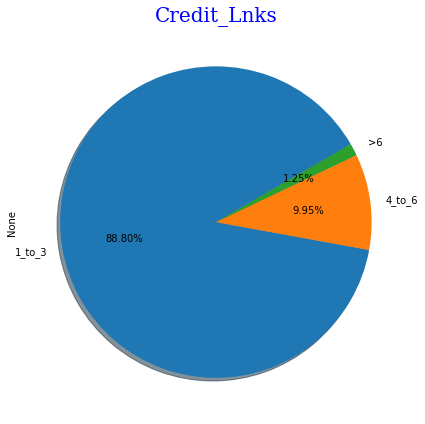

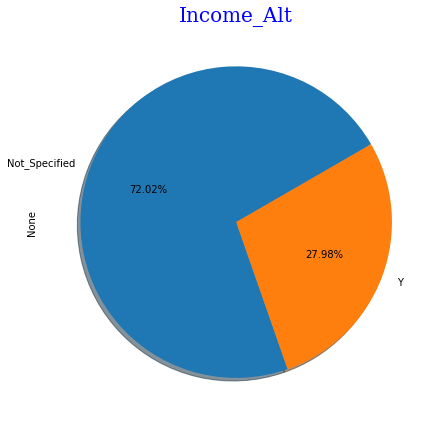

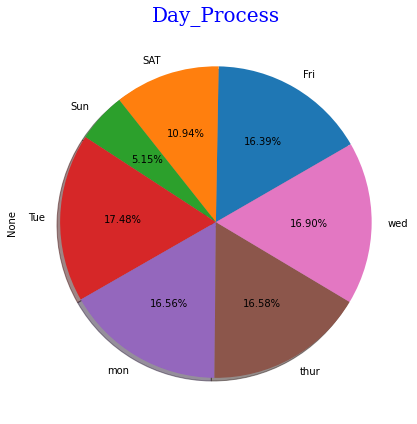

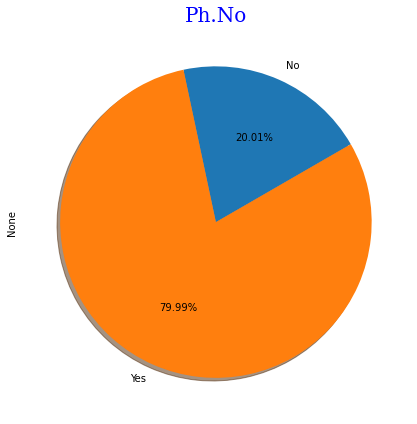

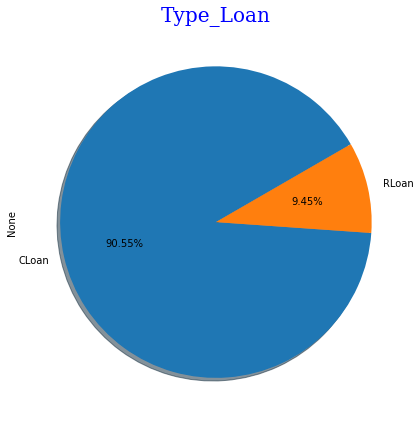

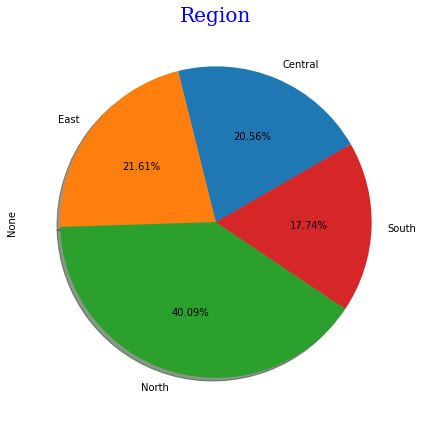

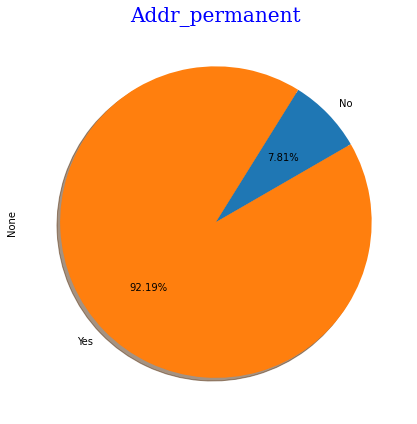

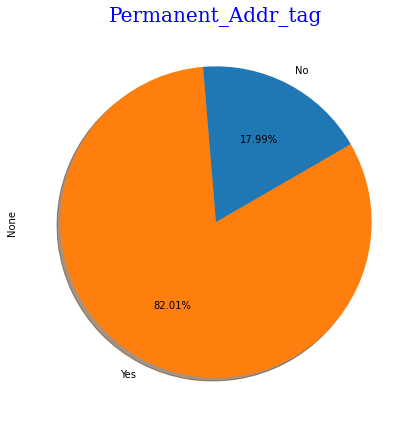

In [20]:
pie_df(Train_set_df)

In [141]:
Train_set_df.dtypes

ID                      int64
Compensation          float64
Vehicle_Status         object
Loan_amt              float64
Annuity_amt           float64
density_Ind           float64
Job_Type               object
Default_hist           object
Prop_List              object
Home_Appliances       float64
Region_Type            object
Credit_Inq             object
Education_det          object
Marital_Stat           object
Gen                    object
Credit_Lnks            object
Experience            float64
Income_Alt             object
Day_Process            object
Ph.No                  object
Type_Loan              object
Dependents            float64
Company_Rating        float64
Region                 object
Age                   float64
hour_Process          float64
Addr_permanent         object
Permanent_Addr_tag     object
c1_rated              float64
c2_rated              float64
Contact_age           float64
Product_bought        float64
Default               float64
dtype: obj

In [142]:
# Encoding all the Categorical variables 

#classifying the categorical variables into 2 variants (Label encoding & One Hot encoding)

replaceStruct = {
                "Credit_Lnks":        {"1_to_3": 1, "4_to_6": 2, ">6": 3},
                "Education_det":      {"Other": 0, "Grad": 1 , "P_Grad": 2},
                "Credit_Inq":         {"1": 1, "2": 2 , "3": 3, ">4": 5},
                "Prop_List":          {"None": -1, "One": 1, "Morethan_One": 2},
                "Vehicle_Status":     {"Y": 1, "N": 0},                
                "Default_hist":       {"df": 0, "ndf": 1},
                "Day_Process":        {"Sun": 1, "mon": 2, "Tue": 3, "wed": 4, "thur": 5, "Fri": 6, "SAT": 7},
                "Income_Alt":         {"Y": 1, "Not_Specified": 0},
                "Addr_permanent":     {"Yes": 1, "No": 0},
                "Permanent_Addr_tag": {"Yes": 1, "No": 0},
                "Ph.No":              {"Yes": 1, "No": 0}
                }
oneHotCols=["Job_Type","Marital_Stat", "Gen", "Region", "Region_Type","Type_Loan"]


In [144]:
replaceStruct

{'Addr_permanent': {'No': 0, 'Yes': 1},
 'Credit_Inq': {'1': 1, '2': 2, '3': 3, '>4': 5},
 'Credit_Lnks': {'1_to_3': 1, '4_to_6': 2, '>6': 3},
 'Day_Process': {'Fri': 6,
  'SAT': 7,
  'Sun': 1,
  'Tue': 3,
  'mon': 2,
  'thur': 5,
  'wed': 4},
 'Default_hist': {'df': 0, 'ndf': 1},
 'Education_det': {'Grad': 1, 'Other': 0, 'P_Grad': 2},
 'Income_Alt': {'Not_Specified': 0, 'Y': 1},
 'Permanent_Addr_tag': {'No': 0, 'Yes': 1},
 'Ph.No': {'No': 0, 'Yes': 1},
 'Prop_List': {'Morethan_One': 2, 'None': -1, 'One': 1},
 'Vehicle_Status': {'N': 0, 'Y': 1}}

In [145]:
oneHotCols

['Job_Type', 'Marital_Stat', 'Gen', 'Region', 'Region_Type', 'Type_Loan']

In [146]:
new_train=Train_set_df.replace(replaceStruct)
new_train=pd.get_dummies(new_train, columns=oneHotCols)
new_train.head(10)

ID  Compensation  Vehicle_Status   Loan_amt  Annuity_amt  density_Ind  \
0  540071      801850.0             1.0  658040.00     13816.52       0.0304   
1  511643      884222.0             0.0  198075.00     11173.06       0.0194   
2  506688      284120.0             0.0  101056.00      8390.40       0.0118   
3  499360      341874.0             0.0  179008.00      7184.13       0.0373   
4  438350     1259895.0             1.0  573715.00     13212.77       0.0138   
5  470028     1307402.0             1.0  741690.00     10477.13       0.0236   
6  525234      757887.0             0.0  977270.00     10708.27       0.0089   
7  444411      866346.0             1.0  187339.95     10269.91       0.0062   
8  466413      836238.0             NaN  318034.00     12528.06       0.0368   
9  497049      822222.0             0.0  265048.00      8849.20       0.0138   

   Default_hist  Prop_List  Home_Appliances  Credit_Inq  ...  Gen_M  \
0             1        2.0              NaN         1.0  ...      0   
1             1        2.0              1.0         2.0  ...      1   
2             1        1.0              4.0         3.0  ...      1   
3             0       -1.0              2.0         1.0  ...      1   
4             1        2.0              1.0         2.0  ...      0   
5             1        1.0              4.0         2.0  ...      0   
6             0       -1.0              2.0         1.0  ...      0   
7             1        2.0              1.0         1.0  ...      0   
8             1        1.0              4.0         1.0  ...      0   
9             1        1.0              4.0         1.0  ...      1   

   Region_Central  Region_East  Region_North  Region_South  Region_Type_Metro  \
0               0            1             0             0                  1   
1               0            0             1             0                  1   
2               0            0             1             0                  1   
3               0            0             0             1                  1   
4               0            0             1             0                  0   
5               0            0             1             0                  1   
6               0            0             0             1                  1   
7               0            0             1             0                  1   
8               0            0             0             1                  1   
9               0            1             0             0                  1   

   Region_Type_Rural  Region_Type_other  Type_Loan_CLoan  Type_Loan_RLoan  
0                  0                  0                1                0  
1                  0                  0                1                0  
2                  0                  0                1                0  
3                  0                  0                0                1  
4                  1                  0                1                0  
5                  0                  0                1                0  
6                  0                  0                1                0  
7                  0                  0                1                0  
8                  0                  0                1                0  
9                  0                  0                1                0  

[10 rows x 45 columns]

In [147]:
new_train.dtypes

ID                        int64
Compensation            float64
Vehicle_Status          float64
Loan_amt                float64
Annuity_amt             float64
density_Ind             float64
Default_hist              int64
Prop_List               float64
Home_Appliances         float64
Credit_Inq              float64
Education_det             int64
Credit_Lnks               int64
Experience              float64
Income_Alt              float64
Day_Process               int64
Ph.No                     int64
Dependents              float64
Company_Rating          float64
Age                     float64
hour_Process            float64
Addr_permanent            int64
Permanent_Addr_tag        int64
c1_rated                float64
c2_rated                float64
Contact_age             float64
Product_bought          float64
Default                 float64
Job_Type_Govt.            uint8
Job_Type_IT               uint8
Job_Type_Non-IT           uint8
Marital_Stat_Divorce      uint8
Marital_

In [148]:
from sklearn.impute import KNNImputer

imputer = KNNImputer()
new_train_impute = imputer.fit_transform(new_train)

In [149]:
new_train_imputed = pd.DataFrame(new_train_impute)

In [150]:
col_names = new_train.columns.values

In [151]:
col_names

array(['ID', 'Compensation', 'Vehicle_Status', 'Loan_amt', 'Annuity_amt',
       'density_Ind', 'Default_hist', 'Prop_List', 'Home_Appliances',
       'Credit_Inq', 'Education_det', 'Credit_Lnks', 'Experience',
       'Income_Alt', 'Day_Process', 'Ph.No', 'Dependents',
       'Company_Rating', 'Age', 'hour_Process', 'Addr_permanent',
       'Permanent_Addr_tag', 'c1_rated', 'c2_rated', 'Contact_age',
       'Product_bought', 'Default', 'Job_Type_Govt.', 'Job_Type_IT',
       'Job_Type_Non-IT', 'Marital_Stat_Divorce', 'Marital_Stat_Married',
       'Marital_Stat_Single', 'Marital_Stat_Widow', 'Gen_F', 'Gen_M',
       'Region_Central', 'Region_East', 'Region_North', 'Region_South',
       'Region_Type_Metro', 'Region_Type_Rural', 'Region_Type_other',
       'Type_Loan_CLoan', 'Type_Loan_RLoan'], dtype=object)

In [152]:
new_train_imputed.columns = col_names

In [153]:
new_train_imputed

ID  Compensation  Vehicle_Status   Loan_amt  Annuity_amt  \
0       540071.0      801850.0             1.0   658040.0     13816.52   
1       511643.0      884222.0             0.0   198075.0     11173.06   
2       506688.0      284120.0             0.0   101056.0      8390.40   
3       499360.0      341874.0             0.0   179008.0      7184.13   
4       438350.0     1259895.0             1.0   573715.0     13212.77   
...          ...           ...             ...        ...          ...   
132435  435665.0      641706.0             1.0  1048272.0     13181.84   
132436  509840.0      594160.0             0.0   640232.0     11911.93   
132437  504105.0     1471170.0             0.0   732914.0     11587.54   
132438  430757.0      613585.0             0.0   528490.2     13008.76   
132439  421054.0      533725.0             1.0   330222.0     10250.65   

        density_Ind  Default_hist  Prop_List  Home_Appliances  Credit_Inq  \
0           0.03040           1.0        2.0              2.8         1.0   
1           0.01940           1.0        2.0              1.0         2.0   
2           0.01180           1.0        1.0              4.0         3.0   
3           0.03730           0.0       -1.0              2.0         1.0   
4           0.01380           1.0        2.0              1.0         2.0   
...             ...           ...        ...              ...         ...   
132435      0.02380           1.0        1.0              4.0         3.0   
132436      0.02620           1.0        1.0              4.0         3.0   
132437      0.01404           1.0        1.0              4.0         1.0   
132438      0.00560           1.0        1.0              4.0         1.0   
132439      0.02960           1.0        2.0              1.0         1.0   

        ...  Gen_M  Region_Central  Region_East  Region_North  Region_South  \
0       ...    0.0             0.0          1.0           0.0           0.0   
1       ...    1.0             0.0          0.0           1.0           0.0   
2       ...    1.0             0.0          0.0           1.0           0.0   
3       ...    1.0             0.0          0.0           0.0           1.0   
4       ...    0.0             0.0          0.0           1.0           0.0   
...     ...    ...             ...          ...           ...           ...   
132435  ...    0.0             0.0          0.0           1.0           0.0   
132436  ...    1.0             0.0          0.0           1.0           0.0   
132437  ...    1.0             0.0          0.0           0.0           1.0   
132438  ...    1.0             1.0          0.0           0.0           0.0   
132439  ...    1.0             0.0          0.0           1.0           0.0   

        Region_Type_Metro  Region_Type_Rural  Region_Type_other  \
0                     1.0                0.0                0.0   
1                     1.0                0.0                0.0   
2                     1.0                0.0                0.0   
3                     1.0                0.0                0.0   
4                     0.0                1.0                0.0   
...                   ...                ...                ...   
132435                0.0                1.0                0.0   
132436                1.0                0.0                0.0   
132437                1.0                0.0                0.0   
132438                1.0                0.0                0.0   
132439                0.0                1.0                0.0   

        Type_Loan_CLoan  Type_Loan_RLoan  
0                   1.0              0.0  
1                   1.0              0.0  
2                   1.0              0.0  
3                   0.0              1.0  
4                   1.0              0.0  
...                 ...              ...  
132435              1.0              0.0  
132436              1.0              0.0  
132437              1.0              0.0  
132438          

In [154]:
# Checking for missing values
print('Number of missing values across columns-\n', new_train_imputed.isnull().sum())

Number of missing values across columns-
 ID                      0
Compensation            0
Vehicle_Status          0
Loan_amt                0
Annuity_amt             0
density_Ind             0
Default_hist            0
Prop_List               0
Home_Appliances         0
Credit_Inq              0
Education_det           0
Credit_Lnks             0
Experience              0
Income_Alt              0
Day_Process             0
Ph.No                   0
Dependents              0
Company_Rating          0
Age                     0
hour_Process            0
Addr_permanent          0
Permanent_Addr_tag      0
c1_rated                0
c2_rated                0
Contact_age             0
Product_bought          0
Default                 0
Job_Type_Govt.          0
Job_Type_IT             0
Job_Type_Non-IT         0
Marital_Stat_Divorce    0
Marital_Stat_Married    0
Marital_Stat_Single     0
Marital_Stat_Widow      0
Gen_F                   0
Gen_M                   0
Region_Central        

% S unique values Vehicle_Status
N    34721
Y    18156
Name: Vehicle_Status, dtype: int64

% S unique values Job_Type
IT        28792
Non-IT    12640
Govt.     11008
Name: Job_Type, dtype: int64

% S unique values Default_hist
ndf    51070
df      5690
Name: Default_hist, dtype: int64

% S unique values Prop_List
One             39222
Morethan_One    11046
None             5581
Name: Prop_List, dtype: int64

% S unique values Region_Type
Metro    46048
Rural     9526
other     1186
Name: Region_Type, dtype: int64

% S unique values Credit_Inq
1     28703
2     13030
3      9998
>4     3863
Name: Credit_Inq, dtype: int64

% S unique values Education_det
Grad      40408
P_Grad    13689
Other      2663
Name: Education_det, dtype: int64

% S unique values Marital_Stat
Married    41725
Single      8335
Divorce     3727
Widow       2973
Name: Marital_Stat, dtype: int64

% S unique values Gen
M    37259
F    19501
Name: Gen, dtype: int64

% S unique values Credit_Lnks
1_to_3    50372
4_to_6  

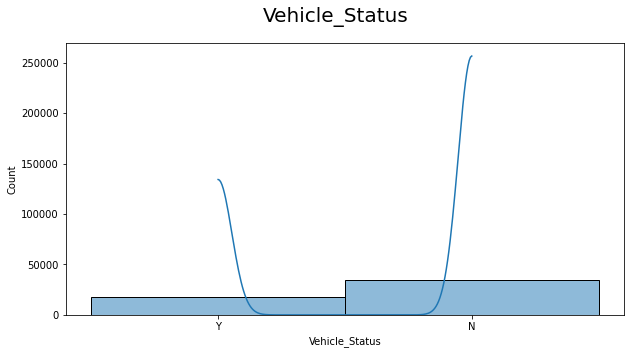

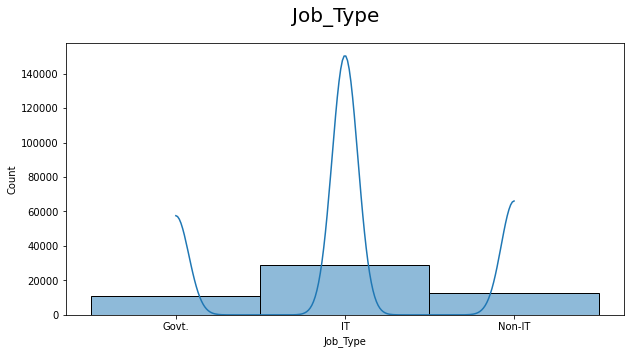

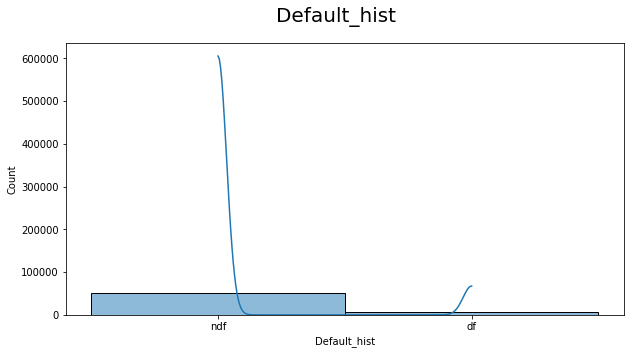

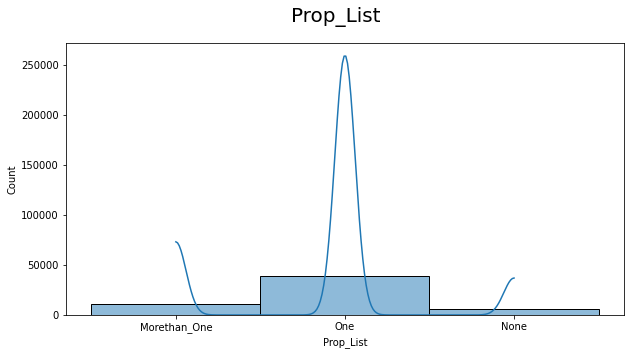

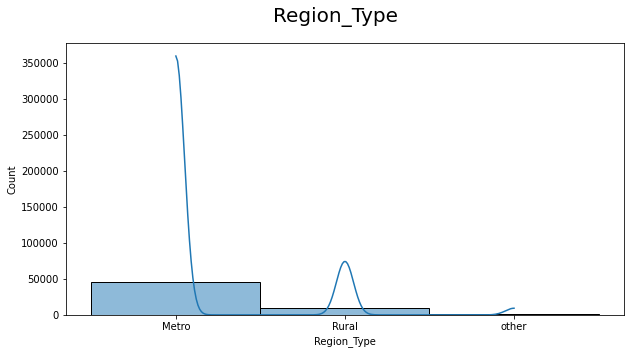

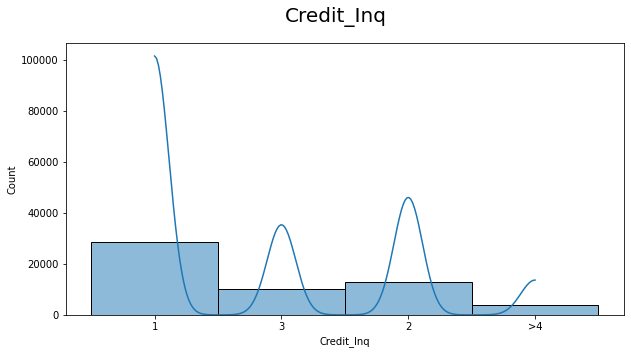

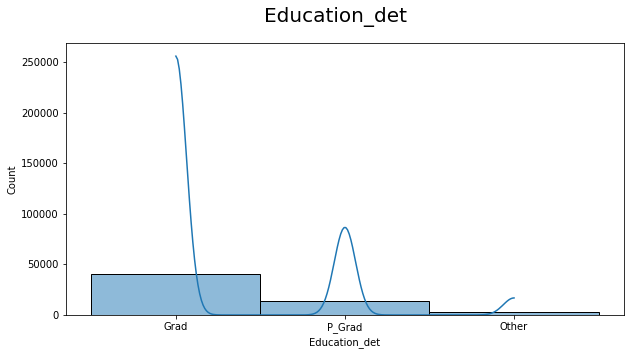

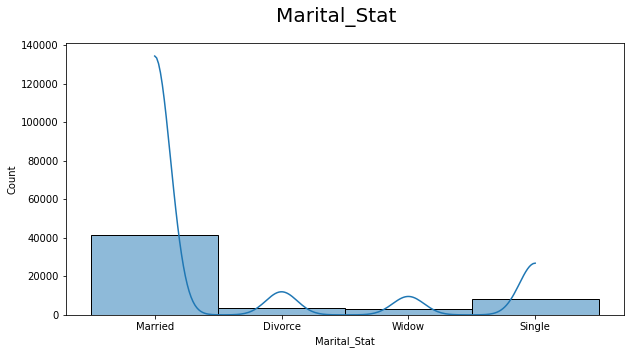

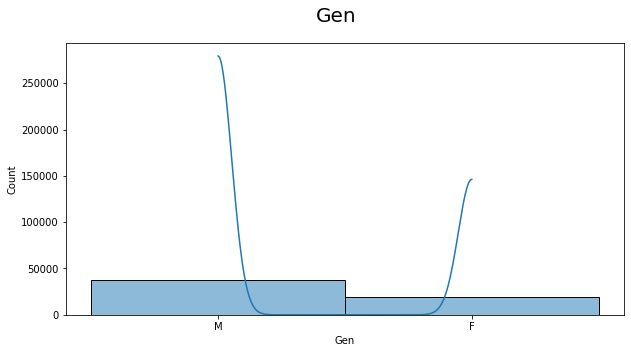

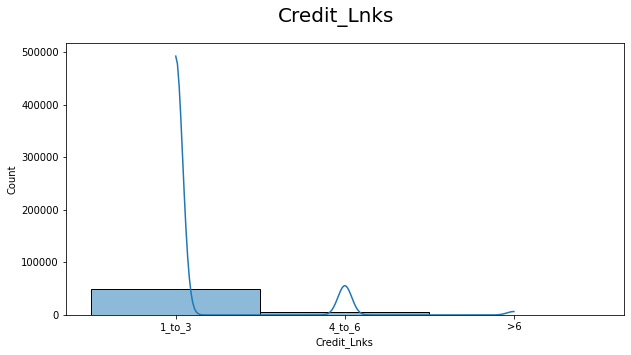

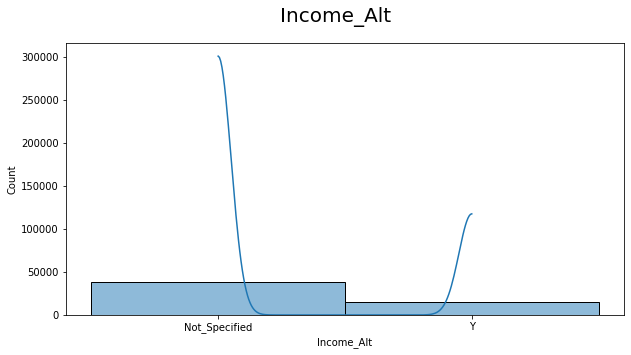

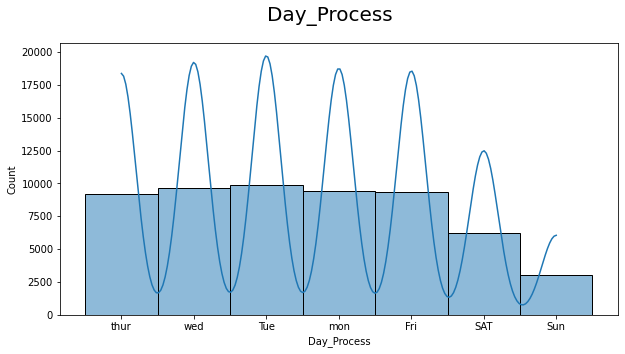

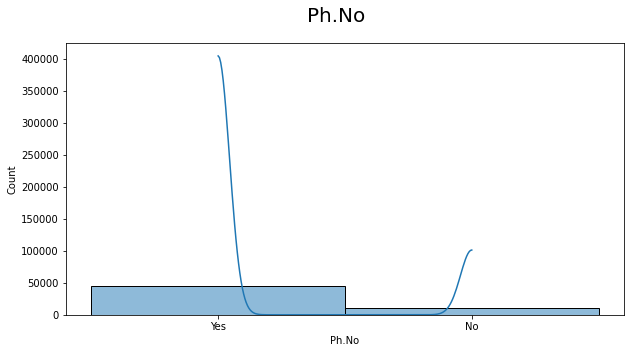

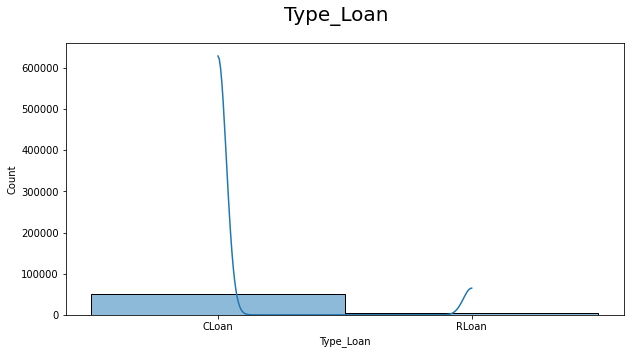

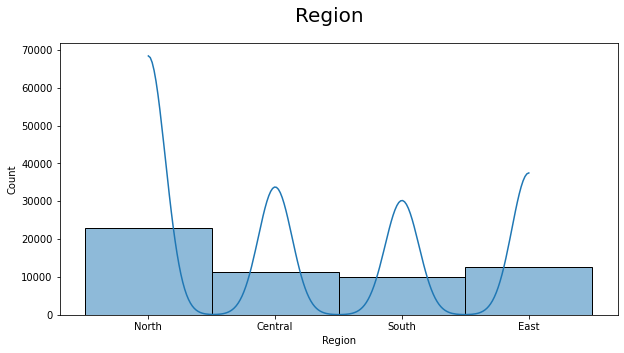

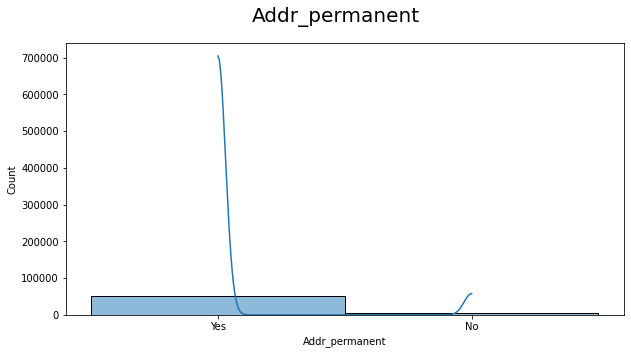

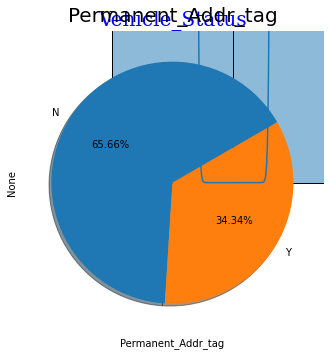

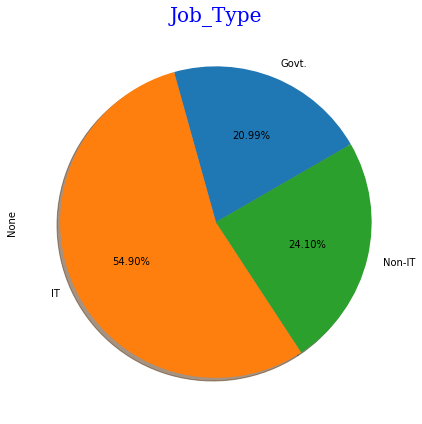

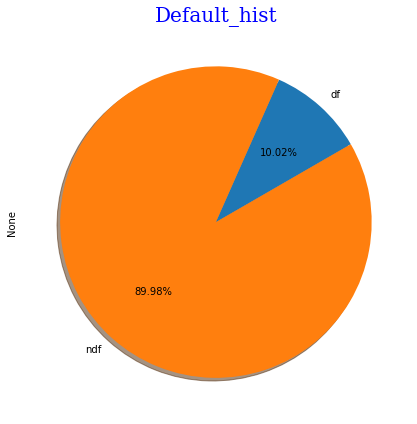

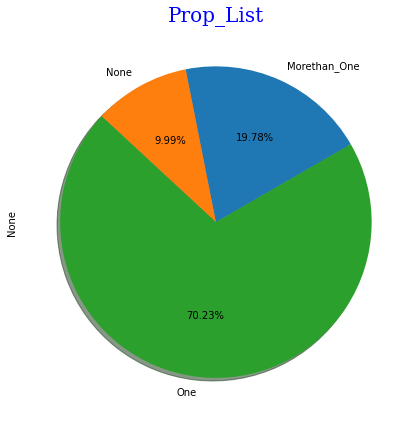

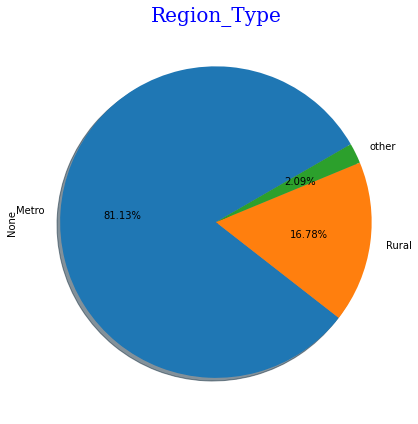

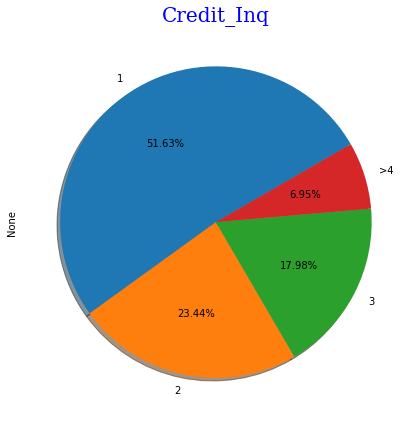

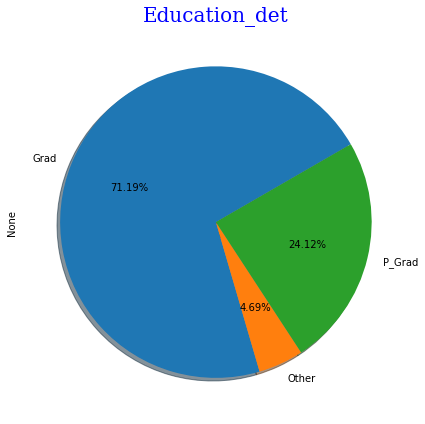

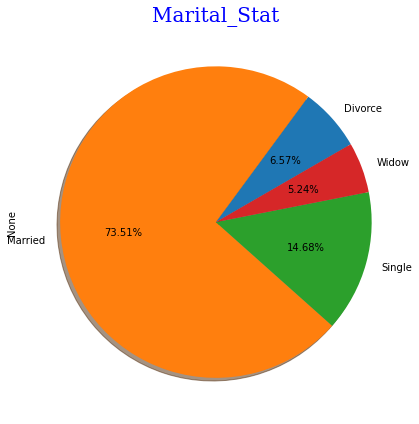

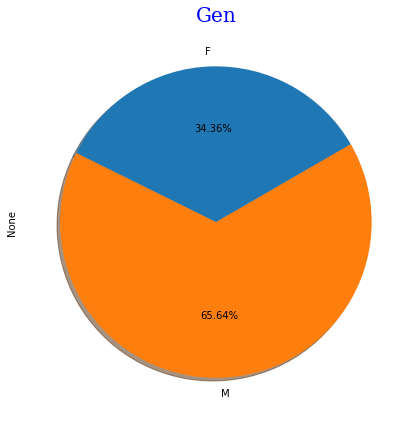

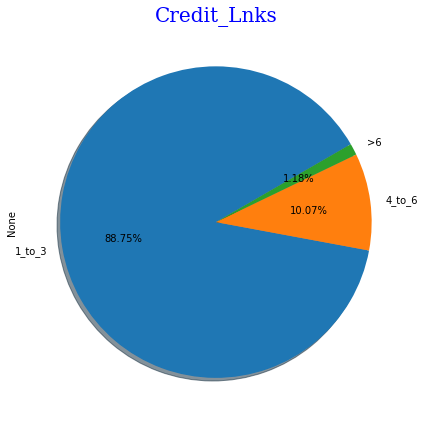

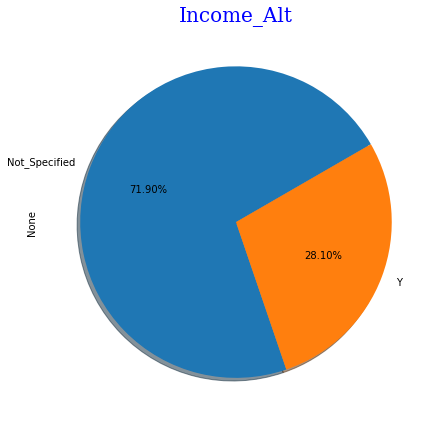

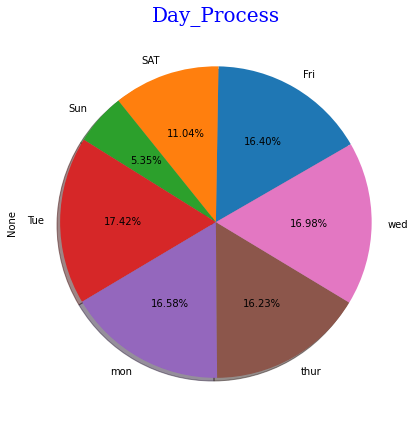

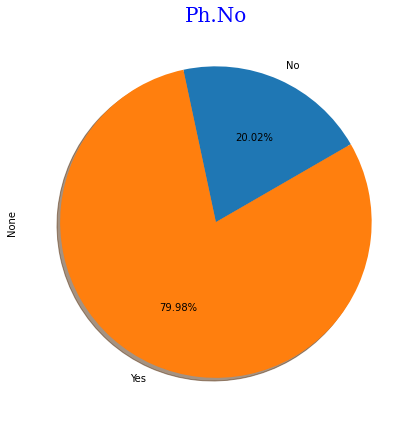

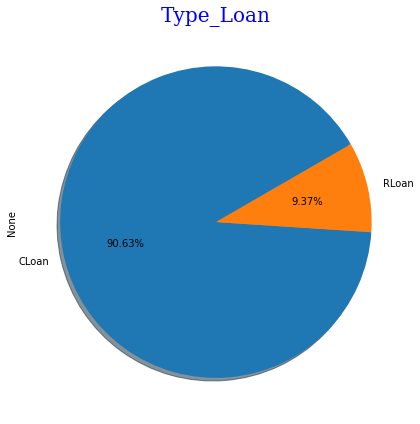

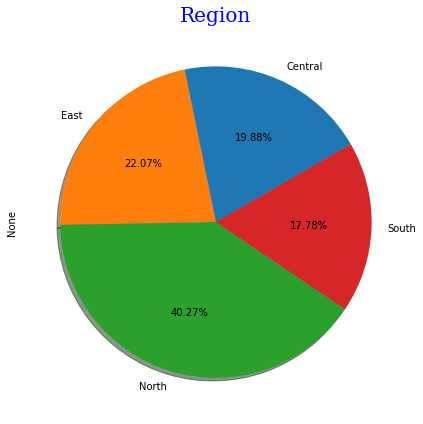

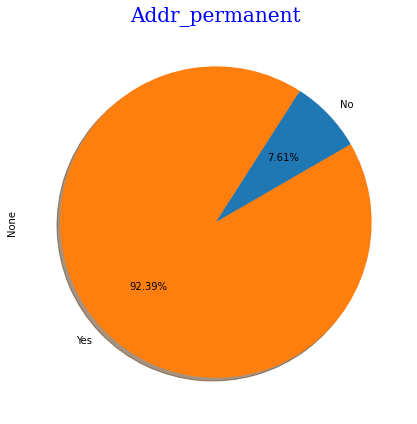

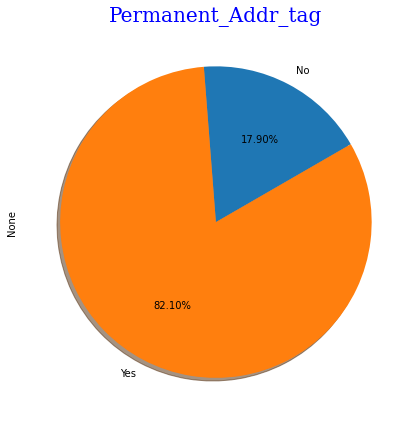

In [33]:
Unq(Test_set_df)
print("")
hist_df(Test_set_df)
print("")
pie_df(Test_set_df)
print("")

In [155]:
Test_set_df.shape

(56760, 32)

In [156]:
new_test=Test_set_df.replace(replaceStruct)
new_test=pd.get_dummies(new_test, columns=oneHotCols)
new_test.head(10)

ID  Compensation  Vehicle_Status   Loan_amt  Annuity_amt  density_Ind  \
0  487410      653106.0             1.0  809400.00      9145.51       0.0015   
1  533258      434150.0             0.0   72618.75      7683.23       0.0332   
2  581926      489060.0             0.0  267255.80      9032.85       0.0316   
3  486301      957294.0             0.0  623600.00     12838.25       0.0320   
4  580822     1333739.0             0.0  529520.00     11799.09       0.0073   
5  542574      594244.0             1.0  290161.50     13318.66       0.0248   
6  469888      365076.0             1.0  957043.20     16450.51       0.0327   
7  431366      471086.0             1.0  301011.50      7869.91       0.0043   
8  567067      621504.0             1.0  232066.80     11930.35       0.0189   
9  483606      564984.0             0.0  462889.00      9792.79       0.0236   

   Default_hist  Prop_List  Home_Appliances  Credit_Inq  ...  Gen_M  \
0             1        2.0              1.0         1.0  ...      1   
1             1        1.0              4.0         1.0  ...      1   
2             1        2.0              NaN         1.0  ...      1   
3             1        1.0              4.0         1.0  ...      1   
4             1        1.0              4.0         3.0  ...      0   
5             0       -1.0              2.0         2.0  ...      0   
6             1        1.0              4.0         3.0  ...      0   
7             1        1.0              4.0         1.0  ...      1   
8             1        2.0              1.0         1.0  ...      0   
9             1        1.0              4.0         3.0  ...      1   

   Region_Central  Region_East  Region_North  Region_South  Region_Type_Metro  \
0               0            0             1             0                  1   
1               1            0             0             0                  1   
2               0            0             0             1                  0   
3               0            1             0             0                  1   
4               0            0             1             0                  1   
5               1            0             0             0                  0   
6               0            1             0             0                  1   
7               1            0             0             0                  1   
8               0            0             1             0                  1   
9               0            0             1             0                  1   

   Region_Type_Rural  Region_Type_other  Type_Loan_CLoan  Type_Loan_RLoan  
0                  0                  0                1                0  
1                  0                  0                1                0  
2                  1                  0                1                0  
3                  0                  0                1                0  
4                  0                  0                0                1  
5                  1                  0                1                0  
6                  0                  0                1                0  
7                  0                  0                1                0  
8                  0                  0                1                0  
9                  0                  0                1                0  

[10 rows x 44 columns]

In [157]:
new_train.dtypes

ID                        int64
Compensation            float64
Vehicle_Status          float64
Loan_amt                float64
Annuity_amt             float64
density_Ind             float64
Default_hist              int64
Prop_List               float64
Home_Appliances         float64
Credit_Inq              float64
Education_det             int64
Credit_Lnks               int64
Experience              float64
Income_Alt              float64
Day_Process               int64
Ph.No                     int64
Dependents              float64
Company_Rating          float64
Age                     float64
hour_Process            float64
Addr_permanent            int64
Permanent_Addr_tag        int64
c1_rated                float64
c2_rated                float64
Contact_age             float64
Product_bought          float64
Default                 float64
Job_Type_Govt.            uint8
Job_Type_IT               uint8
Job_Type_Non-IT           uint8
Marital_Stat_Divorce      uint8
Marital_

In [158]:
new_test_impute = imputer.fit_transform(new_test)

In [159]:
new_test_impute

array([[4.874100e+05, 6.531060e+05, 1.000000e+00, ..., 0.000000e+00,
        1.000000e+00, 0.000000e+00],
       [5.332580e+05, 4.341500e+05, 0.000000e+00, ..., 0.000000e+00,
        1.000000e+00, 0.000000e+00],
       [5.819260e+05, 4.890600e+05, 0.000000e+00, ..., 0.000000e+00,
        1.000000e+00, 0.000000e+00],
       ...,
       [4.764170e+05, 5.513740e+05, 4.000000e-01, ..., 0.000000e+00,
        0.000000e+00, 1.000000e+00],
       [4.611520e+05, 9.751170e+05, 0.000000e+00, ..., 0.000000e+00,
        1.000000e+00, 0.000000e+00],
       [5.240750e+05, 6.132322e+05, 0.000000e+00, ..., 0.000000e+00,
        1.000000e+00, 0.000000e+00]])

In [160]:
new_test_imputed = pd.DataFrame(new_test_impute)
col_names_test = new_test.columns.values
new_test_imputed.columns = col_names_test
new_test_imputed.head(10)

ID  Compensation  Vehicle_Status   Loan_amt  Annuity_amt  \
0  487410.0      653106.0             1.0  809400.00      9145.51   
1  533258.0      434150.0             0.0   72618.75      7683.23   
2  581926.0      489060.0             0.0  267255.80      9032.85   
3  486301.0      957294.0             0.0  623600.00     12838.25   
4  580822.0     1333739.0             0.0  529520.00     11799.09   
5  542574.0      594244.0             1.0  290161.50     13318.66   
6  469888.0      365076.0             1.0  957043.20     16450.51   
7  431366.0      471086.0             1.0  301011.50      7869.91   
8  567067.0      621504.0             1.0  232066.80     11930.35   
9  483606.0      564984.0             0.0  462889.00      9792.79   

   density_Ind  Default_hist  Prop_List  Home_Appliances  Credit_Inq  ...  \
0       0.0015           1.0        2.0              1.0         1.0  ...   
1       0.0332           1.0        1.0              4.0         1.0  ...   
2       0.0316           1.0        2.0              3.0         1.0  ...   
3       0.0320           1.0        1.0              4.0         1.0  ...   
4       0.0073           1.0        1.0              4.0         3.0  ...   
5       0.0248           0.0       -1.0              2.0         2.0  ...   
6       0.0327           1.0        1.0              4.0         3.0  ...   
7       0.0043           1.0        1.0              4.0         1.0  ...   
8       0.0189           1.0        2.0              1.0         1.0  ...   
9       0.0236           1.0        1.0              4.0         3.0  ...   

   Gen_M  Region_Central  Region_East  Region_North  Region_South  \
0    1.0             0.0          0.0           1.0           0.0   
1    1.0             1.0          0.0           0.0           0.0   
2    1.0             0.0          0.0           0.0           1.0   
3    1.0             0.0          1.0           0.0           0.0   
4    0.0             0.0          0.0           1.0           0.0   
5    0.0             1.0          0.0           0.0           0.0   
6    0.0             0.0          1.0           0.0           0.0   
7    1.0             1.0          0.0           0.0           0.0   
8    0.0             0.0          0.0           1.0           0.0   
9    1.0             0.0          0.0           1.0           0.0   

   Region_Type_Metro  Region_Type_Rural  Region_Type_other  Type_Loan_CLoan  \
0                1.0                0.0                0.0              1.0   
1                1.0                0.0                0.0              1.0   
2                0.0                1.0                0.0              1.0   
3                1.0                0.0                0.0              1.0   
4                1.0                0.0                0.0              0.0   
5                0.0                1.0                0.0              1.0   
6                1.0                0.0                0.0              1.0   
7                1.0                0.0                0.0              1.0   
8                1.0                0.0                0.0              1.0   
9                1.0                0.0                0.0              1.0   

   Type_Loan_RLoan  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              1.0  
5              0.0  
6              0.0  
7              0.0  
8              0.0  
9              0.0  

[10 rows x 44 columns]

In [161]:
# Re-Checking for missing values in Test set
print('Number of missing values in Test set across columns-\n', new_test_imputed.isnull().sum())

Number of missing values in Test set across columns-
 ID                      0
Compensation            0
Vehicle_Status          0
Loan_amt                0
Annuity_amt             0
density_Ind             0
Default_hist            0
Prop_List               0
Home_Appliances         0
Credit_Inq              0
Education_det           0
Credit_Lnks             0
Experience              0
Income_Alt              0
Day_Process             0
Ph.No                   0
Dependents              0
Company_Rating          0
Age                     0
hour_Process            0
Addr_permanent          0
Permanent_Addr_tag      0
c1_rated                0
c2_rated                0
Contact_age             0
Product_bought          0
Job_Type_Govt.          0
Job_Type_IT             0
Job_Type_Non-IT         0
Marital_Stat_Divorce    0
Marital_Stat_Married    0
Marital_Stat_Single     0
Marital_Stat_Widow      0
Gen_F                   0
Gen_M                   0
Region_Central          0
Region_Eas

In [162]:
print("New train dataset",new_train_imputed.shape)
print("New test dataset", new_test_imputed.shape)

New train dataset (132440, 45)
New test dataset (56760, 44)


new_train_imputed dataframe has an extra column because it has Default

new_test_imputed dataframe does not have that column, as we have to predict that columm

Now both new_train_imputed and new_test_imputed has been setup to do Exploratory data analysis and then model building

In [163]:
new_train_imputed.dtypes

ID                      float64
Compensation            float64
Vehicle_Status          float64
Loan_amt                float64
Annuity_amt             float64
density_Ind             float64
Default_hist            float64
Prop_List               float64
Home_Appliances         float64
Credit_Inq              float64
Education_det           float64
Credit_Lnks             float64
Experience              float64
Income_Alt              float64
Day_Process             float64
Ph.No                   float64
Dependents              float64
Company_Rating          float64
Age                     float64
hour_Process            float64
Addr_permanent          float64
Permanent_Addr_tag      float64
c1_rated                float64
c2_rated                float64
Contact_age             float64
Product_bought          float64
Default                 float64
Job_Type_Govt.          float64
Job_Type_IT             float64
Job_Type_Non-IT         float64
Marital_Stat_Divorce    float64
Marital_

In [164]:
new_test_imputed.dtypes

ID                      float64
Compensation            float64
Vehicle_Status          float64
Loan_amt                float64
Annuity_amt             float64
density_Ind             float64
Default_hist            float64
Prop_List               float64
Home_Appliances         float64
Credit_Inq              float64
Education_det           float64
Credit_Lnks             float64
Experience              float64
Income_Alt              float64
Day_Process             float64
Ph.No                   float64
Dependents              float64
Company_Rating          float64
Age                     float64
hour_Process            float64
Addr_permanent          float64
Permanent_Addr_tag      float64
c1_rated                float64
c2_rated                float64
Contact_age             float64
Product_bought          float64
Job_Type_Govt.          float64
Job_Type_IT             float64
Job_Type_Non-IT         float64
Marital_Stat_Divorce    float64
Marital_Stat_Married    float64
Marital_

In [165]:
new_train_imputed.duplicated().sum()

0

In [166]:
new_test_imputed.duplicated().sum()

0

There are no duplicated rows both in Train and Test imputed datasets....

In [167]:
stddev_drop_cols = 0

def std_dev(df):

    for i in df.columns:
        if (i == 'Default'):
            print("Skipping")
        else:    
            std_dev = df[i].std()
            if ( std_dev == 0):
                #signal_df.drop(i,axis=1,inplace=True)            
                stddev_drop_cols = stddev_drop_cols+1
                print(stddev_drop_cols)
        

In [168]:
std_dev(new_train_imputed)

Skipping


In [169]:
stddev_drop_cols  #........... there is no features in new_train with std deviation as 0

0

In [170]:
#...... Checking for the features in which variance is less than or equal to 2%

var_drop_cols = 0
#variable = [ ]
variable_df = pd.DataFrame(columns = ['column', 'variance'])
ind = 0

for i in new_train_imputed.columns:
    if (i == 'Default'):
        print("Skipping")
    else:    
        var = new_train_imputed[i].var() * 100
        print("column is",i)
        print("variance of column is",var)
        tempResultsDf = pd.DataFrame({'column':i,'variance': var}, index=[ind])
        ind = ind+1
            
        variable_df = pd.concat([variable_df, tempResultsDf])
            
        variable_df = variable_df[['column','variance']]
            
        #variable.append(i,var)
        if ( var <= 0.02):
            #signal_df.drop(i,axis=1,inplace=True)      #..... dropping columns with variance less than 2%
            var_drop_cols = var_drop_cols+1
    print("var_drop_cols",var_drop_cols)

column is ID
variance of column is 343023496160.49054
var_drop_cols 0
column is Compensation
variance of column is 21268321621147.16
var_drop_cols 0
column is Vehicle_Status
variance of column is 21.214641459173027
var_drop_cols 0
column is Loan_amt
variance of column is 7544843174674.963
var_drop_cols 0
column is Annuity_amt
variance of column is 415813763.9364791
var_drop_cols 0
column is density_Ind
variance of column is 0.021910329411830572
var_drop_cols 0
column is Default_hist
variance of column is 9.01576944540647
var_drop_cols 0
column is Prop_List
variance of column is 59.06372569272668
var_drop_cols 0
column is Home_Appliances
variance of column is 144.09752710575285
var_drop_cols 0
column is Credit_Inq
variance of column is 129.2117149464722
var_drop_cols 0
column is Education_det
variance of column is 25.178849318454088
var_drop_cols 0
column is Credit_Lnks
variance of column is 13.398502781478042
var_drop_cols 0
column is Experience
variance of column is 3520.4308151233354

there is no features in new_train_imputed with variance less than 2%

In [171]:
#........ Bivariate checking of all predictors with target (Default) column

corr_drop_cols = 0
corr_df = pd.DataFrame(columns = ['column', 'correlation'])
ind = 0

for i in new_train_imputed.columns:
    if (i == 'Default'):
        print("Skipping")
    else:
        corr_val = new_train_imputed['Default'].corr(new_train_imputed[i])
        corr_val = round(corr_val,3)
        print("column is",i)
        print("correlation of column is",corr_val)
        tempResultsDf = pd.DataFrame({'column':i,'correlation': corr_val}, index=[ind])
        ind = ind+1
            
        corr_df = pd.concat([corr_df, tempResultsDf])
            
        corr_df = corr_df[['column','correlation']]

column is ID
correlation of column is 0.0
column is Compensation
correlation of column is -0.002
column is Vehicle_Status
correlation of column is -0.006
column is Loan_amt
correlation of column is -0.009
column is Annuity_amt
correlation of column is -0.004
column is density_Ind
correlation of column is 0.001
column is Default_hist
correlation of column is -0.001
column is Prop_List
correlation of column is 0.001
column is Home_Appliances
correlation of column is -0.004
column is Credit_Inq
correlation of column is -0.012
column is Education_det
correlation of column is -0.016
column is Credit_Lnks
correlation of column is 0.007
column is Experience
correlation of column is -0.02
column is Income_Alt
correlation of column is -0.005
column is Day_Process
correlation of column is 0.004
column is Ph.No
correlation of column is -0.01
column is Dependents
correlation of column is 0.002
column is Company_Rating
correlation of column is 0.014
column is Age
correlation of column is -0.023
col

In [172]:
corr_df

column  correlation
0                     ID        0.000
1           Compensation       -0.002
2         Vehicle_Status       -0.006
3               Loan_amt       -0.009
4            Annuity_amt       -0.004
5            density_Ind        0.001
6           Default_hist       -0.001
7              Prop_List        0.001
8        Home_Appliances       -0.004
9             Credit_Inq       -0.012
10         Education_det       -0.016
11           Credit_Lnks        0.007
12            Experience       -0.020
13            Income_Alt       -0.005
14           Day_Process        0.004
15                 Ph.No       -0.010
16            Dependents        0.002
17        Company_Rating        0.014
18                   Age       -0.023
19          hour_Process       -0.008
20        Addr_permanent       -0.017
21    Permanent_Addr_tag       -0.005
22              c1_rated       -0.013
23              c2_rated       -0.014
24           Contact_age       -0.014
25        Product_bought        0.006
26        Job_Type_Govt.        0.003
27           Job_Type_IT        0.002
28       Job_Type_Non-IT       -0.004
29  Marital_Stat_Divorce       -0.003
30  Marital_Stat_Married        0.001
31   Marital_Stat_Single        0.002
32    Marital_Stat_Widow       -0.001
33                 Gen_F        0.015
34                 Gen_M       -0.015
35        Region_Central       -0.001
36           Region_East       -0.001
37          Region_North       -0.006
38          Region_South        0.010
39     Region_Type_Metro        0.002
40     Region_Type_Rural       -0.002
41     Region_Type_other       -0.002
42       Type_Loan_CLoan        0.006
43       Type_Loan_RLoan       -0.006

#2 Exploratory Data Analyis

In this section you can talk about the plots and the insights you have generated from the data

###Univariate Analysis

In [173]:
def chk_box(df):

    for i in df.columns:    
        print("column is",i)
        fig = plt.figure(figsize = (6,4))
        plt.figure(i)
        fig.suptitle(i, fontsize=20)
        df[i].plot.box()
        plt.show()
    

column is ID


<Figure size 432x288 with 0 Axes>

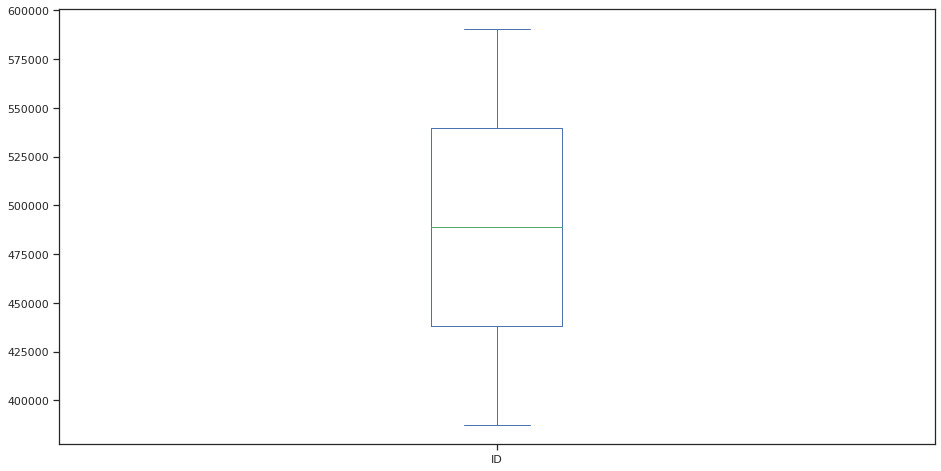

column is Compensation


<Figure size 432x288 with 0 Axes>

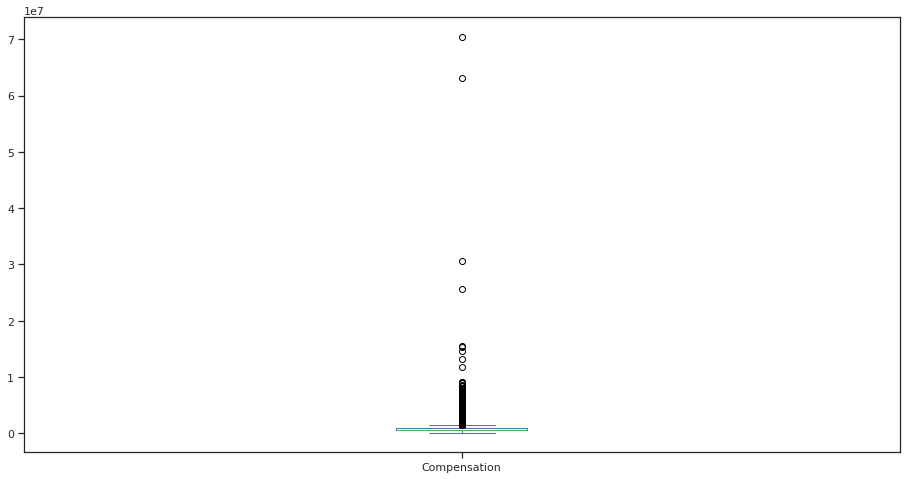

column is Vehicle_Status


<Figure size 432x288 with 0 Axes>

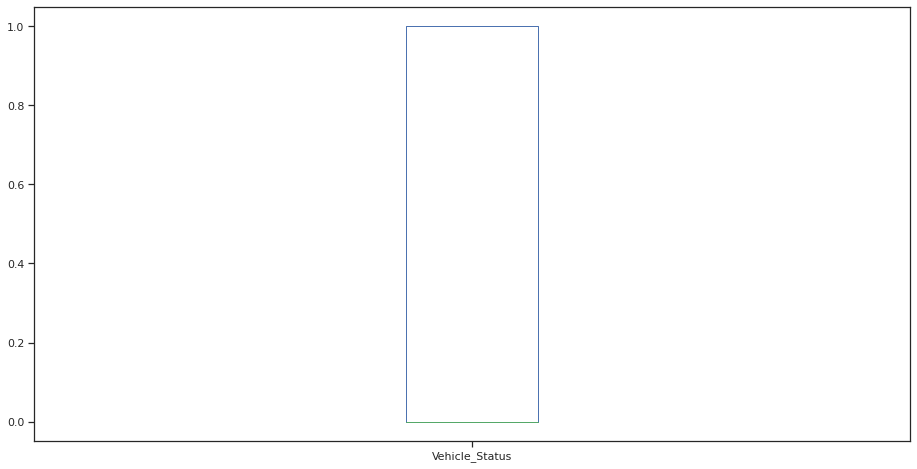

column is Loan_amt


<Figure size 432x288 with 0 Axes>

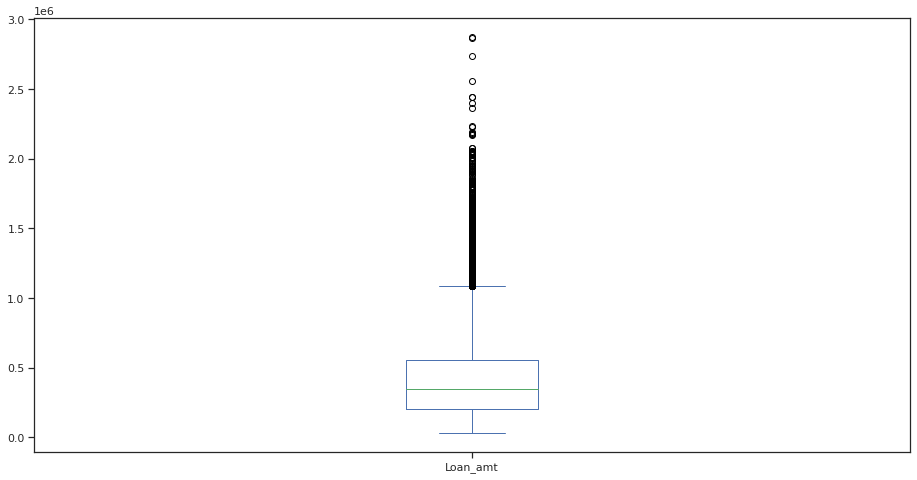

column is Annuity_amt


<Figure size 432x288 with 0 Axes>

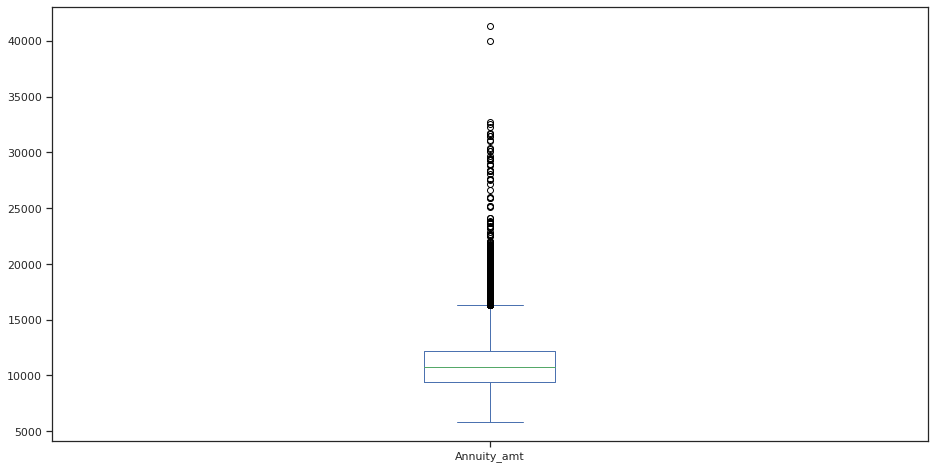

column is density_Ind


<Figure size 432x288 with 0 Axes>

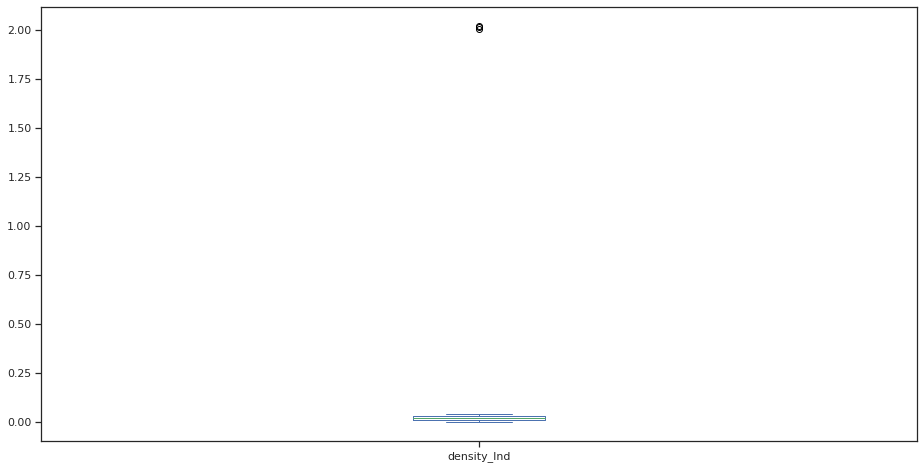

column is Default_hist


<Figure size 432x288 with 0 Axes>

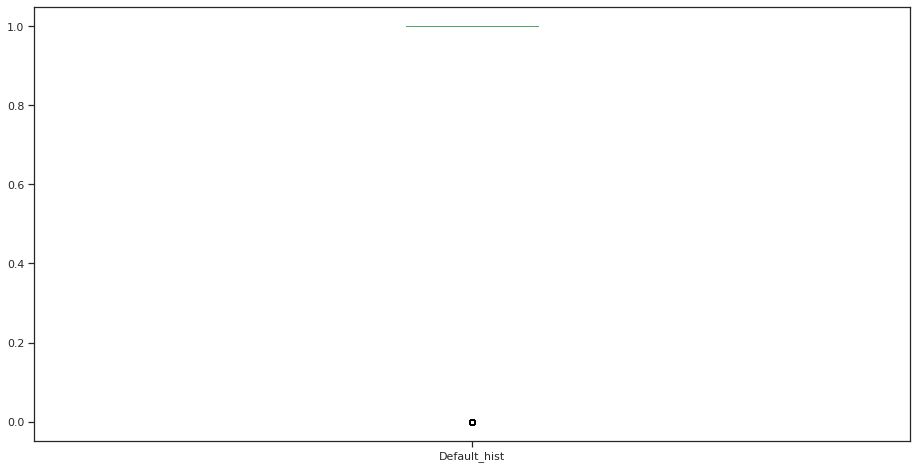

column is Prop_List


<Figure size 432x288 with 0 Axes>

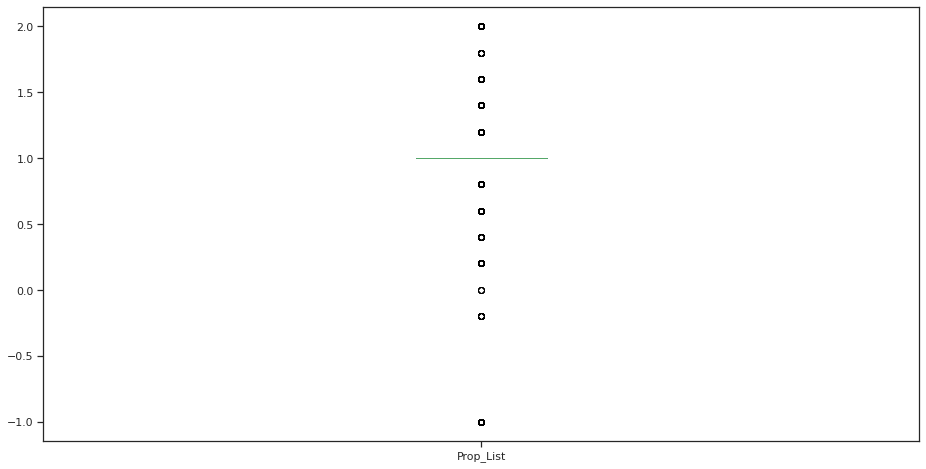

column is Home_Appliances


<Figure size 432x288 with 0 Axes>

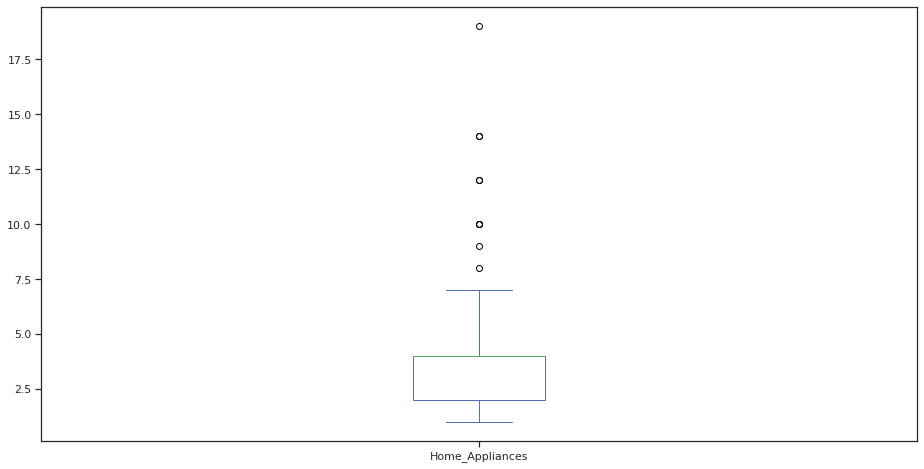

column is Credit_Inq


<Figure size 432x288 with 0 Axes>

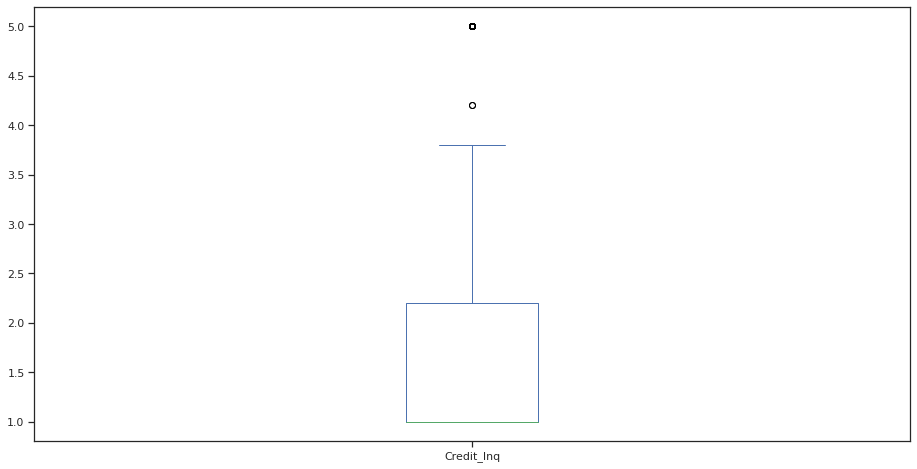

column is Education_det


<Figure size 432x288 with 0 Axes>

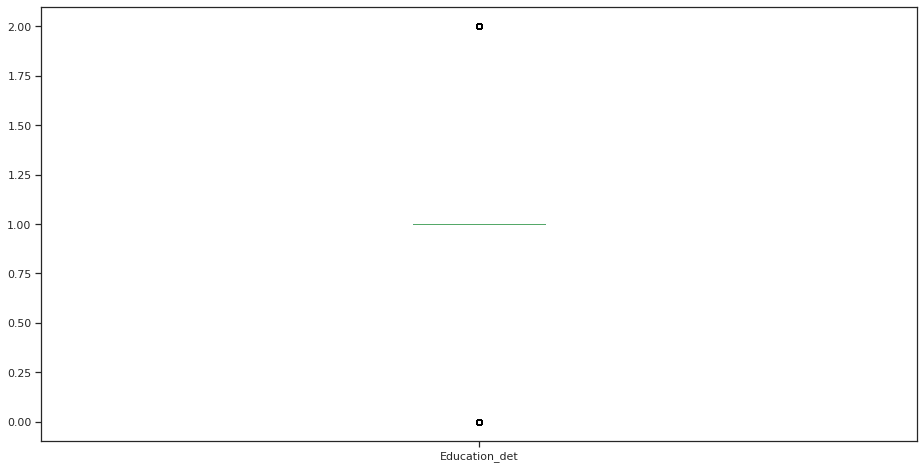

column is Credit_Lnks


<Figure size 432x288 with 0 Axes>

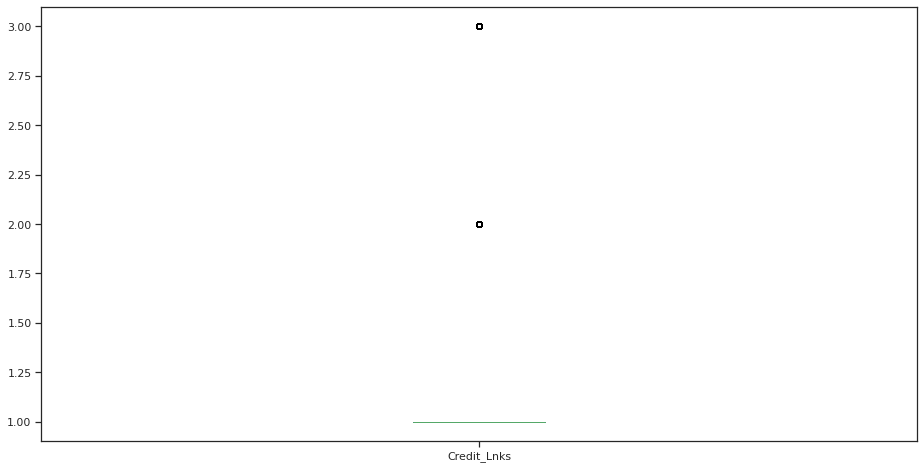

column is Experience


<Figure size 432x288 with 0 Axes>

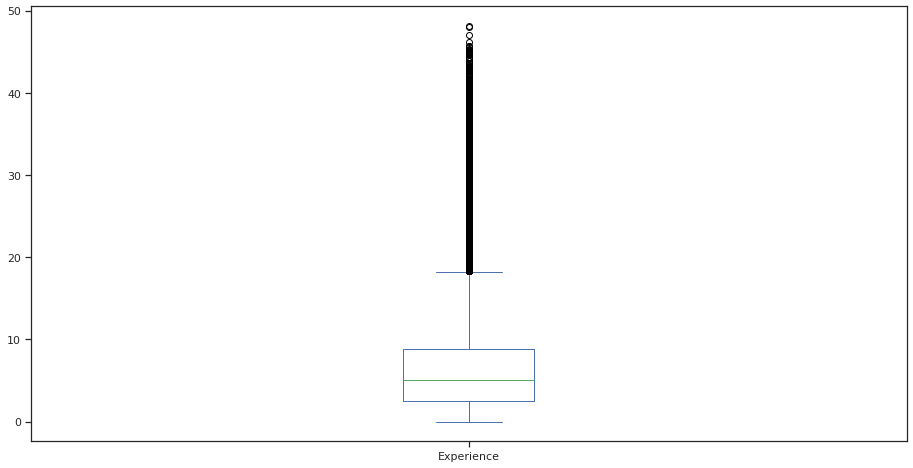

column is Income_Alt


<Figure size 432x288 with 0 Axes>

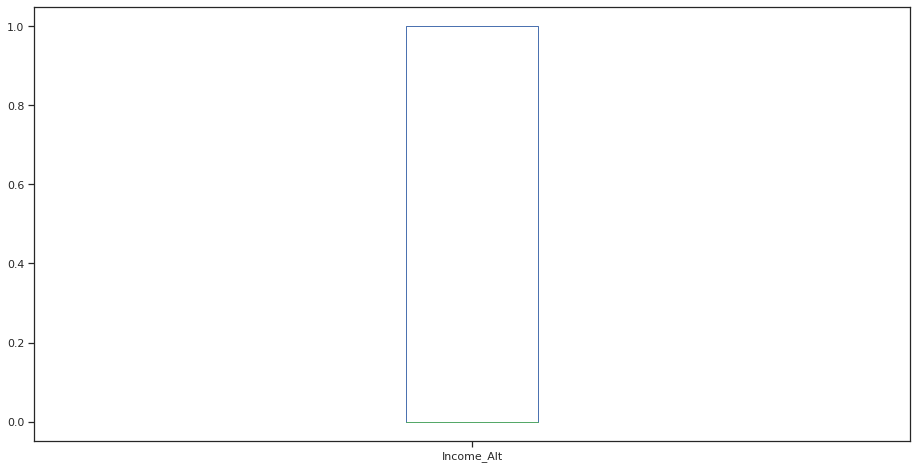

column is Day_Process


<Figure size 432x288 with 0 Axes>

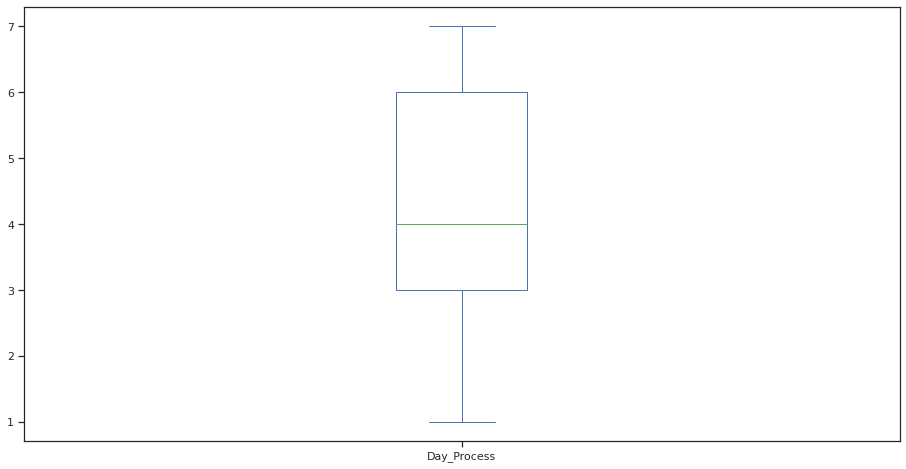

column is Ph.No


<Figure size 432x288 with 0 Axes>

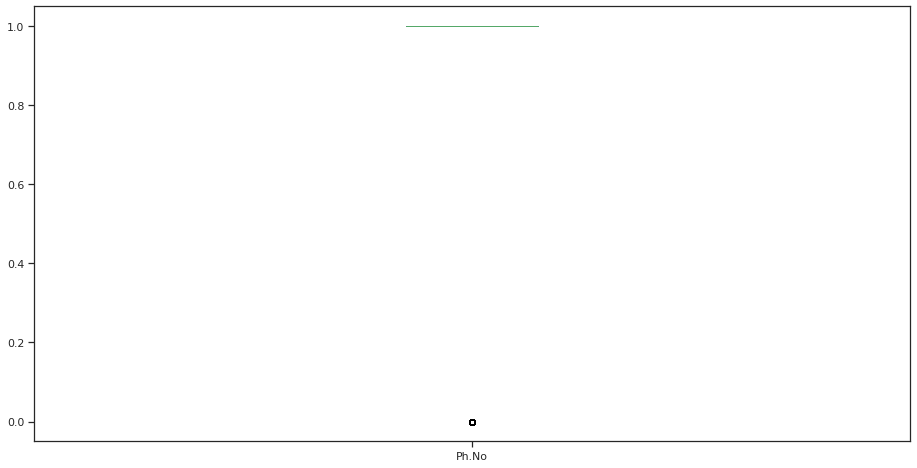

column is Dependents


<Figure size 432x288 with 0 Axes>

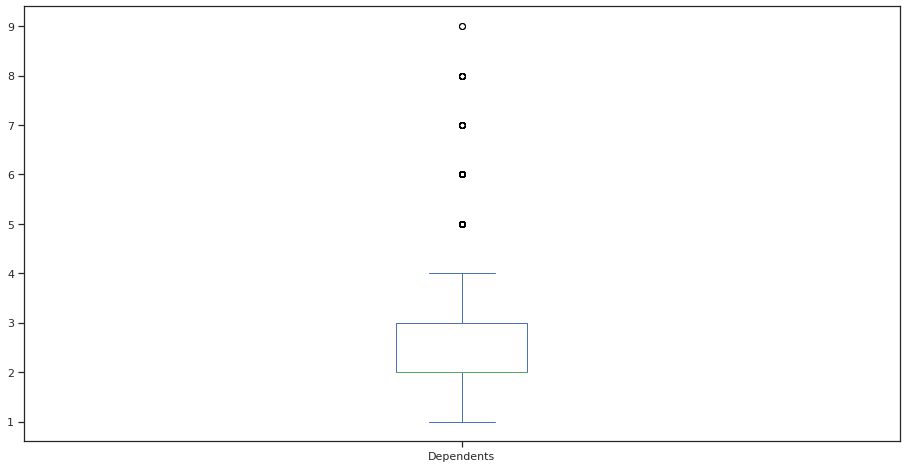

column is Company_Rating


<Figure size 432x288 with 0 Axes>

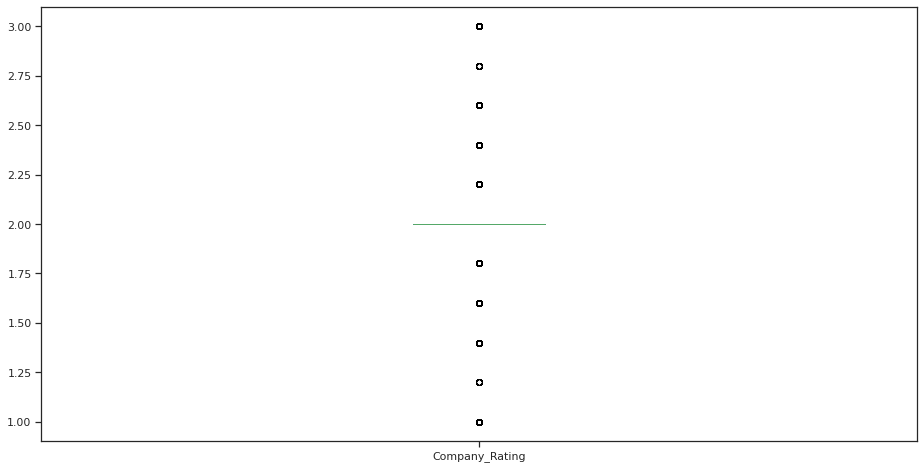

column is Age


<Figure size 432x288 with 0 Axes>

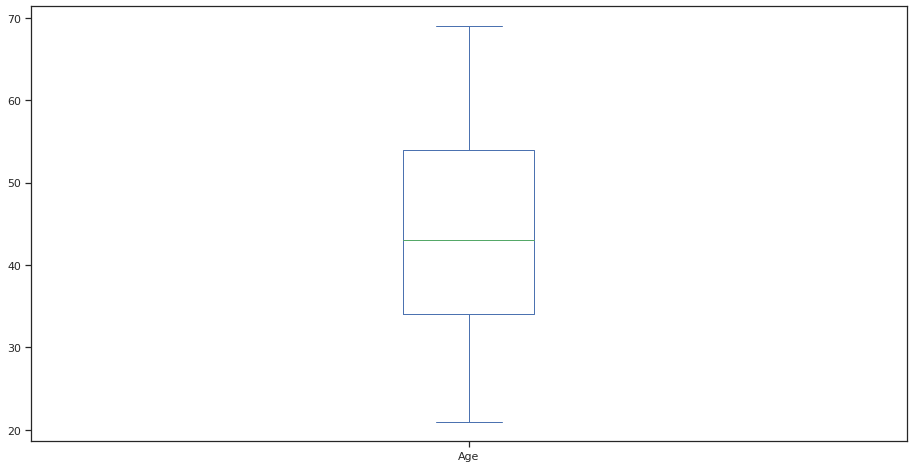

column is hour_Process


<Figure size 432x288 with 0 Axes>

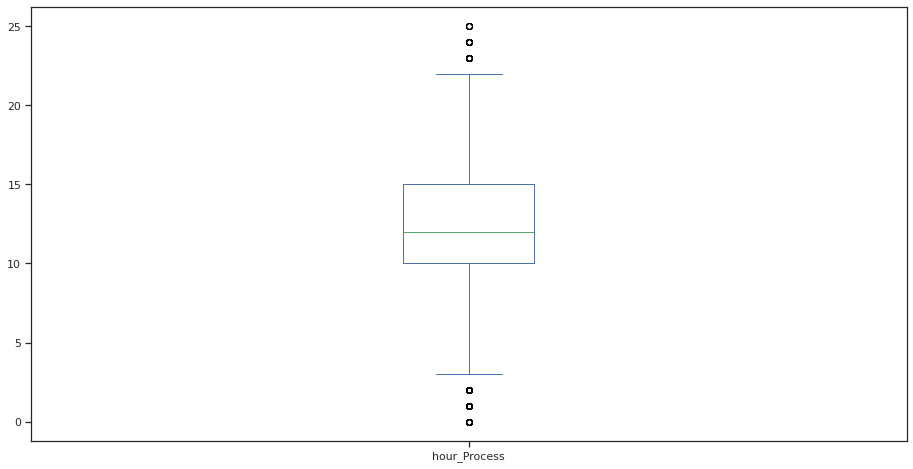

column is Addr_permanent


<Figure size 432x288 with 0 Axes>

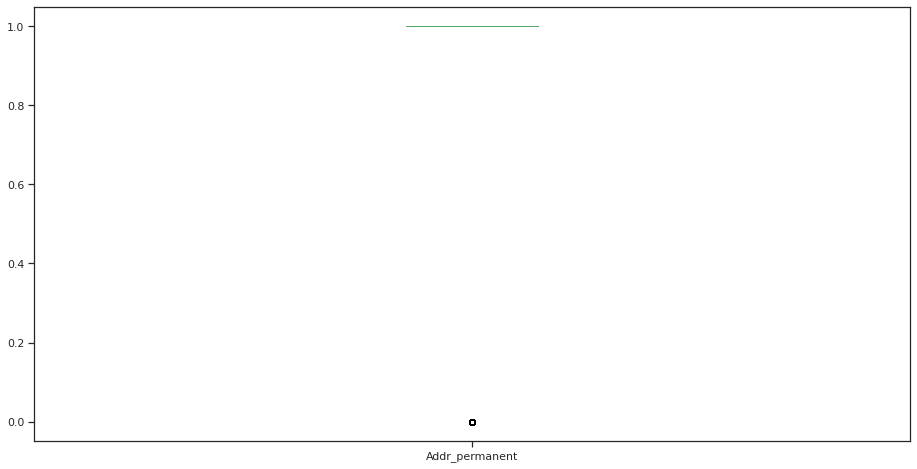

column is Permanent_Addr_tag


<Figure size 432x288 with 0 Axes>

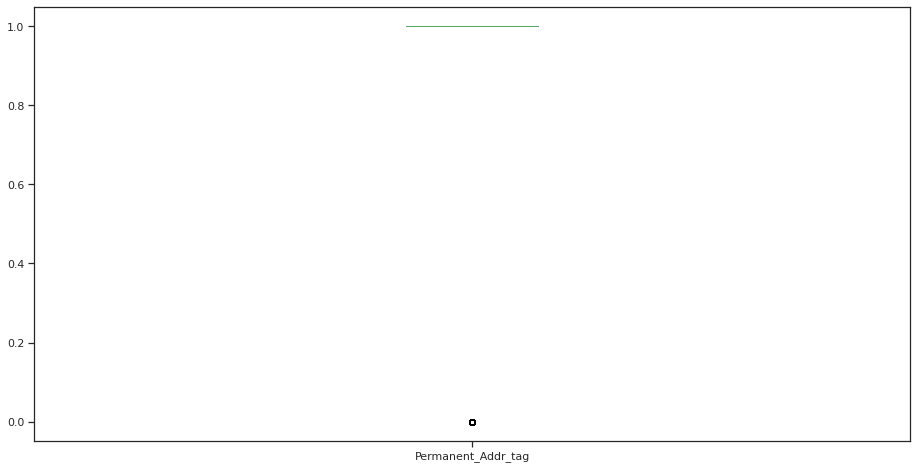

column is c1_rated


<Figure size 432x288 with 0 Axes>

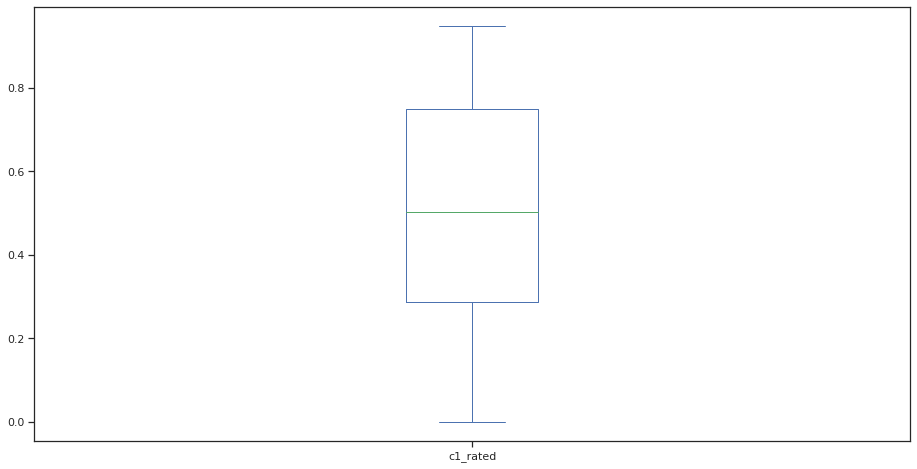

column is c2_rated


<Figure size 432x288 with 0 Axes>

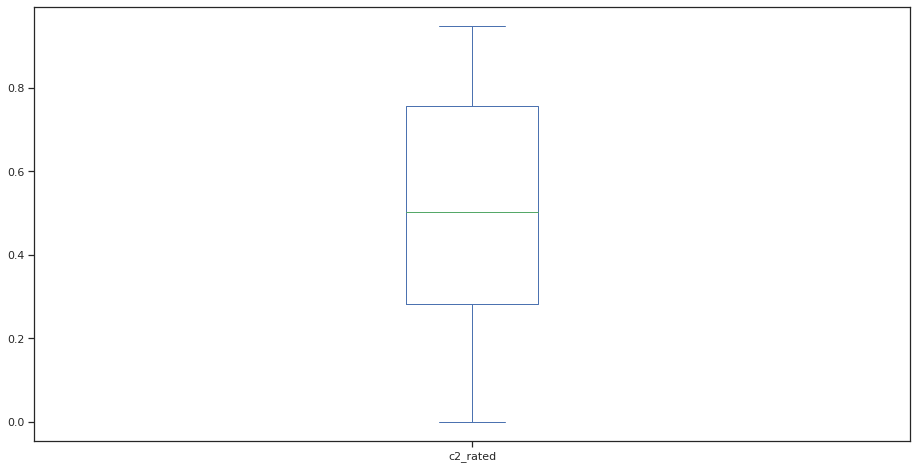

column is Contact_age


<Figure size 432x288 with 0 Axes>

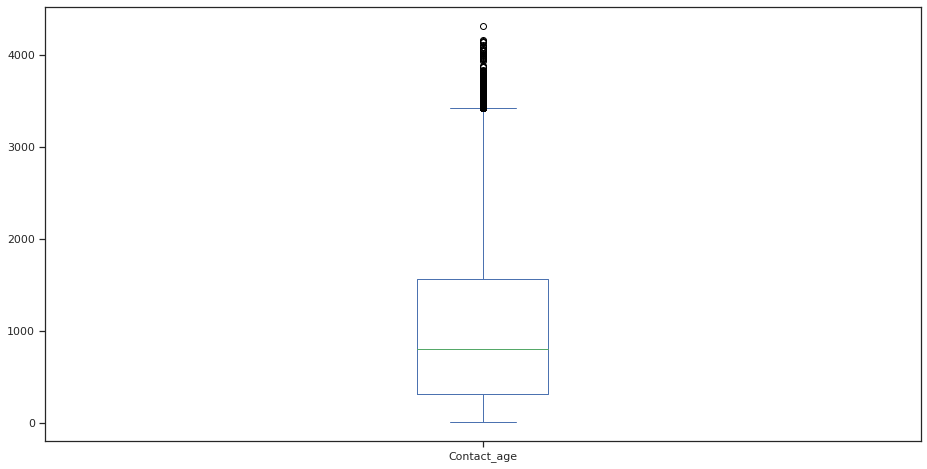

column is Product_bought


<Figure size 432x288 with 0 Axes>

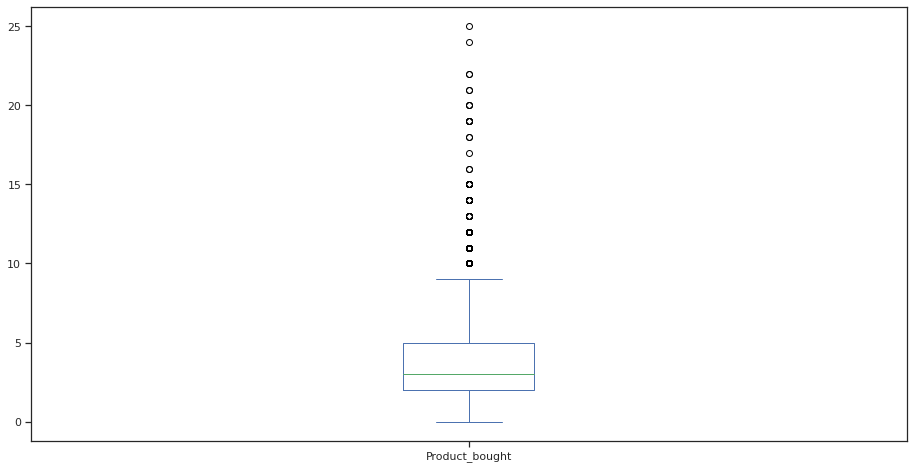

column is Default


<Figure size 432x288 with 0 Axes>

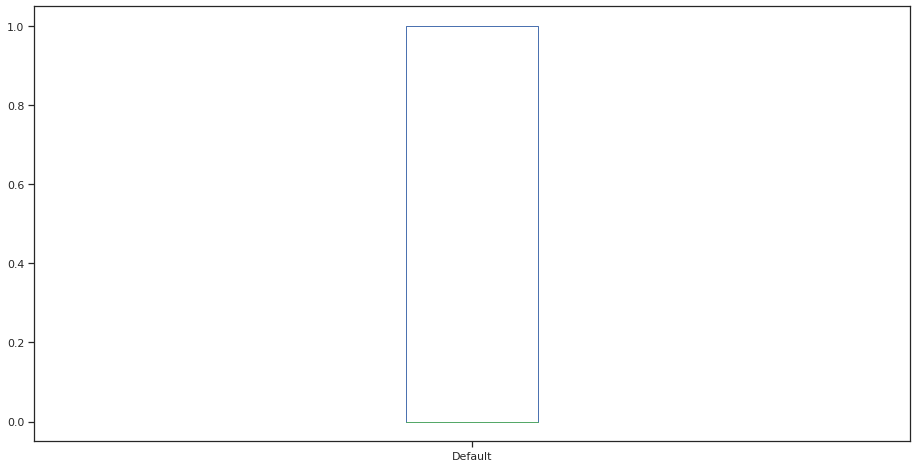

column is Job_Type_Govt.


<Figure size 432x288 with 0 Axes>

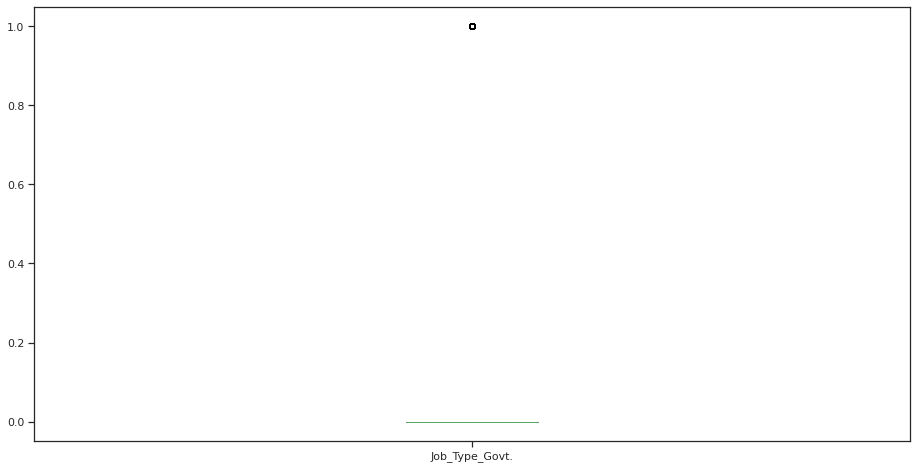

column is Job_Type_IT


<Figure size 432x288 with 0 Axes>

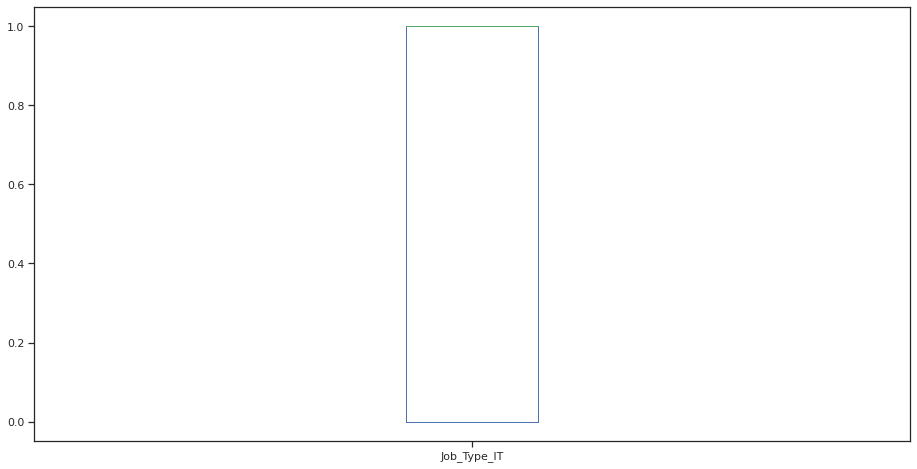

column is Job_Type_Non-IT


<Figure size 432x288 with 0 Axes>

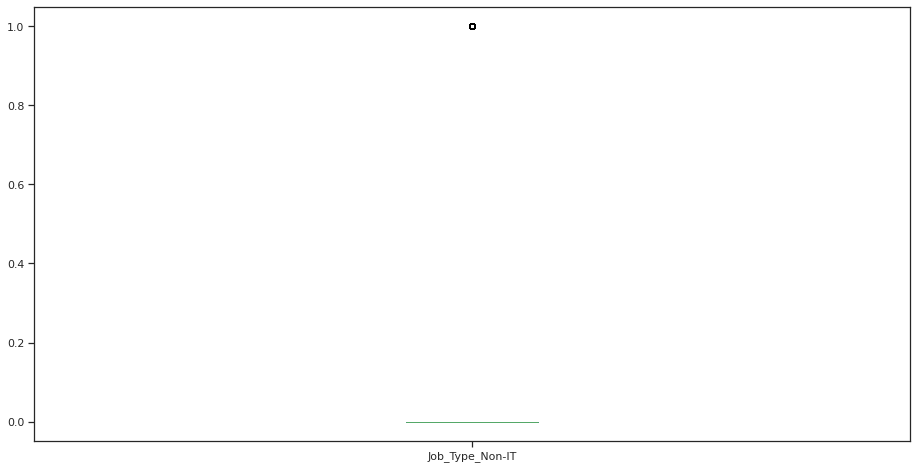

column is Marital_Stat_Divorce


<Figure size 432x288 with 0 Axes>

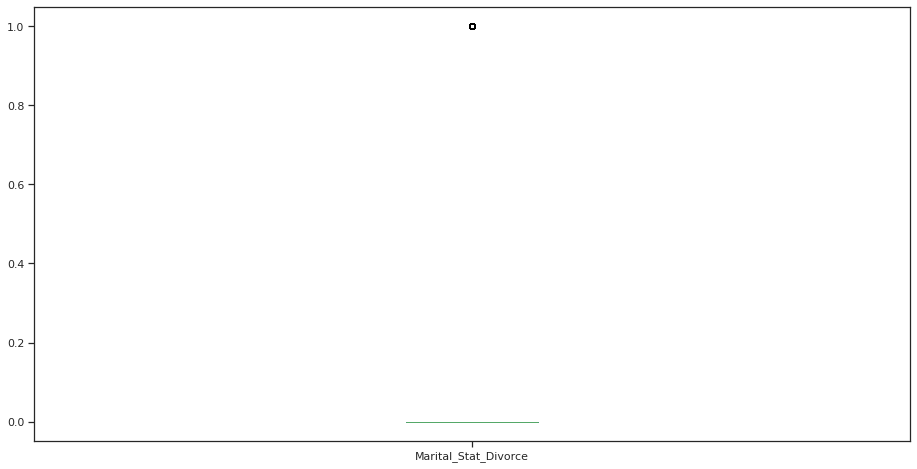

column is Marital_Stat_Married


<Figure size 432x288 with 0 Axes>

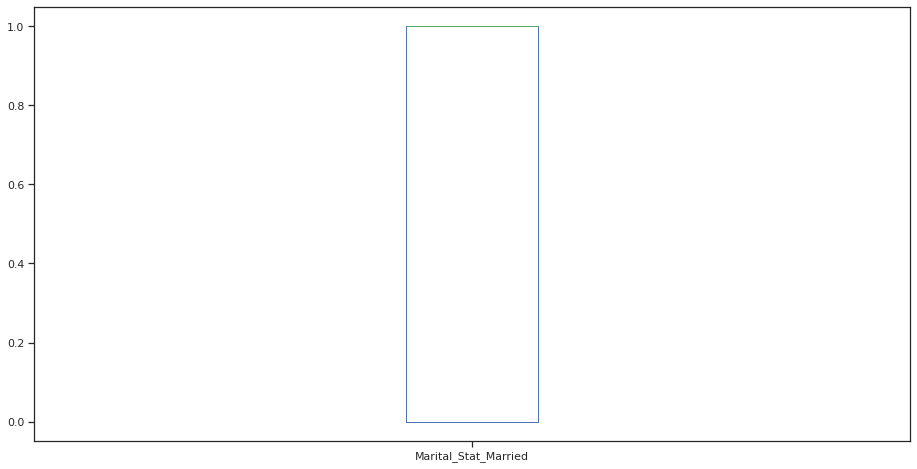

column is Marital_Stat_Single


<Figure size 432x288 with 0 Axes>

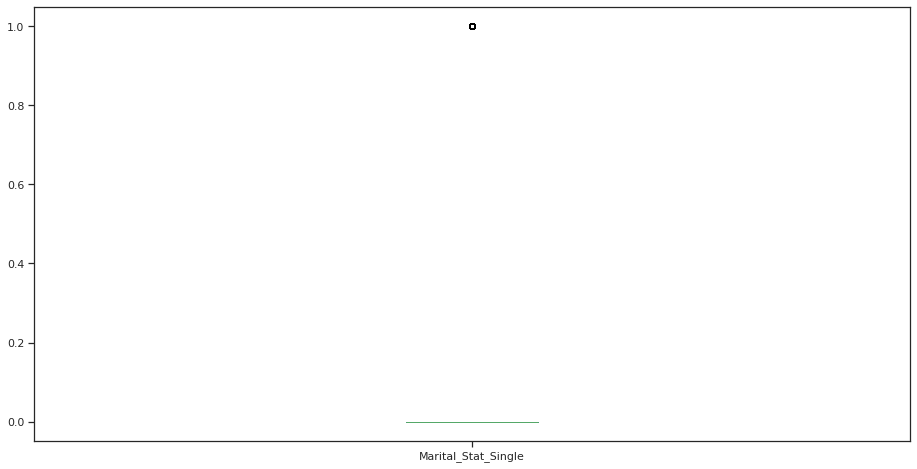

column is Marital_Stat_Widow


<Figure size 432x288 with 0 Axes>

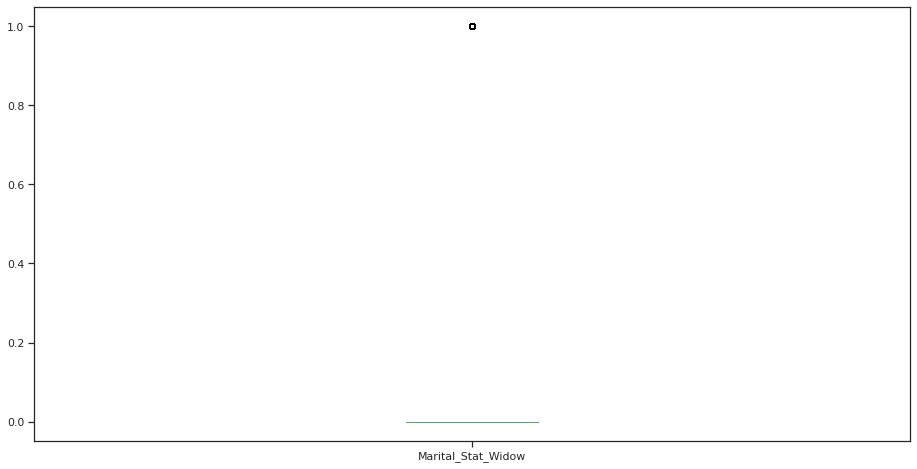

column is Gen_F


<Figure size 432x288 with 0 Axes>

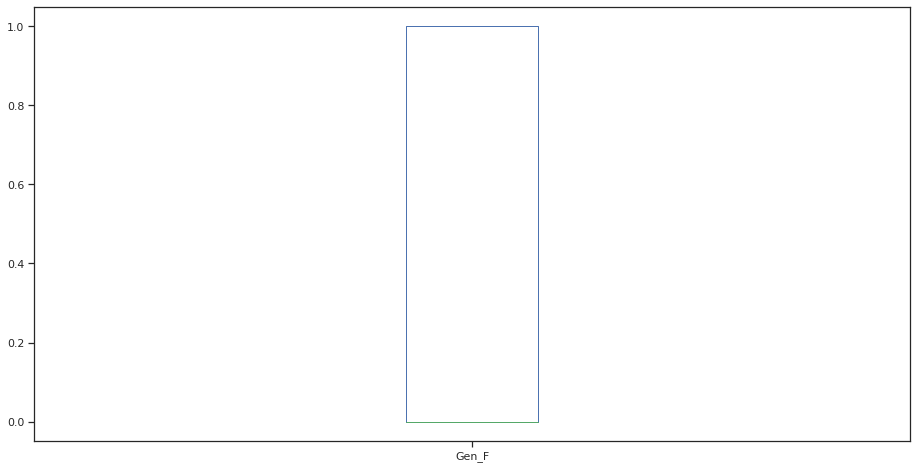

column is Gen_M


<Figure size 432x288 with 0 Axes>

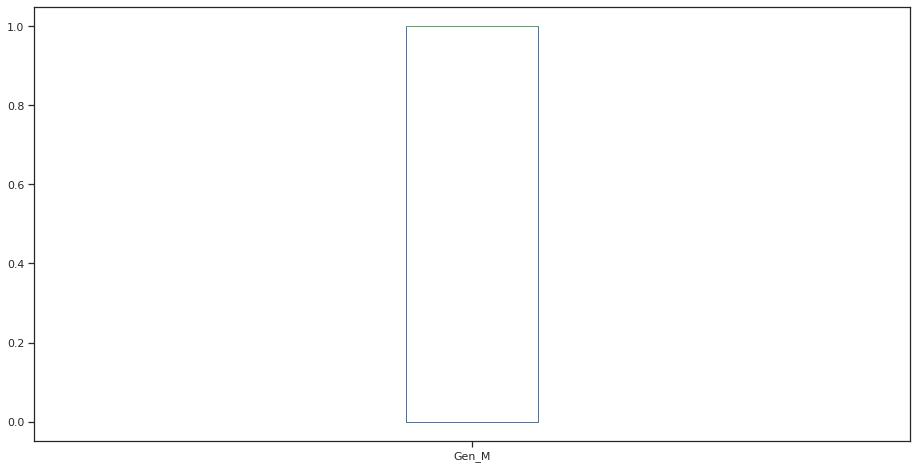

column is Region_Central


<Figure size 432x288 with 0 Axes>

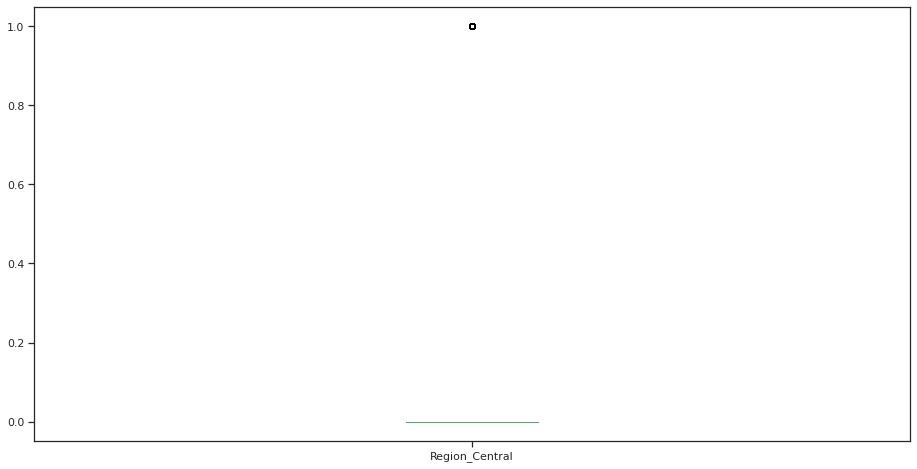

column is Region_East


<Figure size 432x288 with 0 Axes>

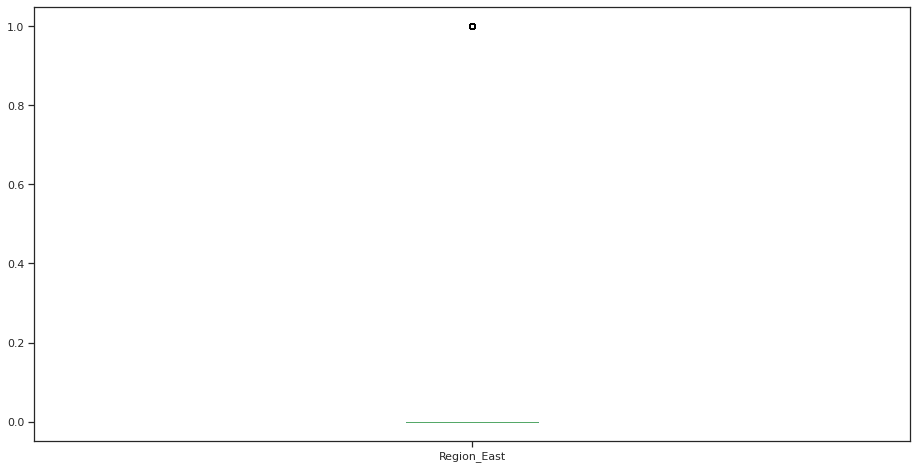

column is Region_North


<Figure size 432x288 with 0 Axes>

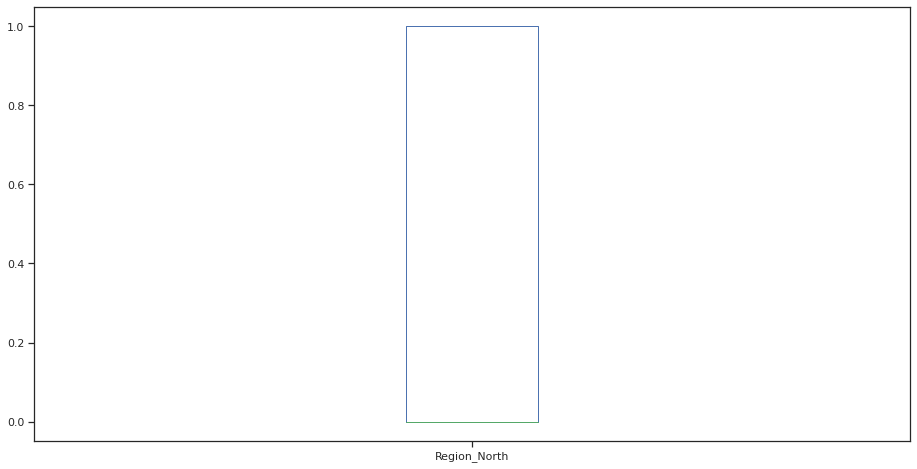

column is Region_South


<Figure size 432x288 with 0 Axes>

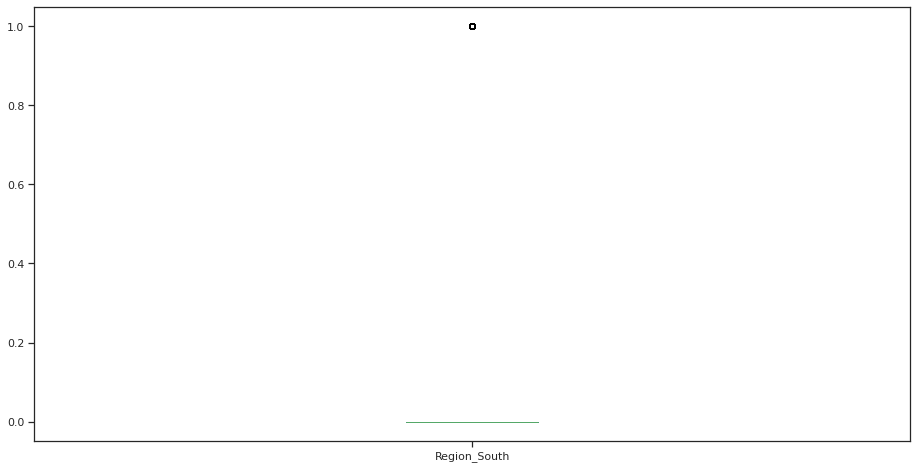

column is Region_Type_Metro


<Figure size 432x288 with 0 Axes>

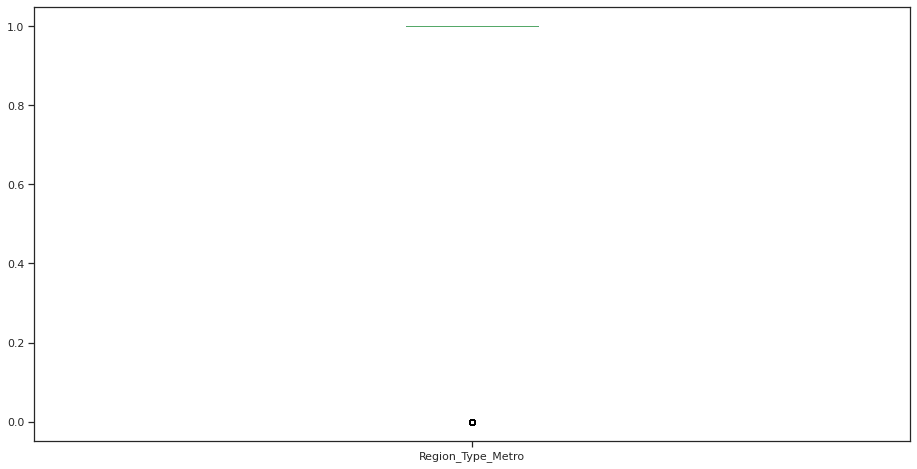

column is Region_Type_Rural


<Figure size 432x288 with 0 Axes>

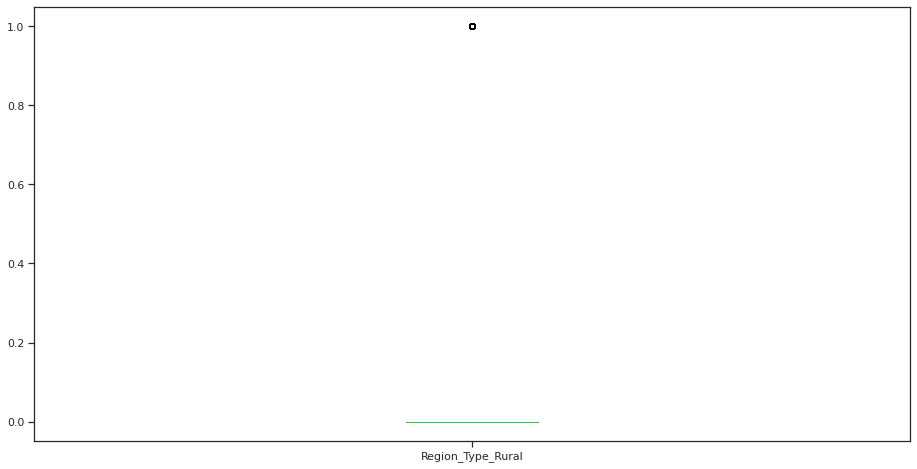

column is Region_Type_other


<Figure size 432x288 with 0 Axes>

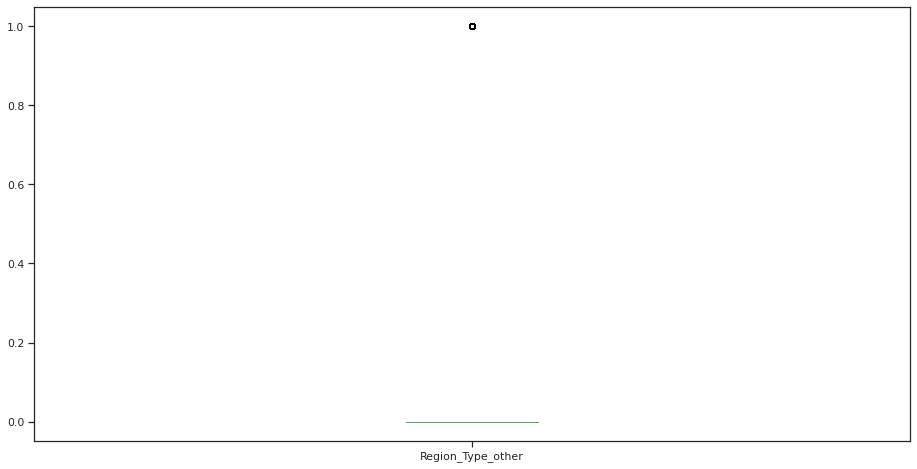

column is Type_Loan_CLoan


<Figure size 432x288 with 0 Axes>

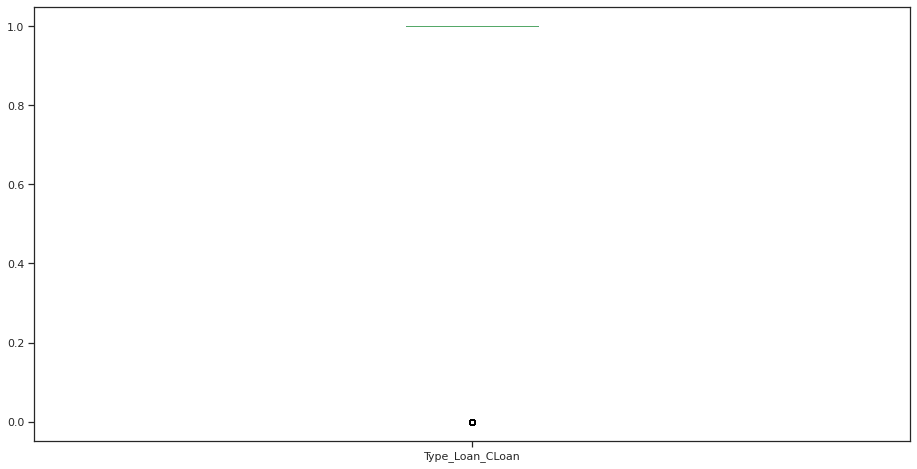

column is Type_Loan_RLoan


<Figure size 432x288 with 0 Axes>

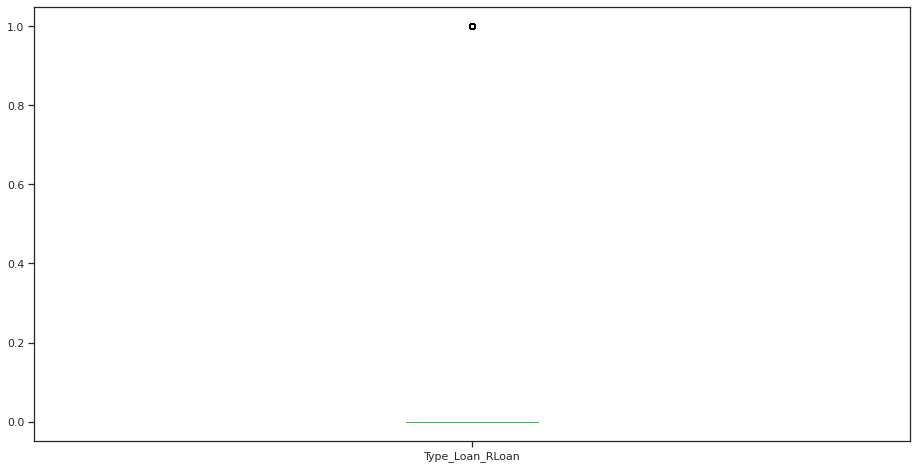

In [174]:
chk_box(new_train_imputed)

In [231]:
for i in new_train_imputed.columns:
    if (i == 'Default'):
        print("")
    else:
        Q1 = np.percentile(new_train_imputed[i], 25,interpolation = 'midpoint')
 
        Q3 = np.percentile(new_train_imputed[i], 75,interpolation = 'midpoint')
    
        IQR = Q3 - Q1
        
        upper = (Q3+1.5*IQR)
        lower = (Q1-1.5*IQR)
        
        curr_val = new_train_imputed[i]
        median = new_train_imputed[i].quantile(0.50)
                        
        print("column is",i)
        print("Median is",median) 
        print("Upper bound is",upper)
        print("Lower bound is",lower)
        
        new_train_imputed[i] = np.where(new_train_imputed[i] >= upper, median, curr_val)
        new_train_imputed[i] = np.where(new_train_imputed[i] <= lower, median, curr_val)
    

column is ID
Median is 488952.5
Upper bound is 692115.0
Lower bound is 285683.0
column is Compensation
Median is 669290.0
Upper bound is 1406577.5
Lower bound is -7600.899999999907
column is Vehicle_Status
Median is 0.0
Upper bound is 2.5
Lower bound is -1.5
column is Loan_amt
Median is 349542.5
Upper bound is 1088720.15
Lower bound is -325984.2499999999
column is Annuity_amt
Median is 10773.221000000001
Upper bound is 16288.8925
Lower bound is 5231.3925
column is density_Ind
Median is 0.0204
Upper bound is 0.0588
Lower bound is -0.018
column is Default_hist
Median is 1.0
Upper bound is 1.0
Lower bound is 1.0
column is Prop_List
Median is 1.0
Upper bound is 1.0
Lower bound is 1.0
column is Home_Appliances
Median is 4.0
Upper bound is 7.0
Lower bound is -1.0
column is Credit_Inq
Median is 1.0
Upper bound is 4.0
Lower bound is -0.8000000000000003
column is Education_det
Median is 1.0
Upper bound is 1.0
Lower bound is 1.0
column is Credit_Lnks
Median is 1.0
Upper bound is 1.0
Lower bound 

column is ID


<Figure size 432x288 with 0 Axes>

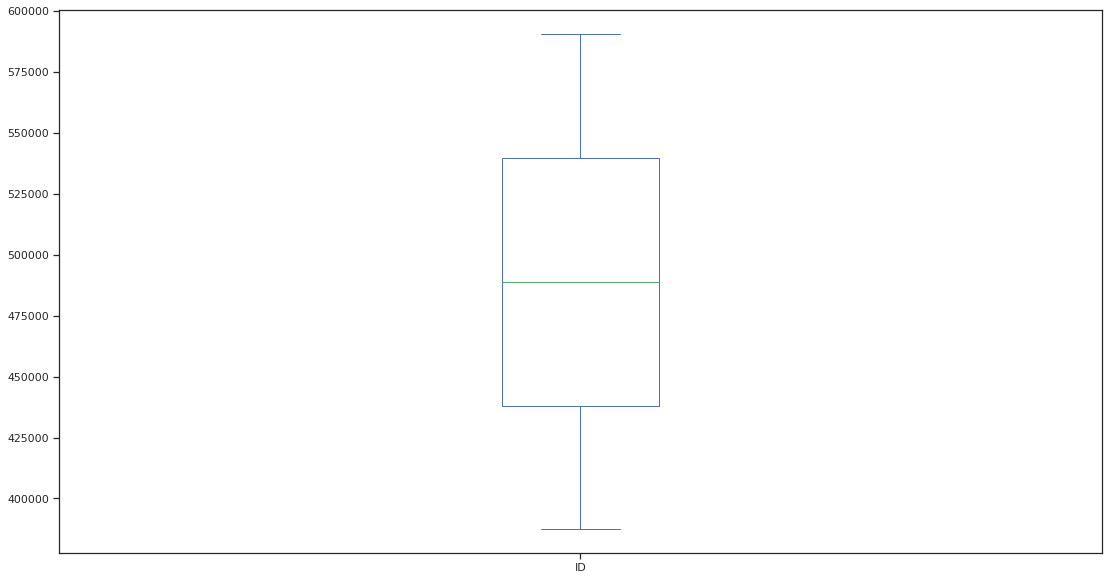

column is Compensation


<Figure size 432x288 with 0 Axes>

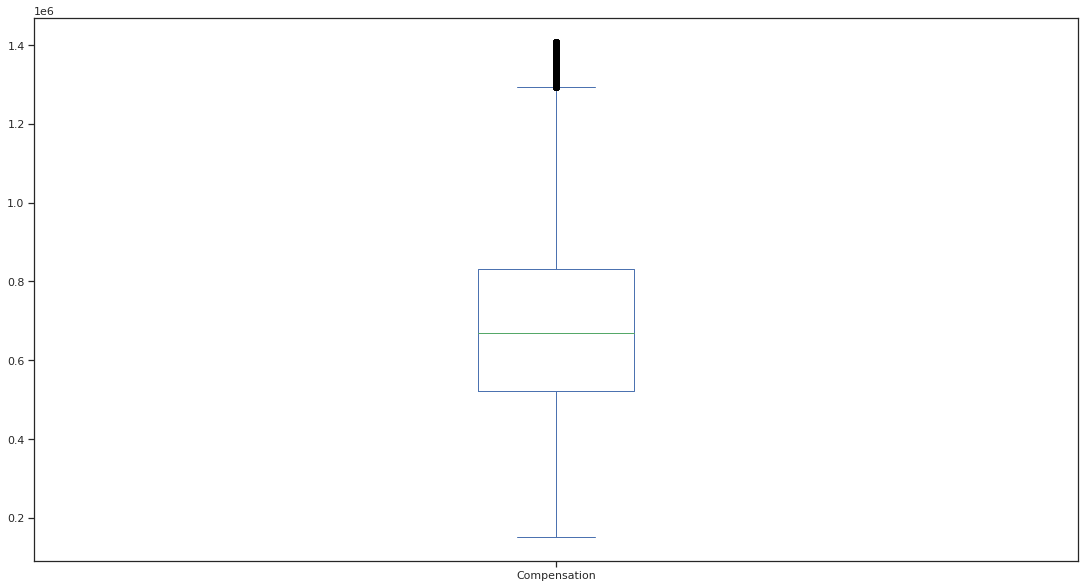

column is Vehicle_Status


<Figure size 432x288 with 0 Axes>

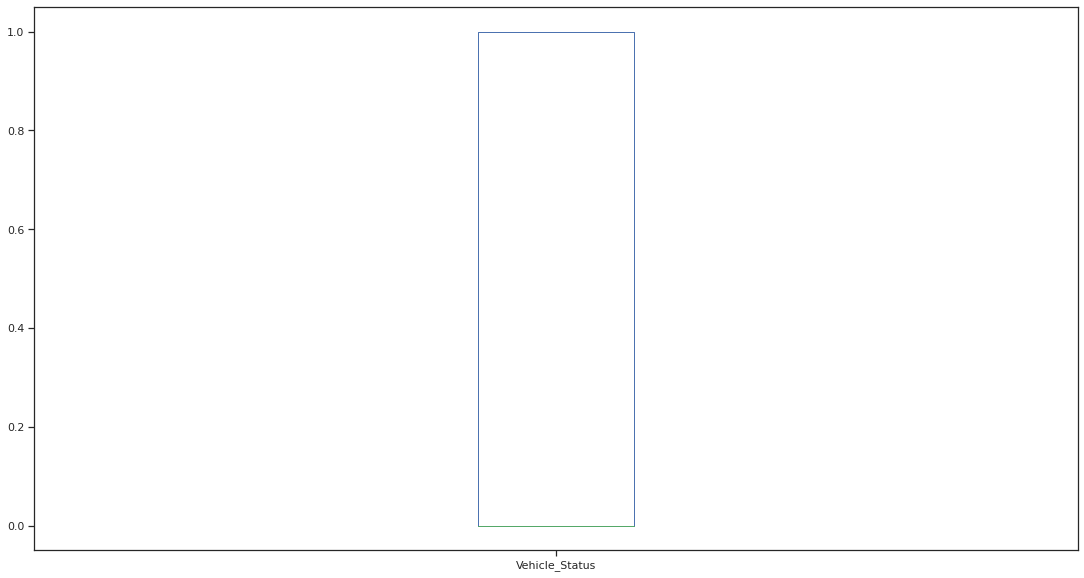

column is Loan_amt


<Figure size 432x288 with 0 Axes>

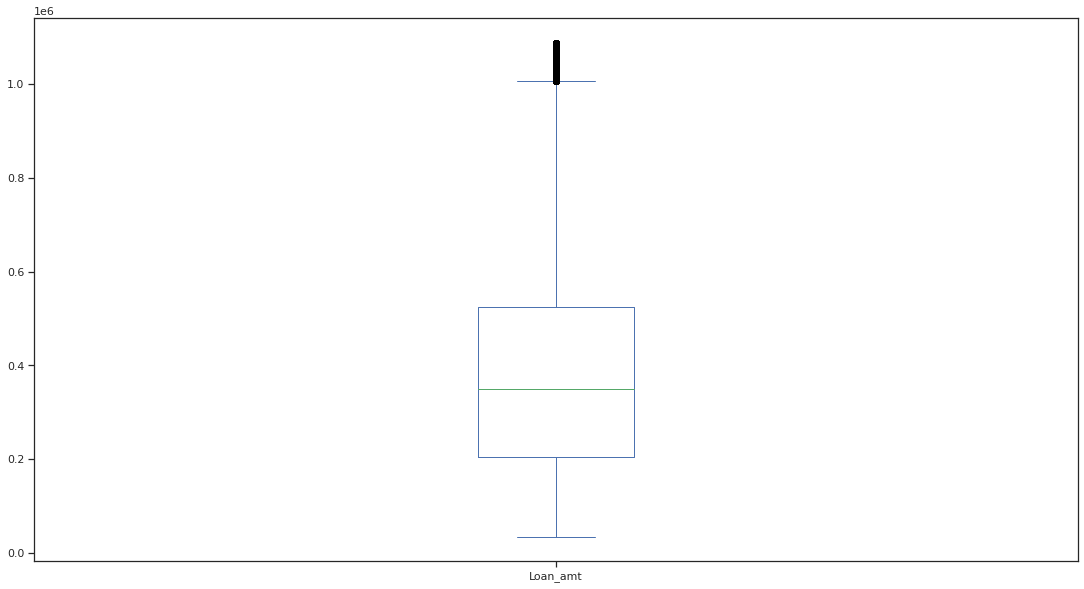

column is Annuity_amt


<Figure size 432x288 with 0 Axes>

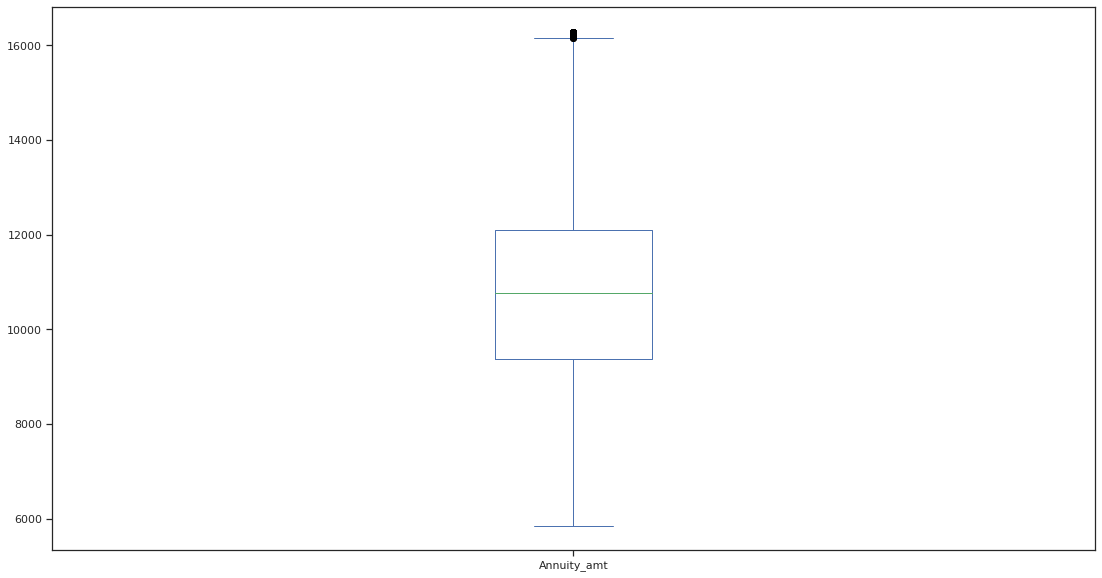

column is density_Ind


<Figure size 432x288 with 0 Axes>

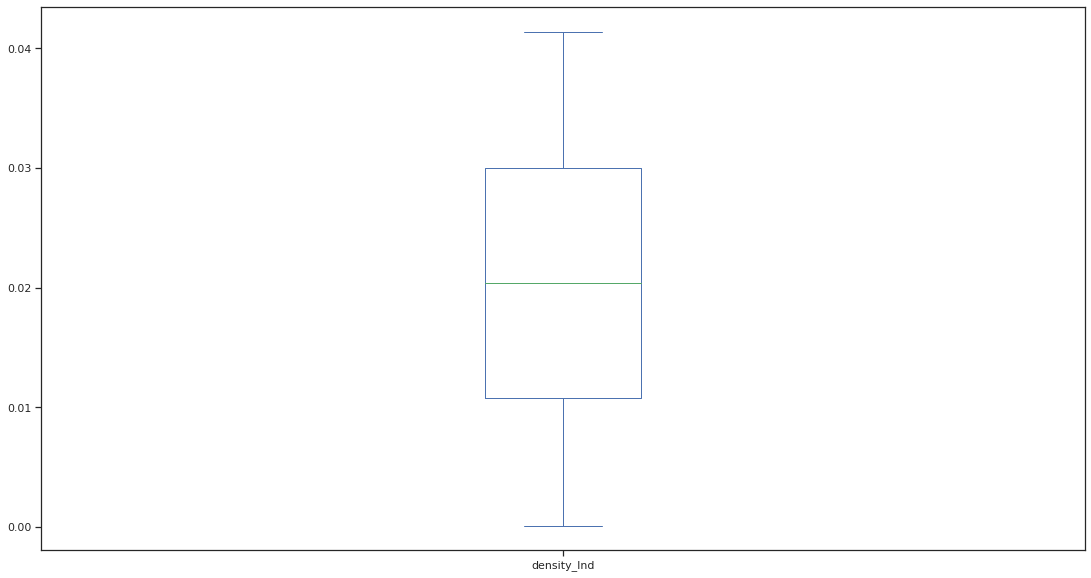

column is Default_hist


<Figure size 432x288 with 0 Axes>

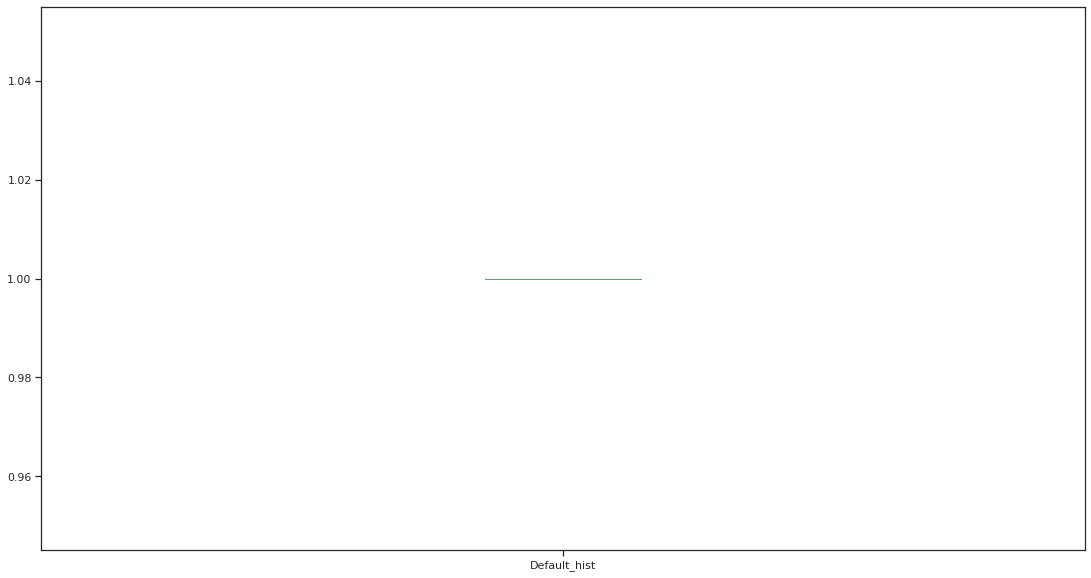

column is Prop_List


<Figure size 432x288 with 0 Axes>

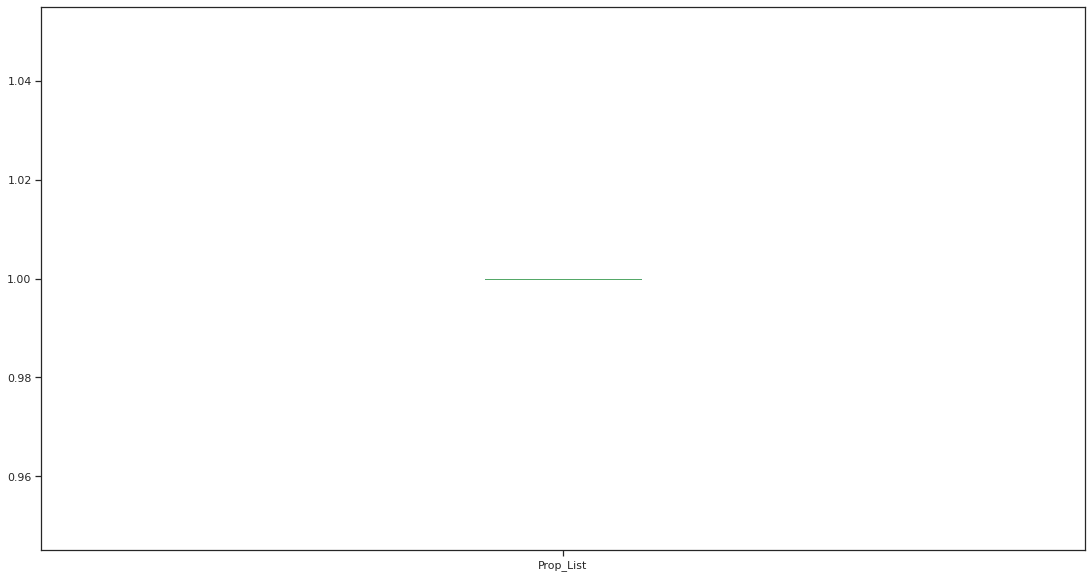

column is Home_Appliances


<Figure size 432x288 with 0 Axes>

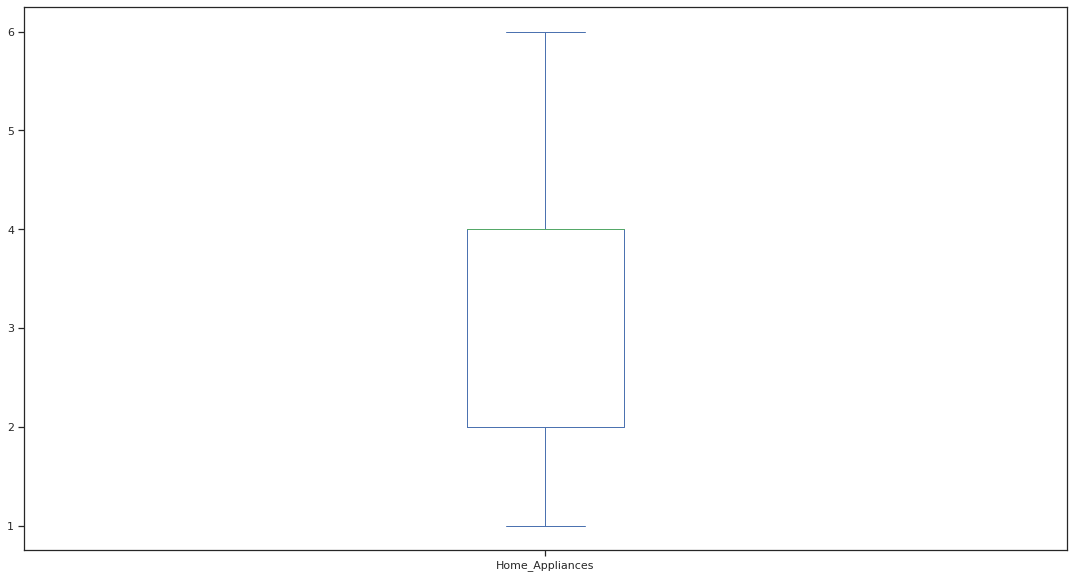

column is Credit_Inq


<Figure size 432x288 with 0 Axes>

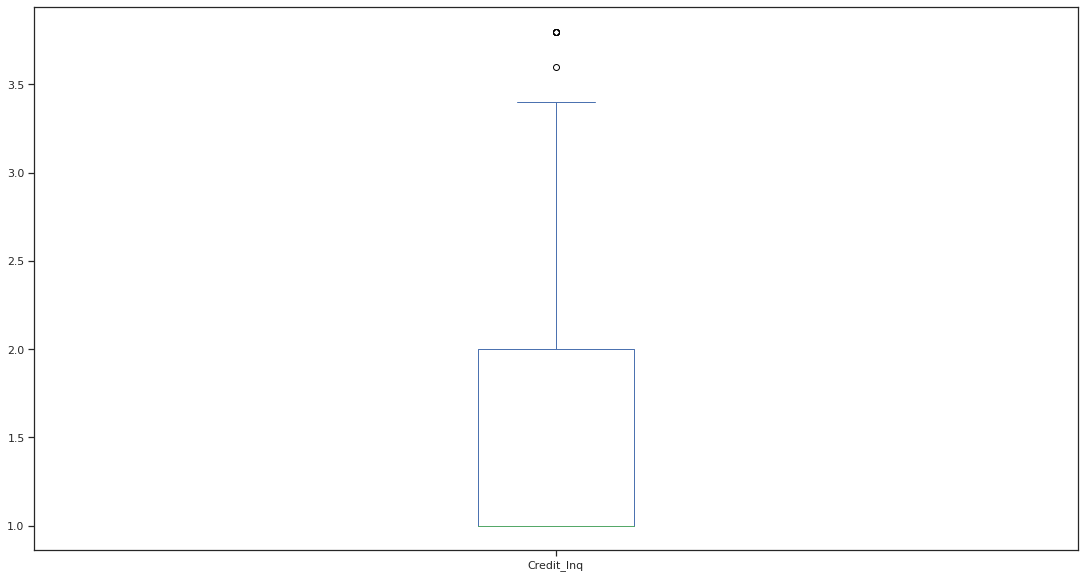

column is Education_det


<Figure size 432x288 with 0 Axes>

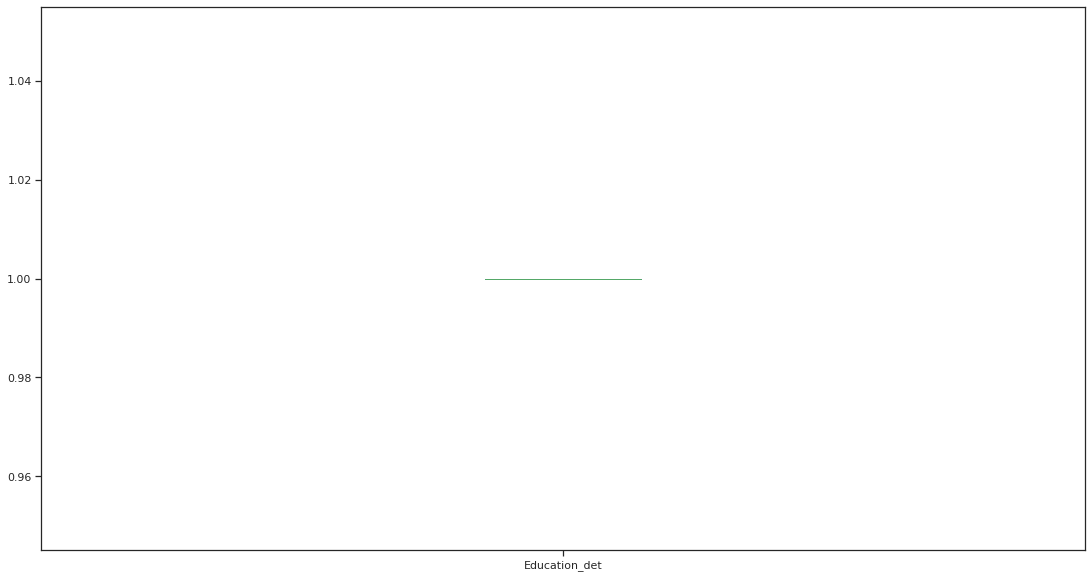

column is Credit_Lnks


<Figure size 432x288 with 0 Axes>

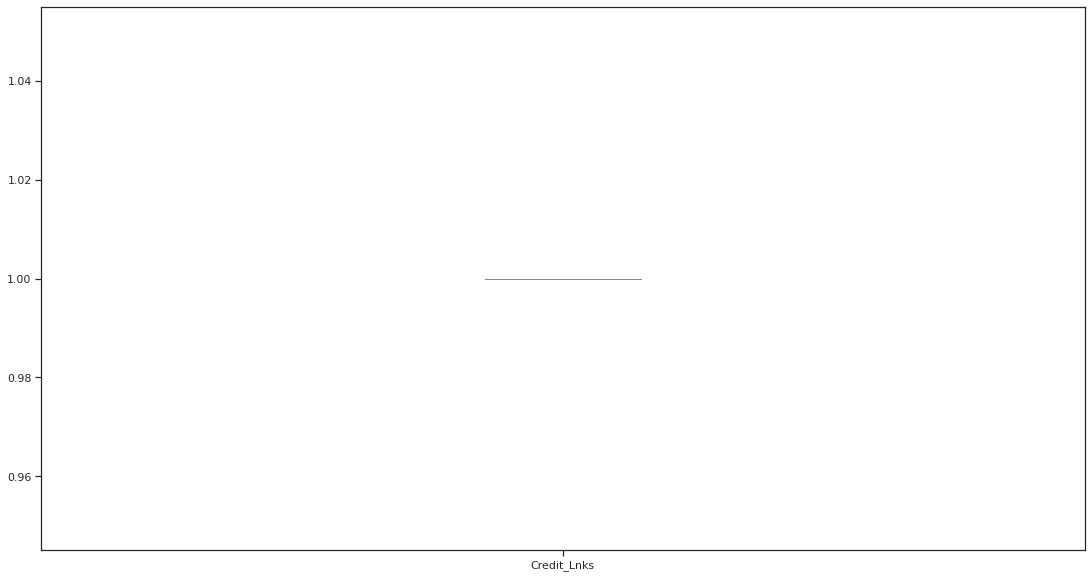

column is Experience


<Figure size 432x288 with 0 Axes>

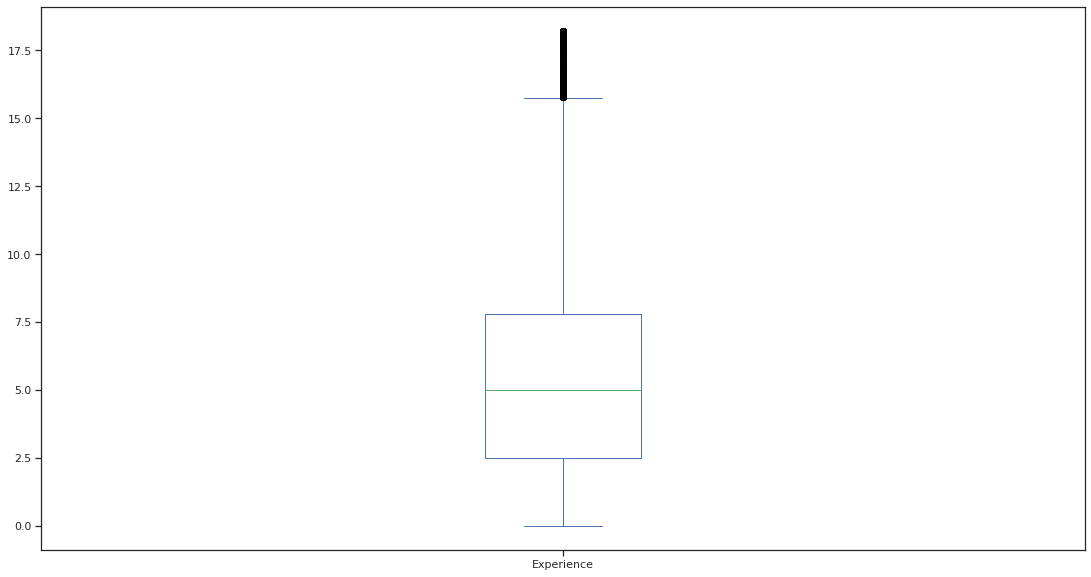

column is Income_Alt


<Figure size 432x288 with 0 Axes>

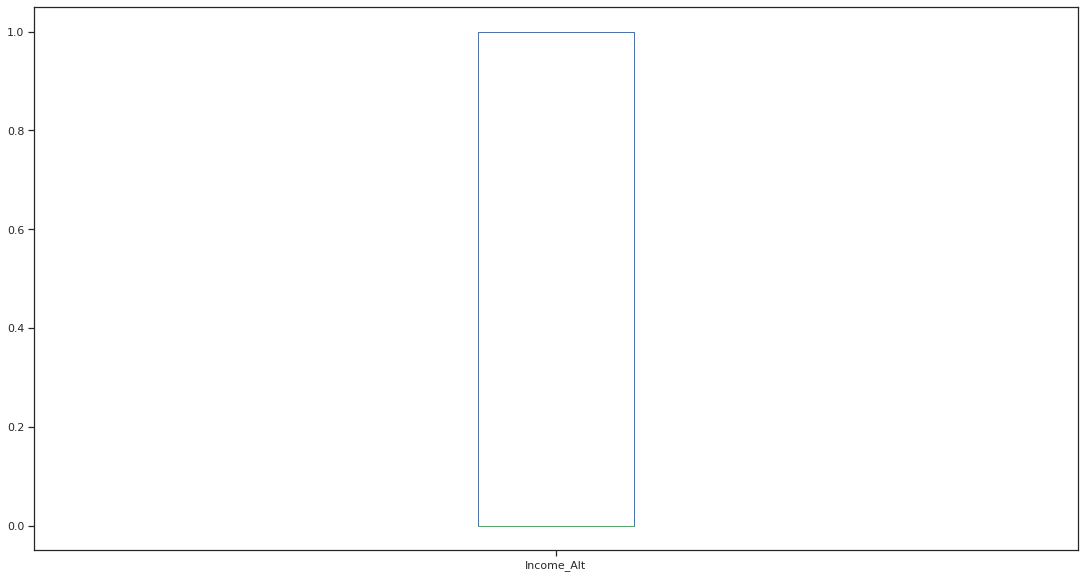

column is Day_Process


<Figure size 432x288 with 0 Axes>

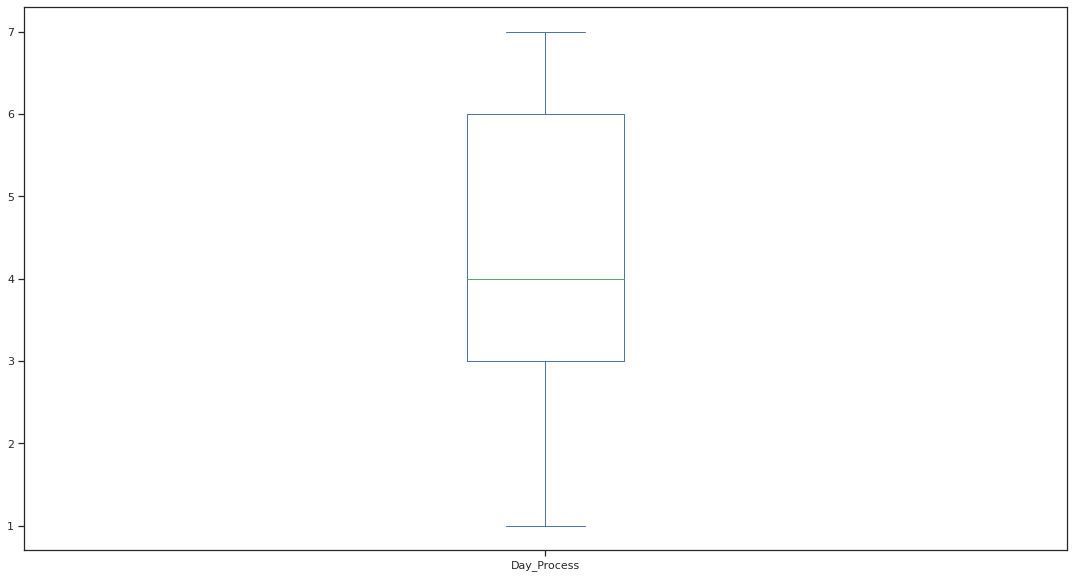

column is Ph.No


<Figure size 432x288 with 0 Axes>

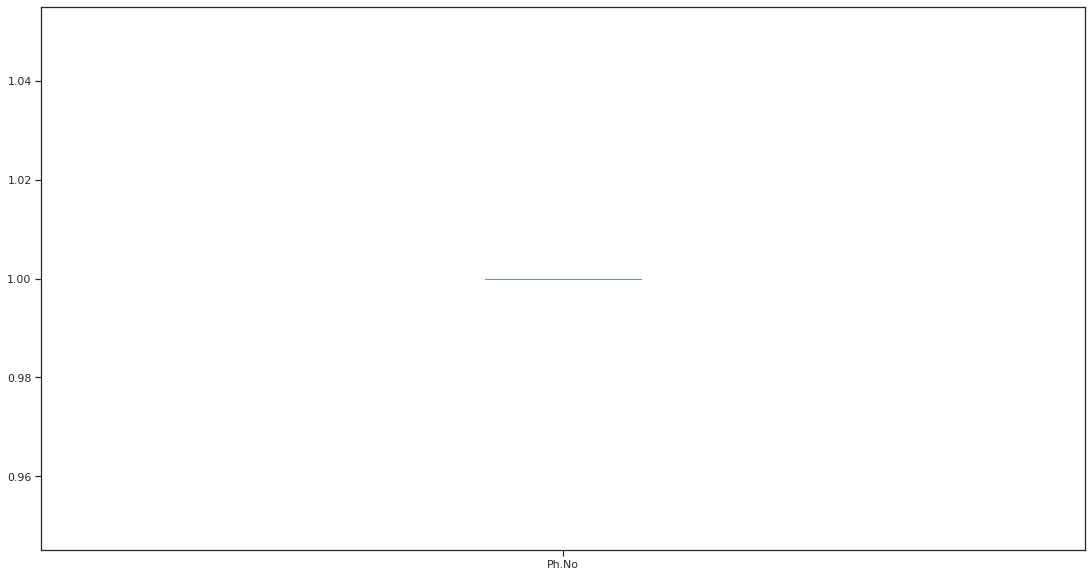

column is Dependents


<Figure size 432x288 with 0 Axes>

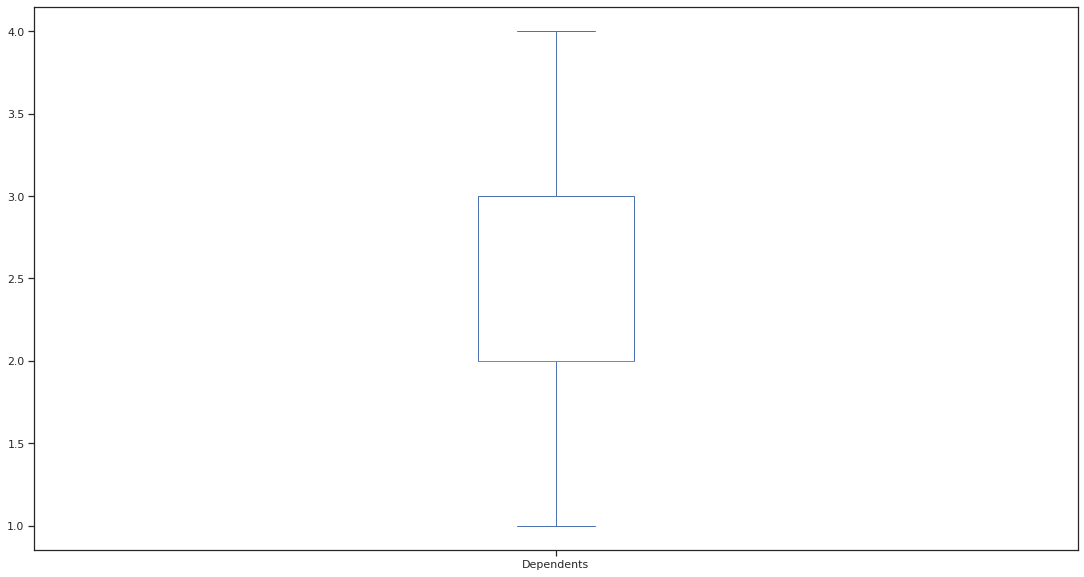

column is Company_Rating


<Figure size 432x288 with 0 Axes>

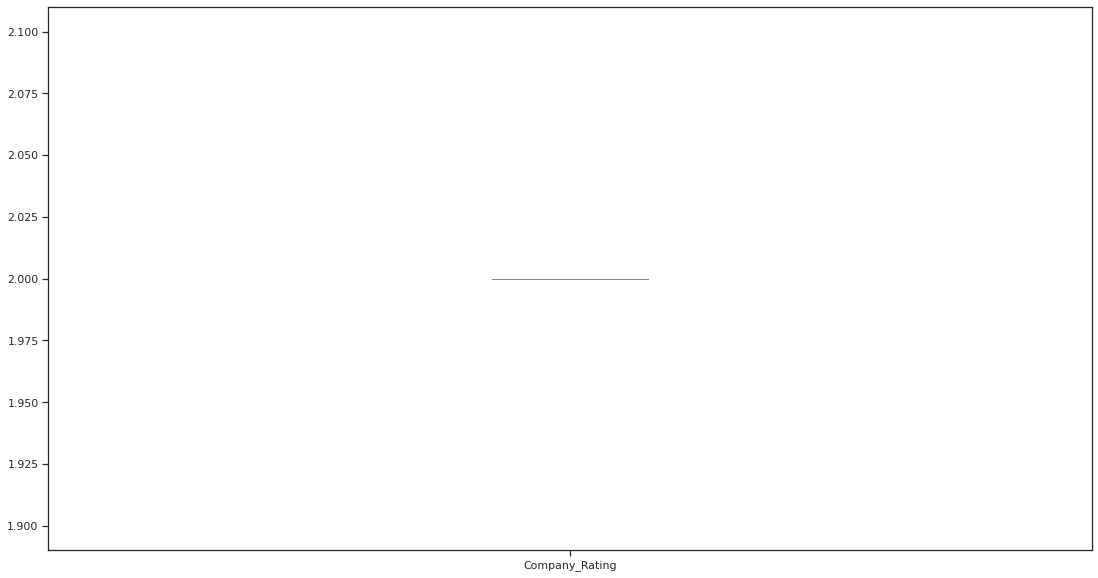

column is Age


<Figure size 432x288 with 0 Axes>

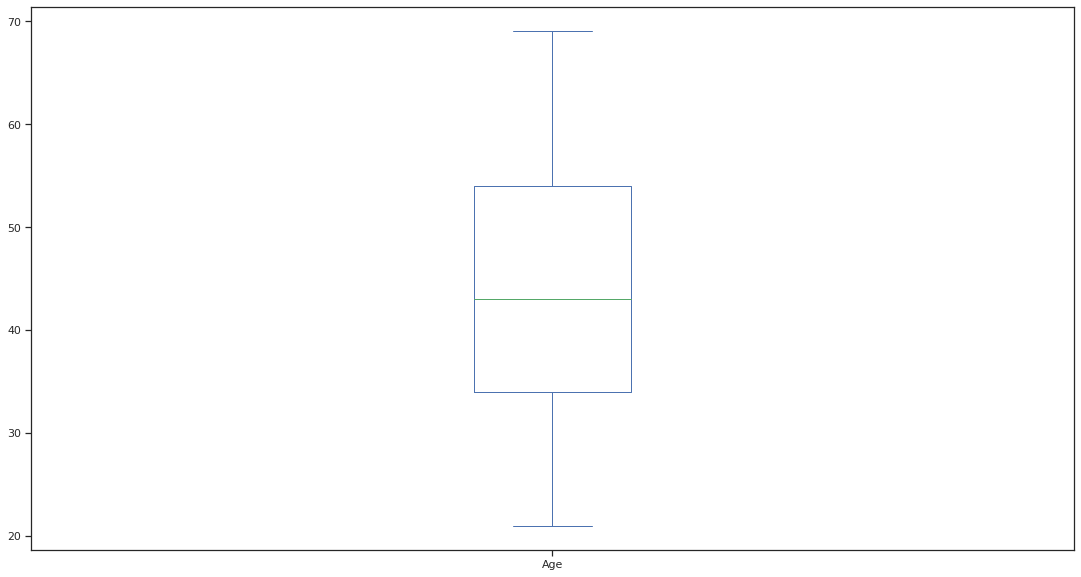

column is hour_Process


<Figure size 432x288 with 0 Axes>

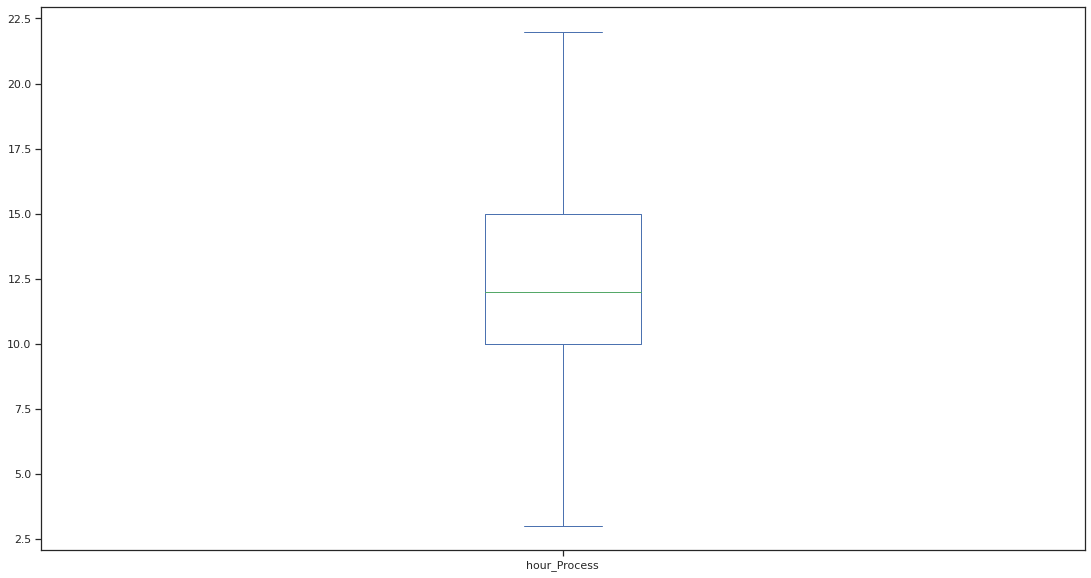

column is Addr_permanent


<Figure size 432x288 with 0 Axes>

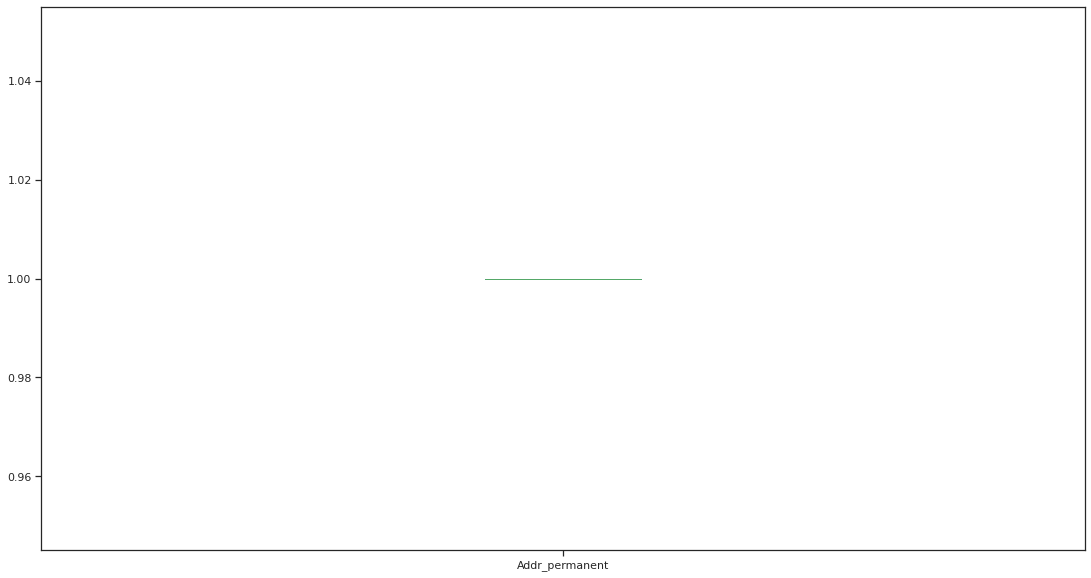

column is Permanent_Addr_tag


<Figure size 432x288 with 0 Axes>

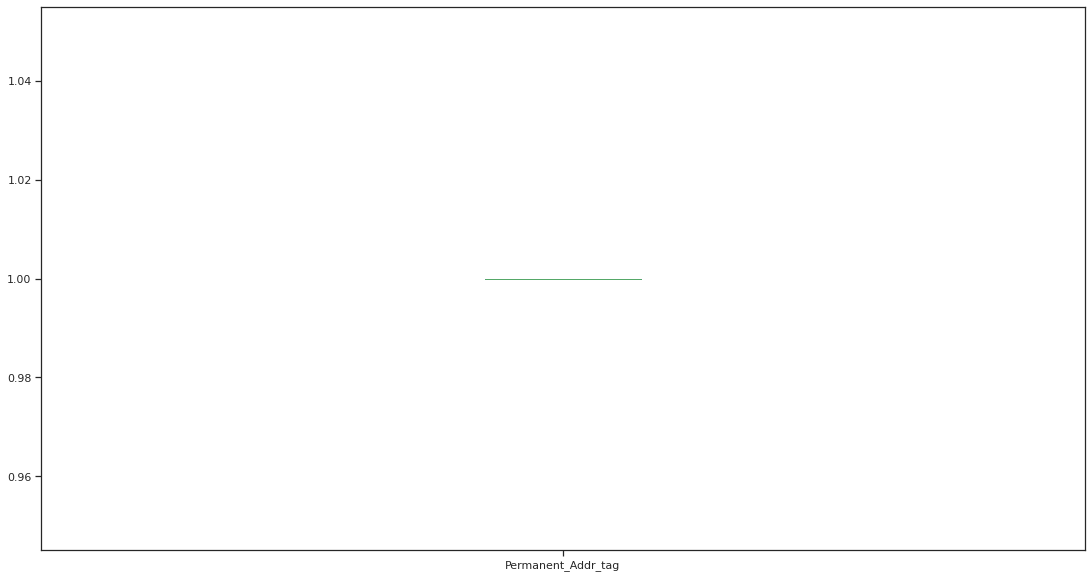

column is c1_rated


<Figure size 432x288 with 0 Axes>

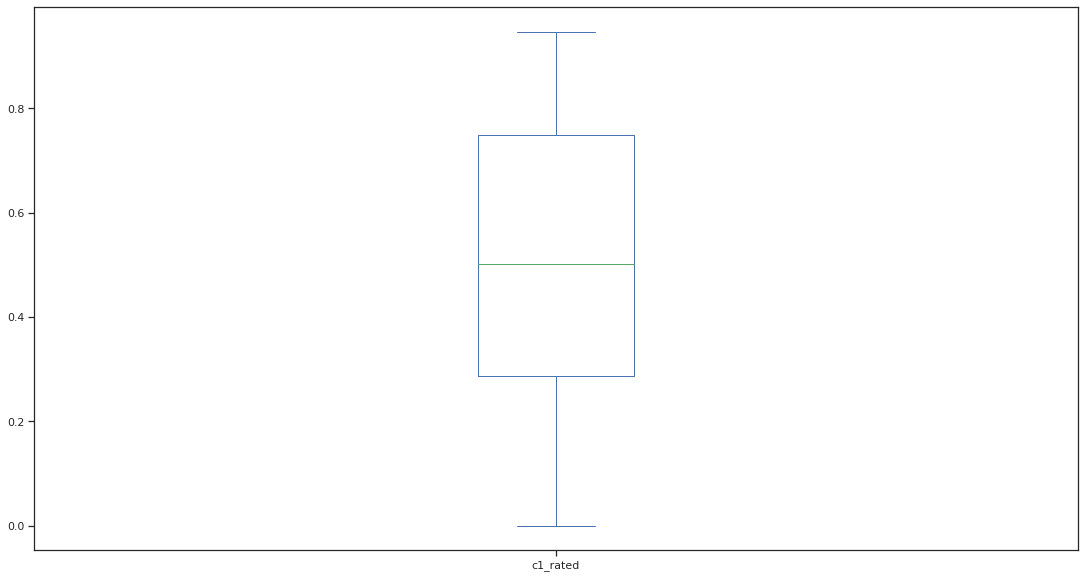

column is c2_rated


<Figure size 432x288 with 0 Axes>

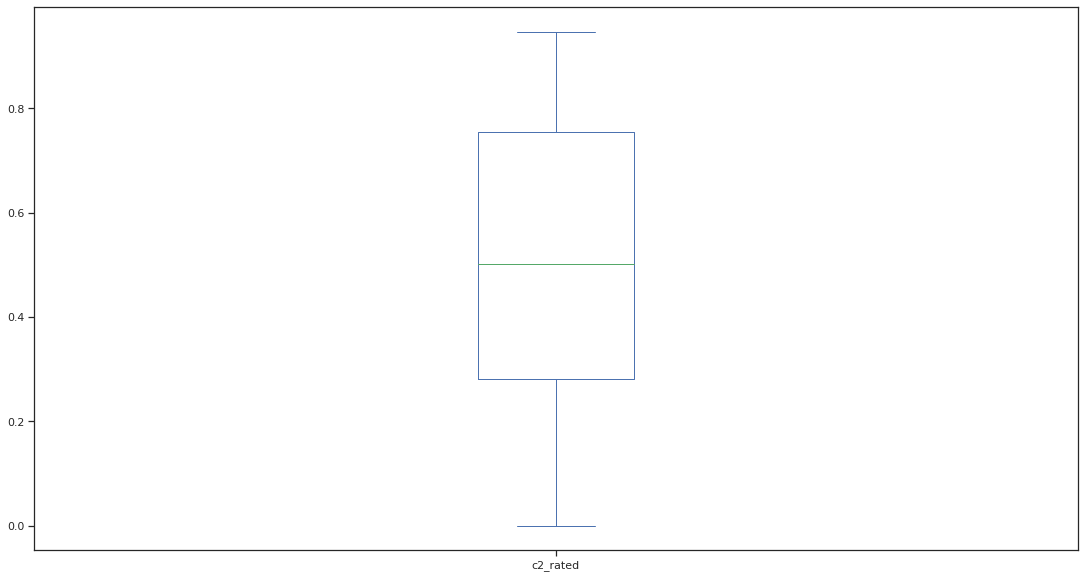

column is Contact_age


<Figure size 432x288 with 0 Axes>

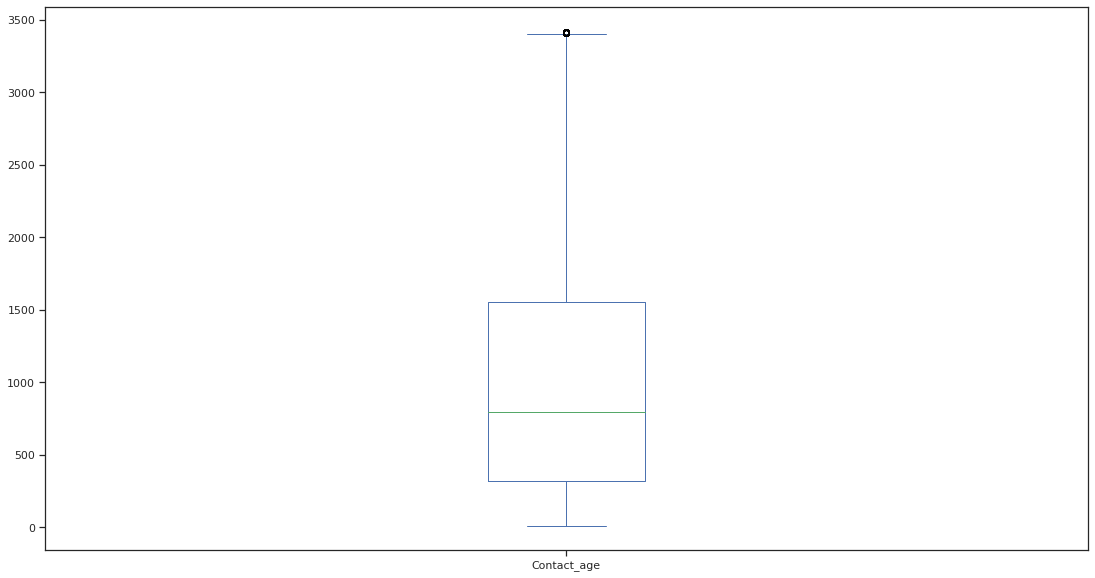

column is Product_bought


<Figure size 432x288 with 0 Axes>

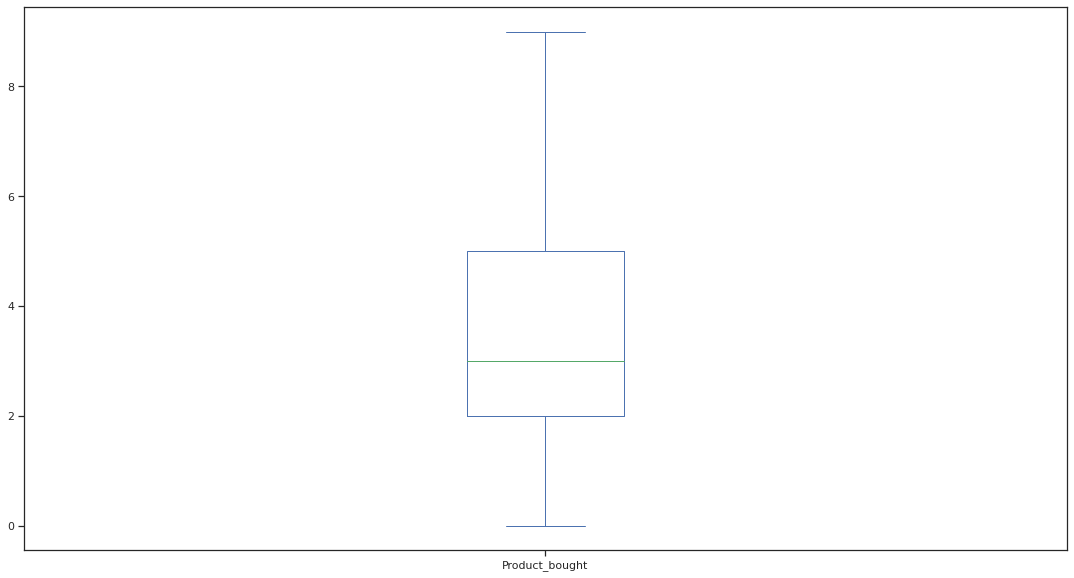

column is Default


<Figure size 432x288 with 0 Axes>

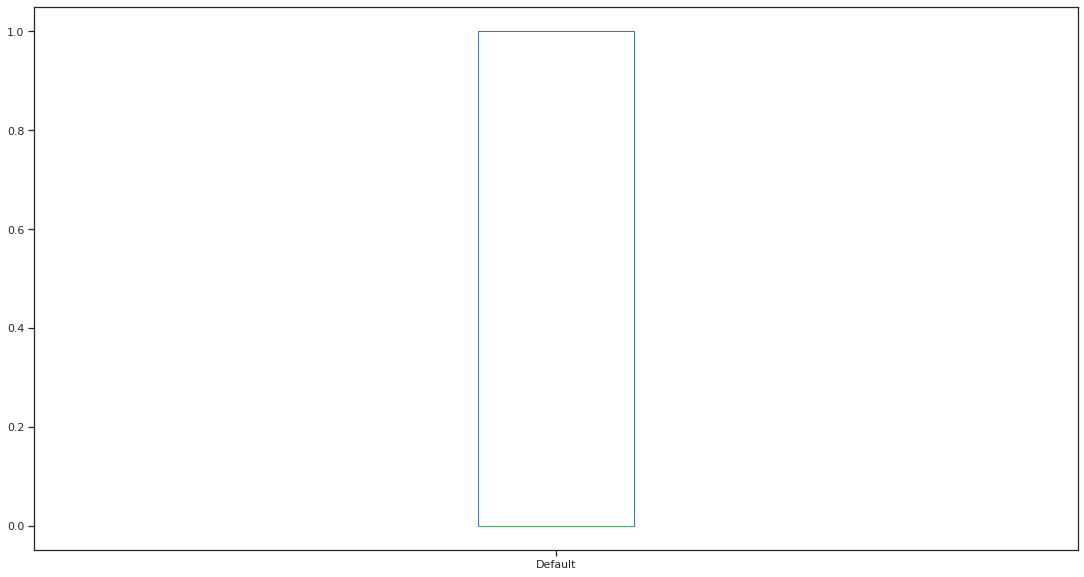

column is Job_Type_Govt.


<Figure size 432x288 with 0 Axes>

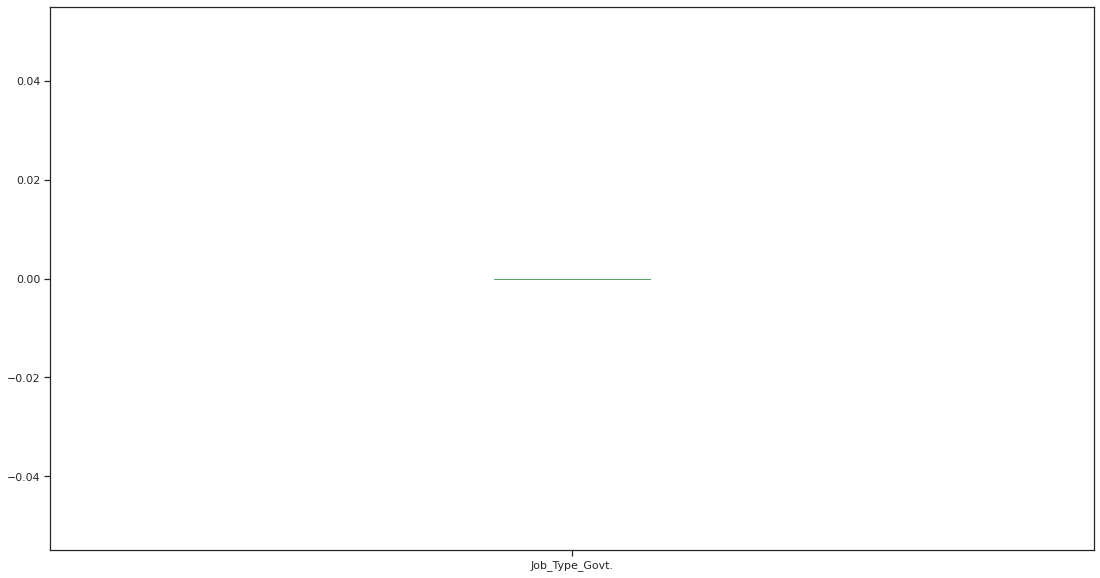

column is Job_Type_IT


<Figure size 432x288 with 0 Axes>

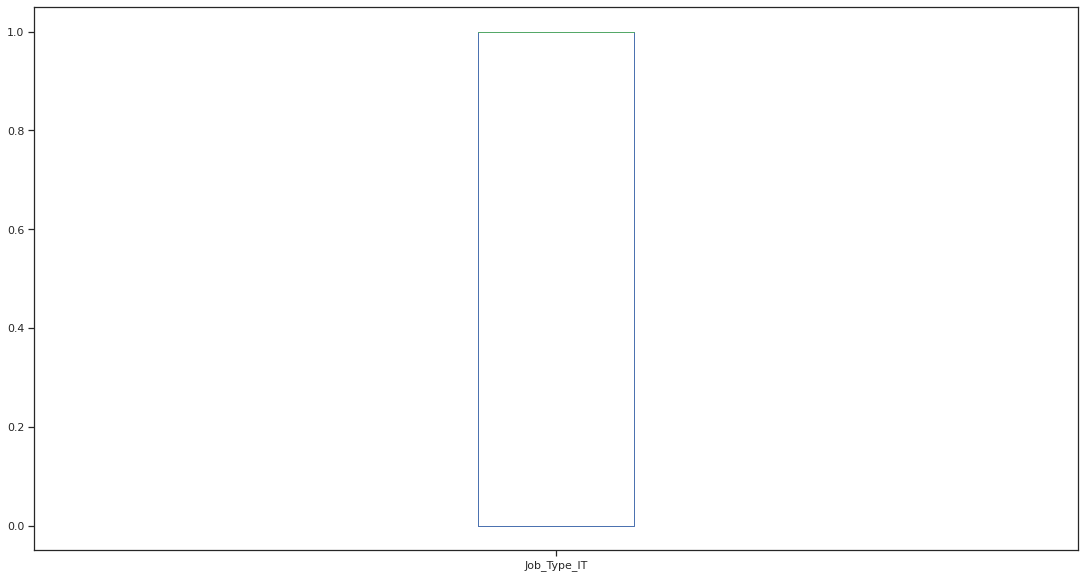

column is Job_Type_Non-IT


<Figure size 432x288 with 0 Axes>

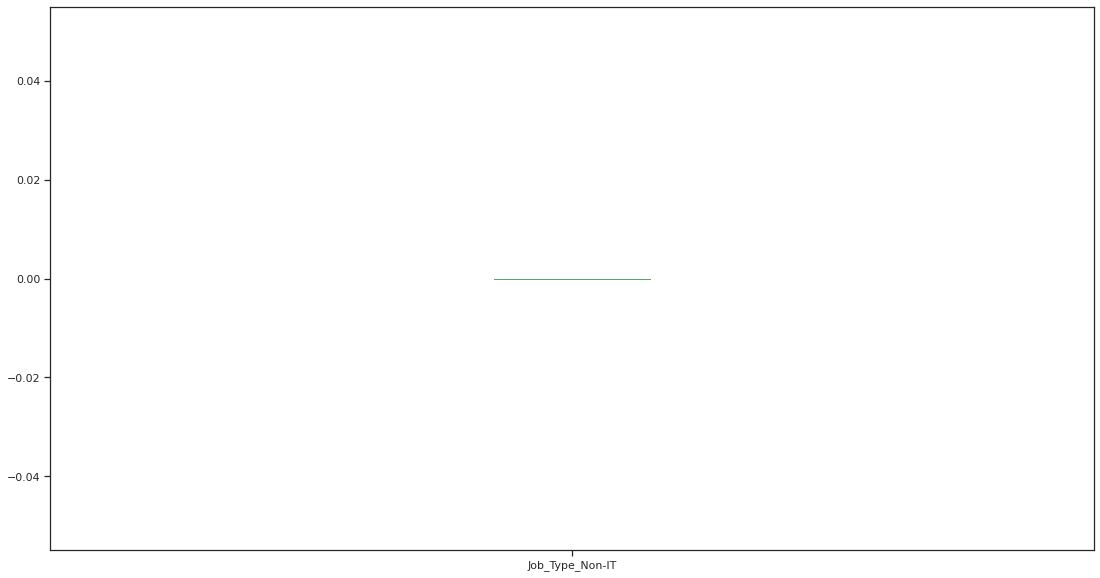

column is Marital_Stat_Divorce


<Figure size 432x288 with 0 Axes>

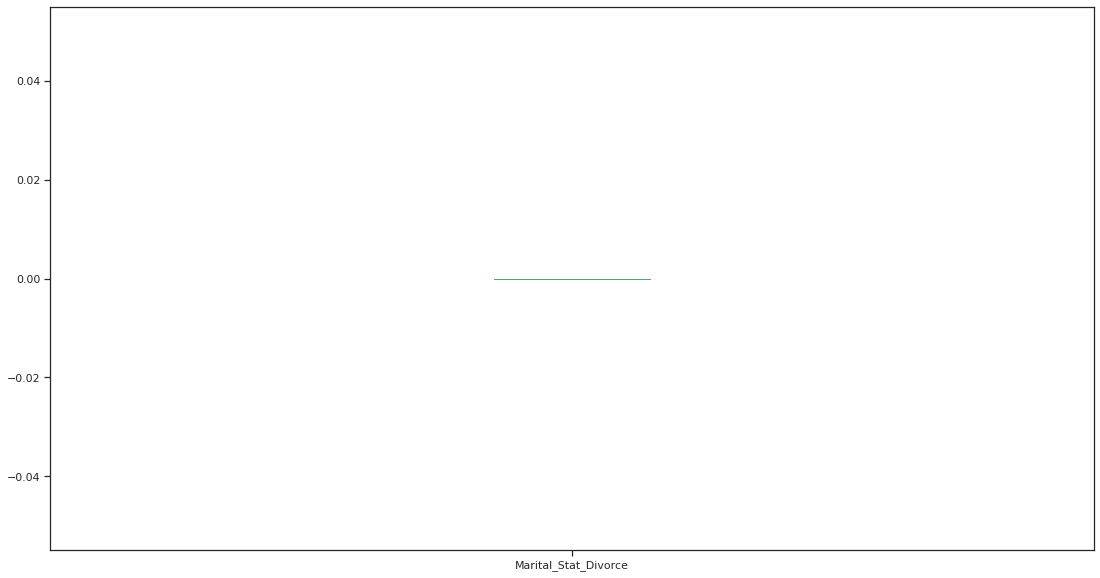

column is Marital_Stat_Married


<Figure size 432x288 with 0 Axes>

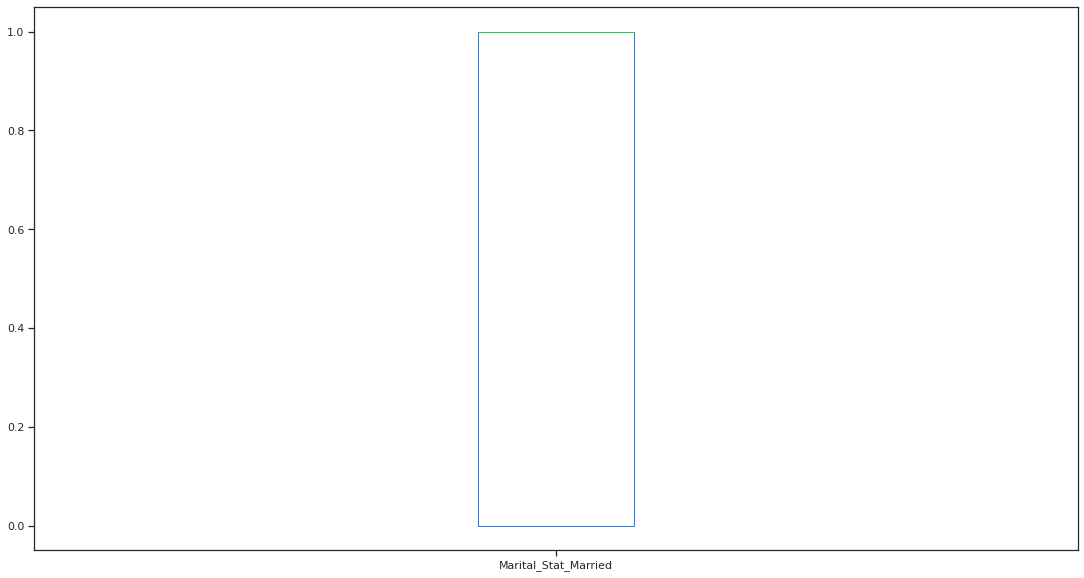

column is Marital_Stat_Single


<Figure size 432x288 with 0 Axes>

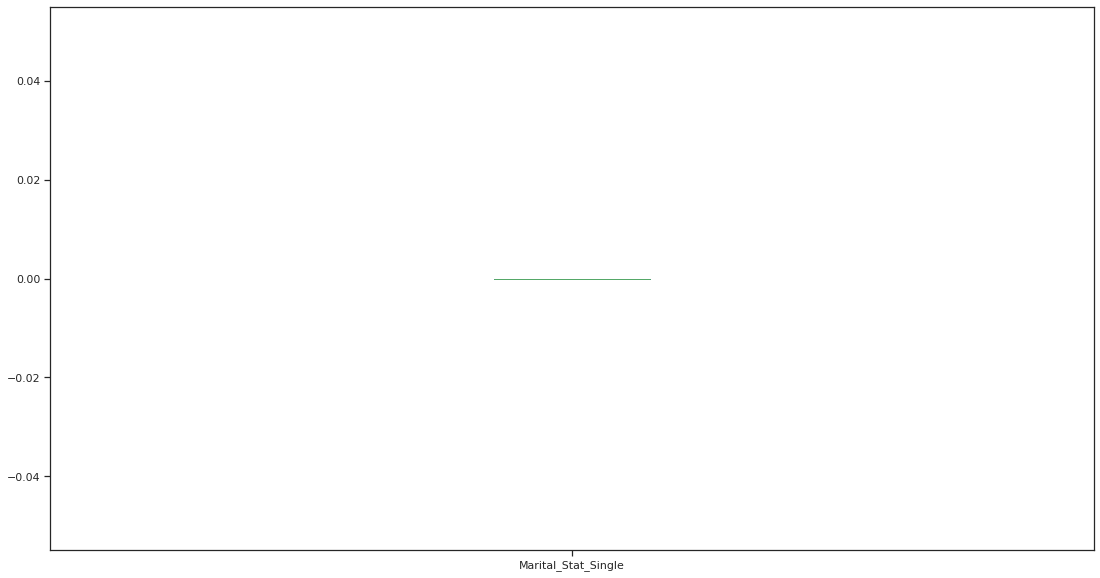

column is Marital_Stat_Widow


<Figure size 432x288 with 0 Axes>

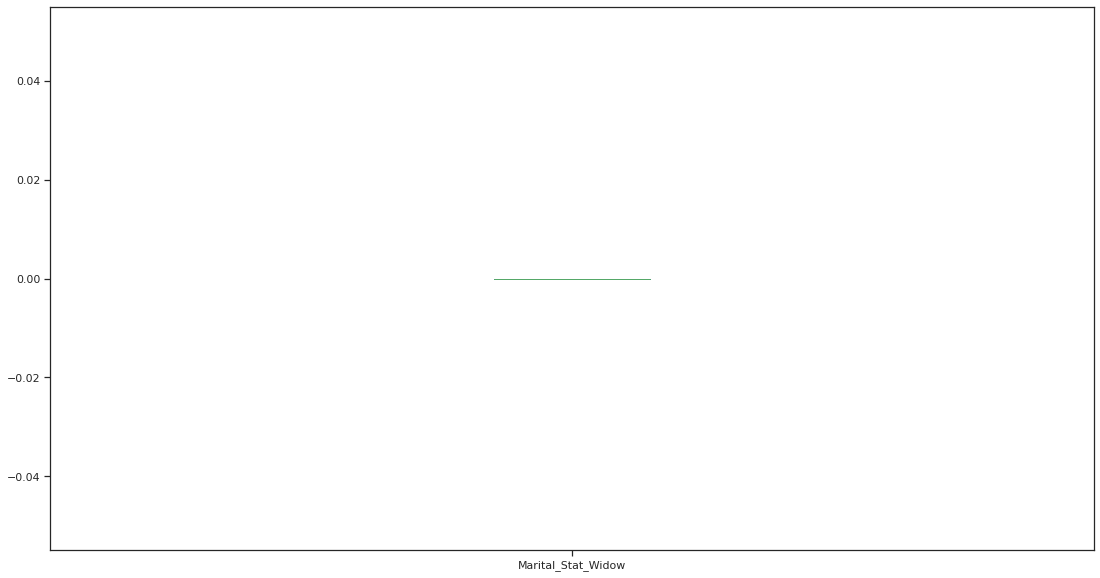

column is Gen_F


<Figure size 432x288 with 0 Axes>

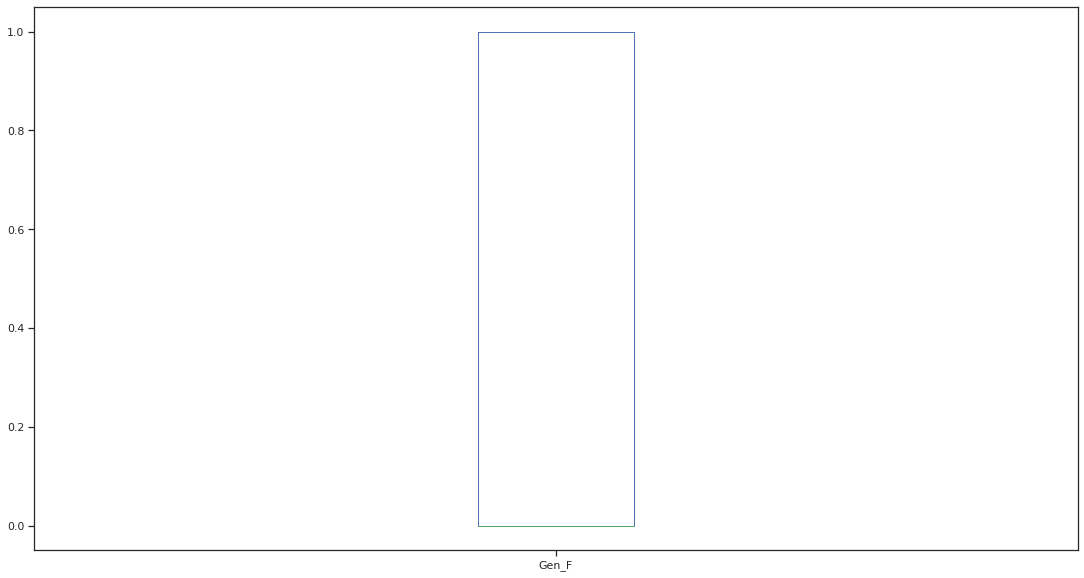

column is Gen_M


<Figure size 432x288 with 0 Axes>

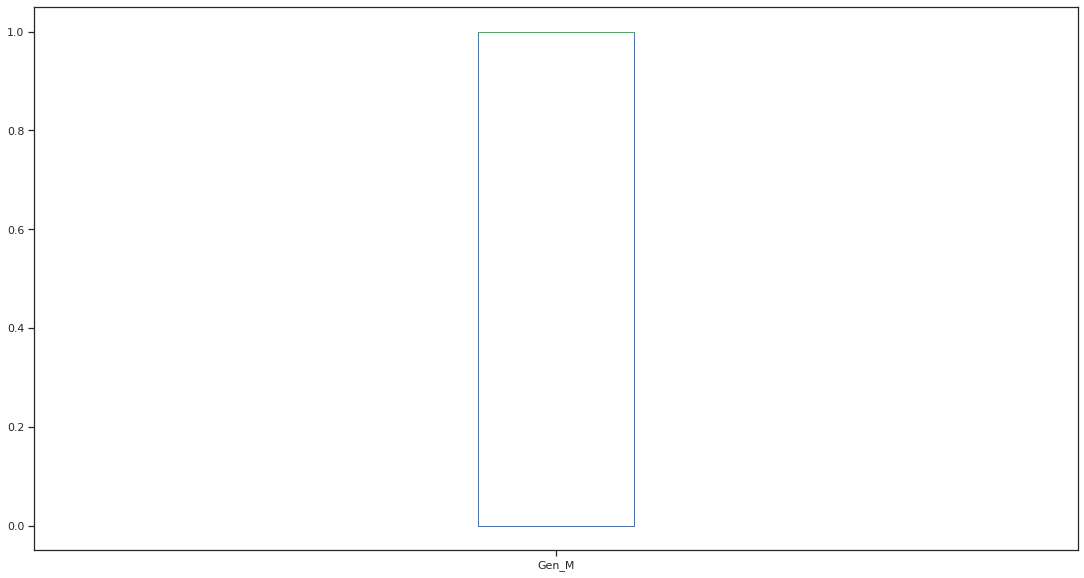

column is Region_Central


<Figure size 432x288 with 0 Axes>

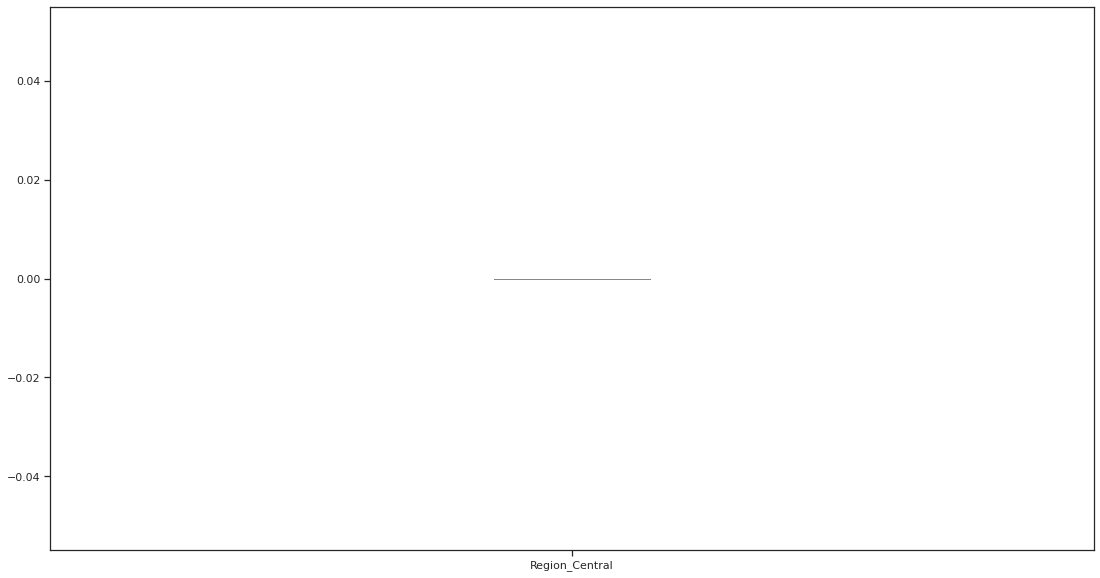

column is Region_East


<Figure size 432x288 with 0 Axes>

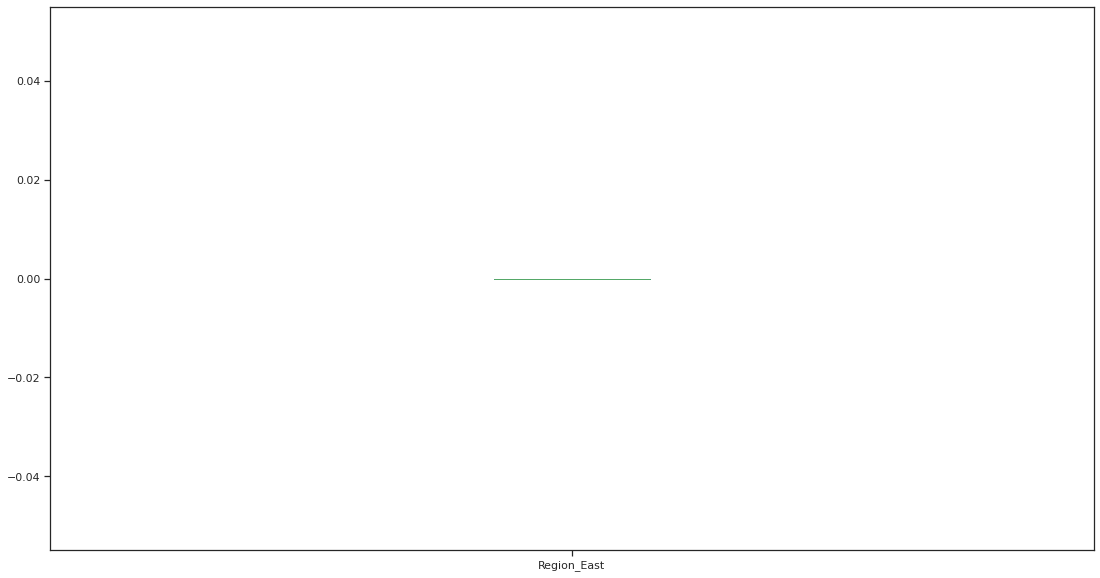

column is Region_North


<Figure size 432x288 with 0 Axes>

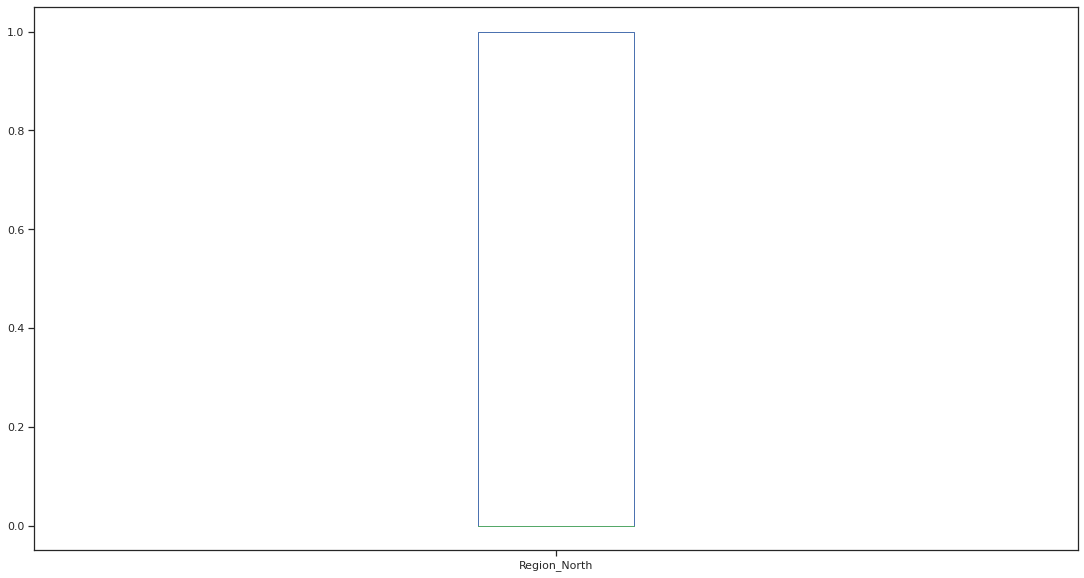

column is Region_South


<Figure size 432x288 with 0 Axes>

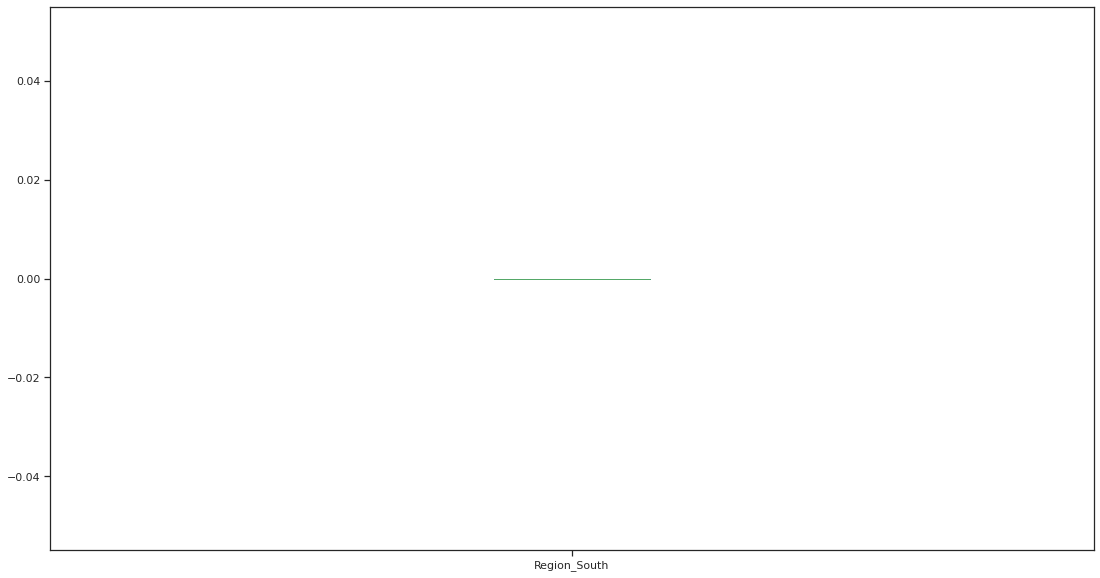

column is Region_Type_Metro


<Figure size 432x288 with 0 Axes>

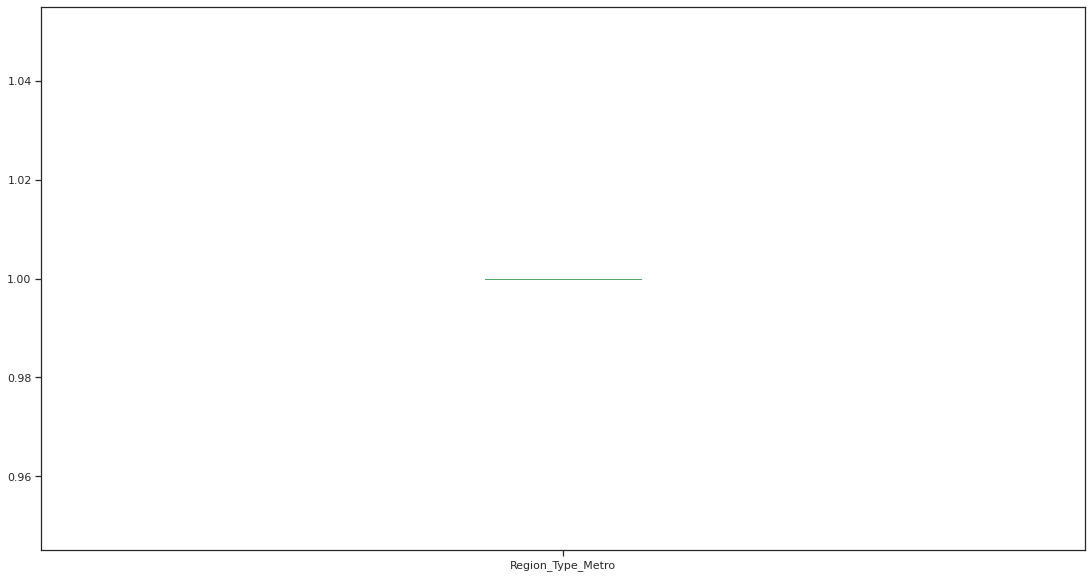

column is Region_Type_Rural


<Figure size 432x288 with 0 Axes>

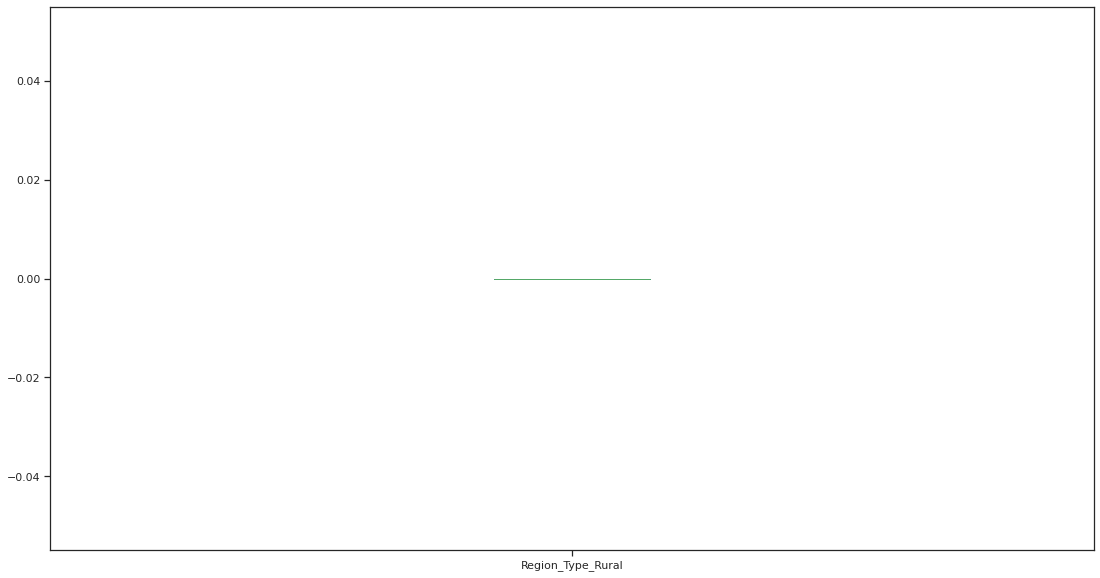

column is Region_Type_other


<Figure size 432x288 with 0 Axes>

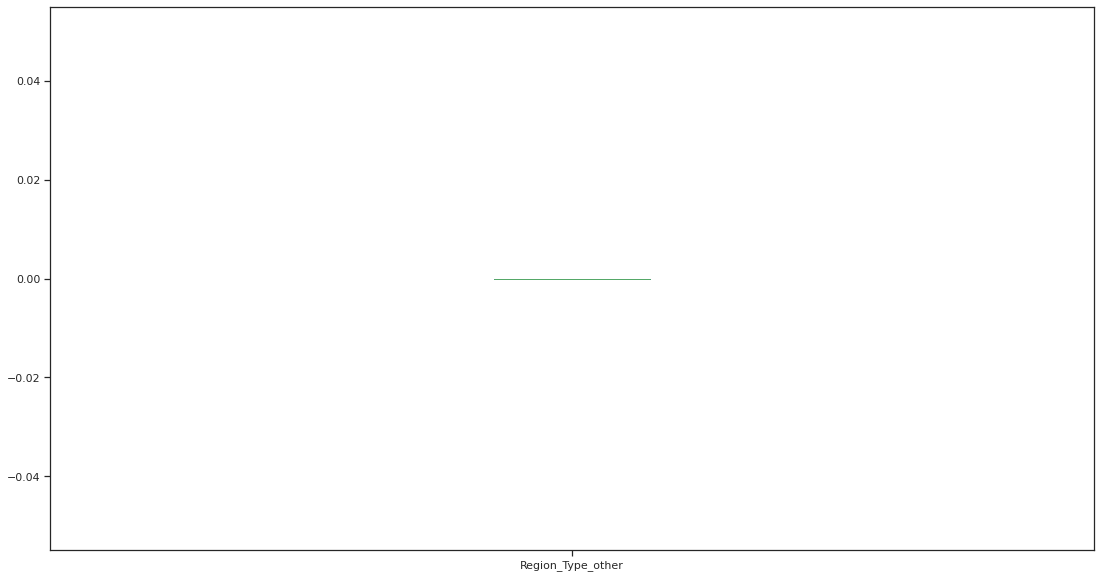

column is Type_Loan_CLoan


<Figure size 432x288 with 0 Axes>

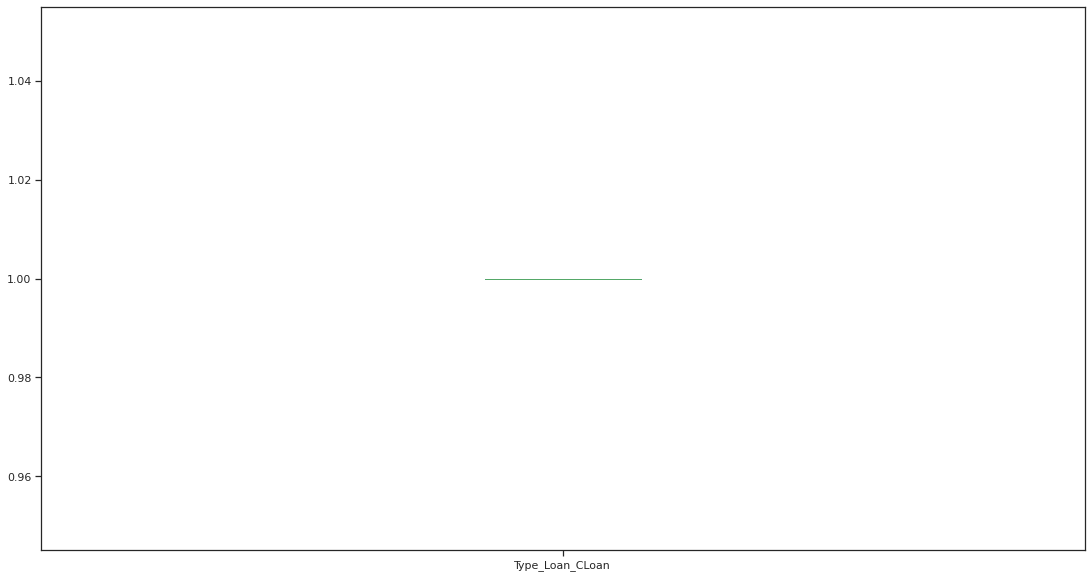

column is Type_Loan_RLoan


<Figure size 432x288 with 0 Axes>

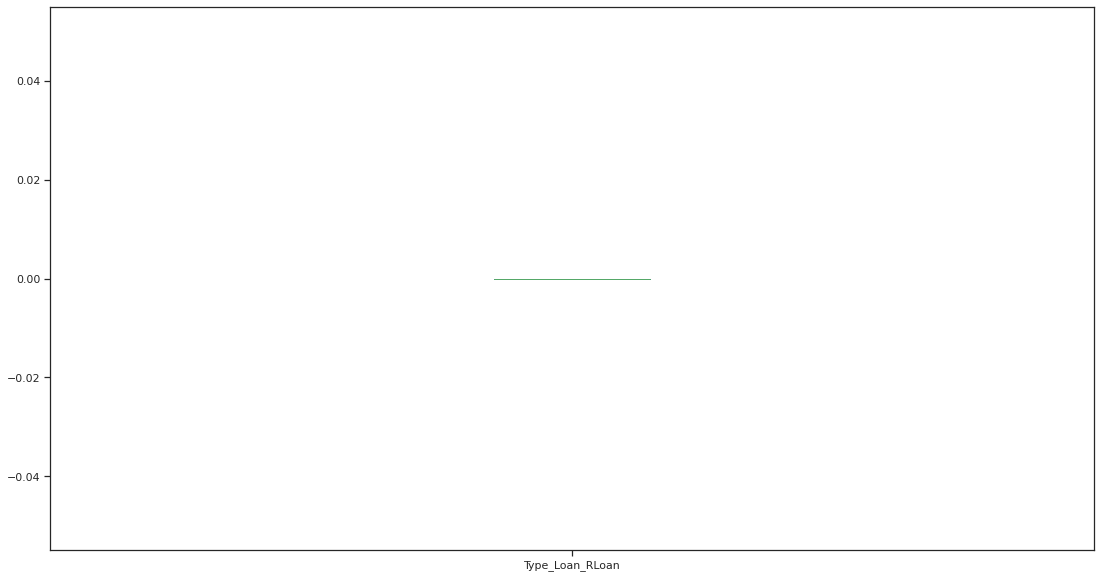

In [232]:
chk_box(new_train_imputed)   #.......... After removing most of the outliers

column is ID


<Figure size 432x288 with 0 Axes>

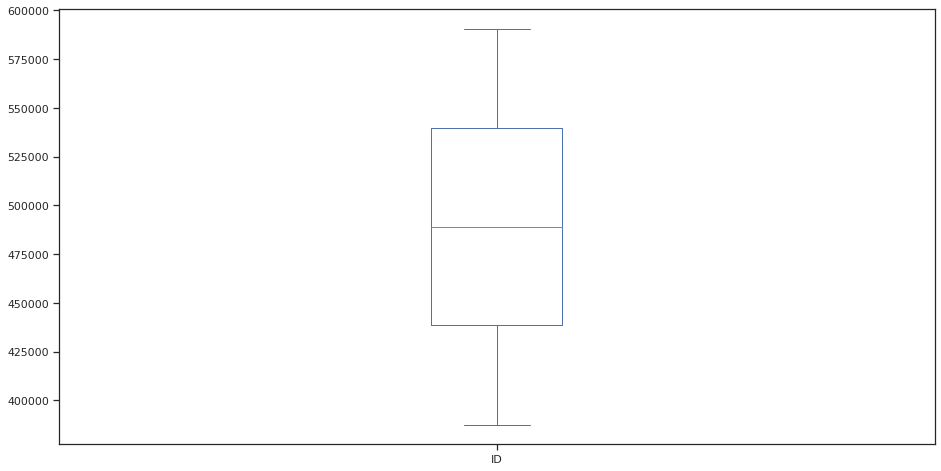

column is Compensation


<Figure size 432x288 with 0 Axes>

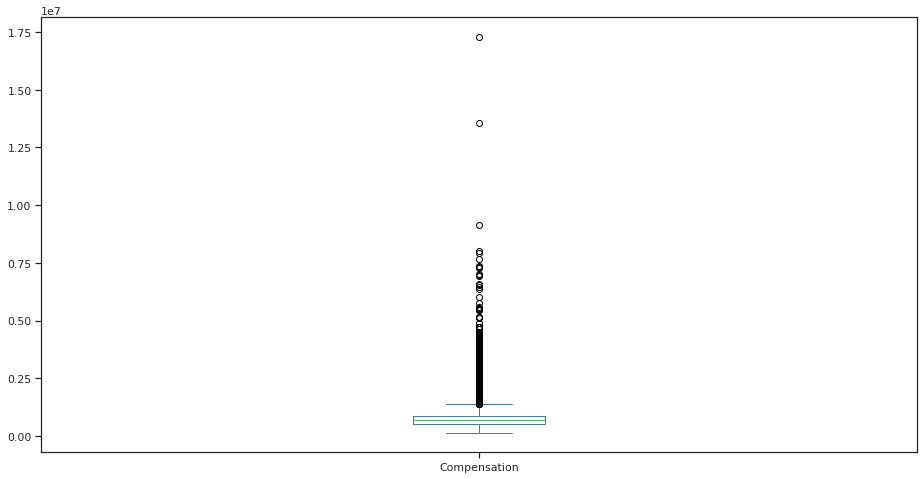

column is Vehicle_Status


<Figure size 432x288 with 0 Axes>

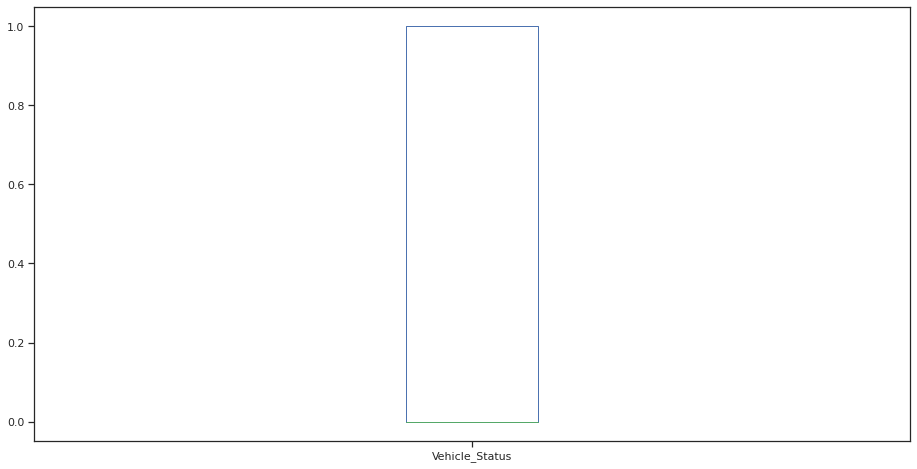

column is Loan_amt


<Figure size 432x288 with 0 Axes>

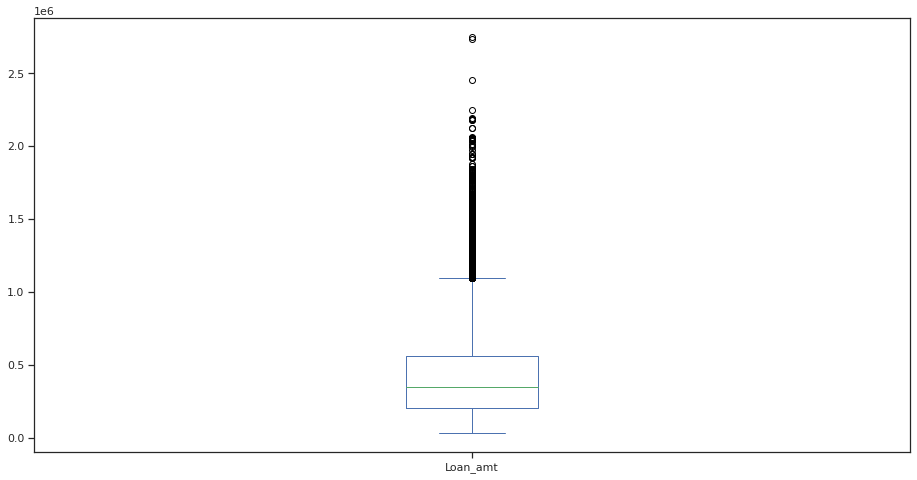

column is Annuity_amt


<Figure size 432x288 with 0 Axes>

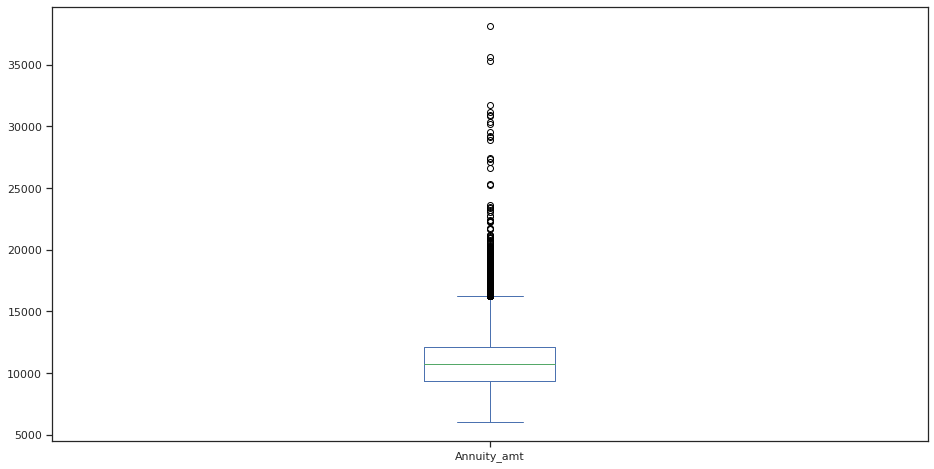

column is density_Ind


<Figure size 432x288 with 0 Axes>

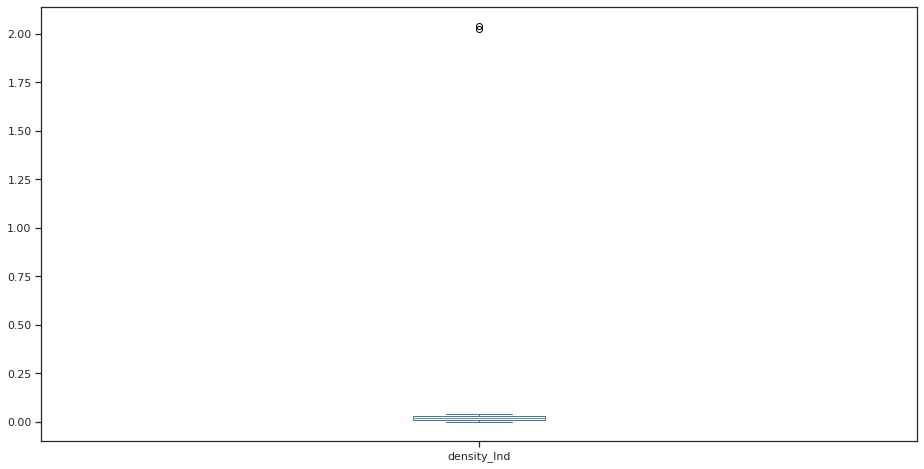

column is Default_hist


<Figure size 432x288 with 0 Axes>

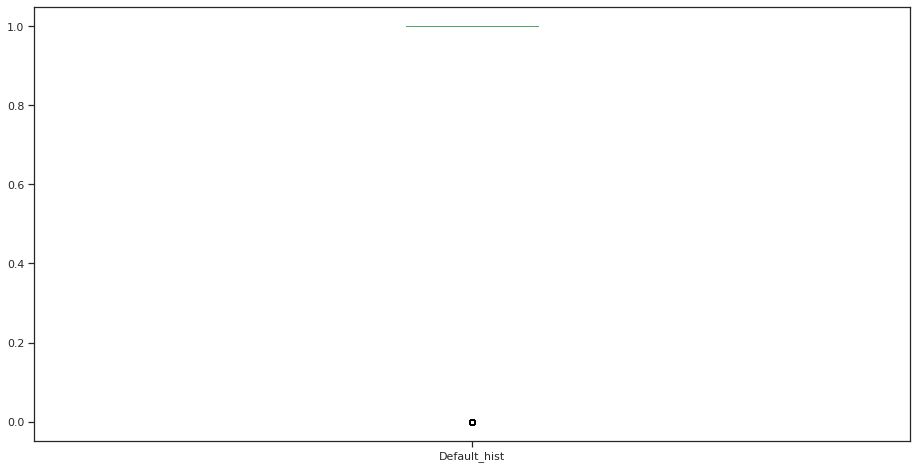

column is Prop_List


<Figure size 432x288 with 0 Axes>

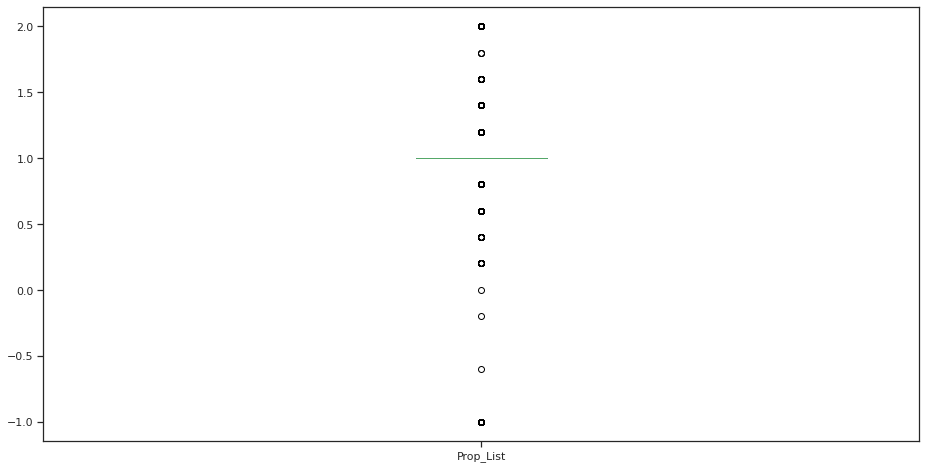

column is Home_Appliances


<Figure size 432x288 with 0 Axes>

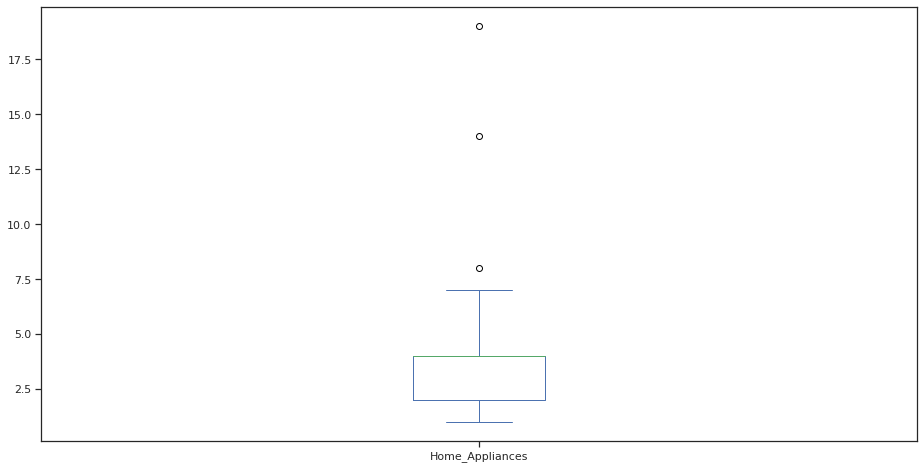

column is Credit_Inq


<Figure size 432x288 with 0 Axes>

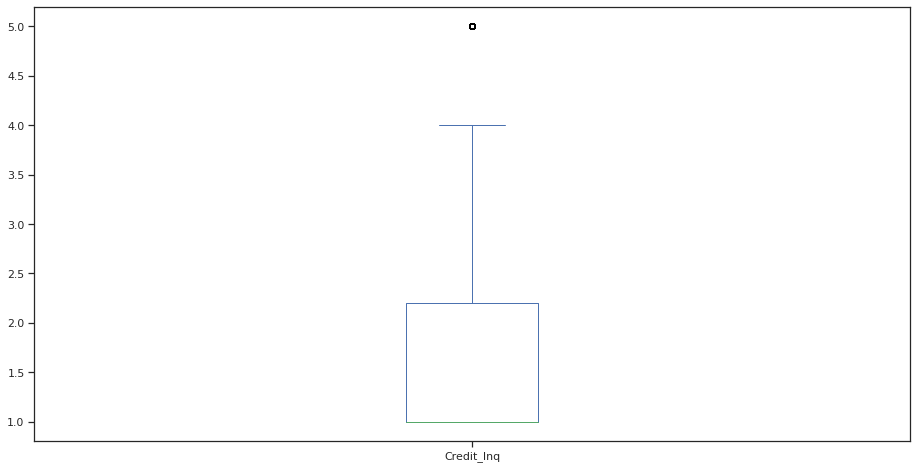

column is Education_det


<Figure size 432x288 with 0 Axes>

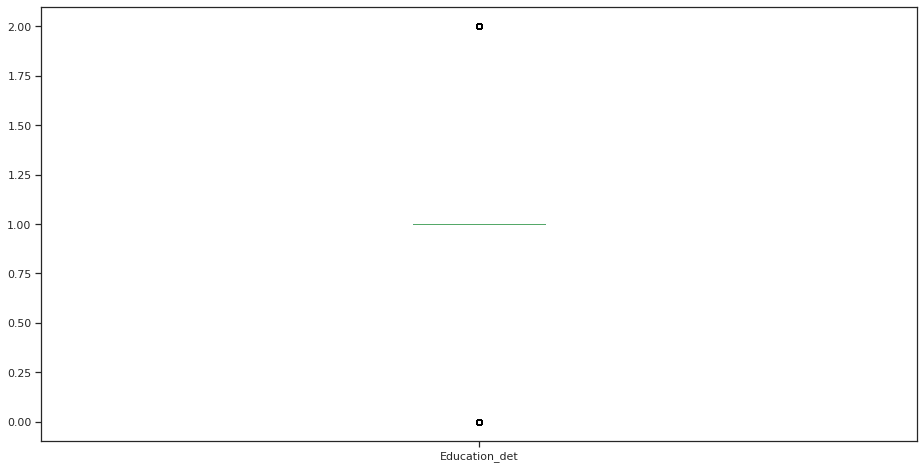

column is Credit_Lnks


<Figure size 432x288 with 0 Axes>

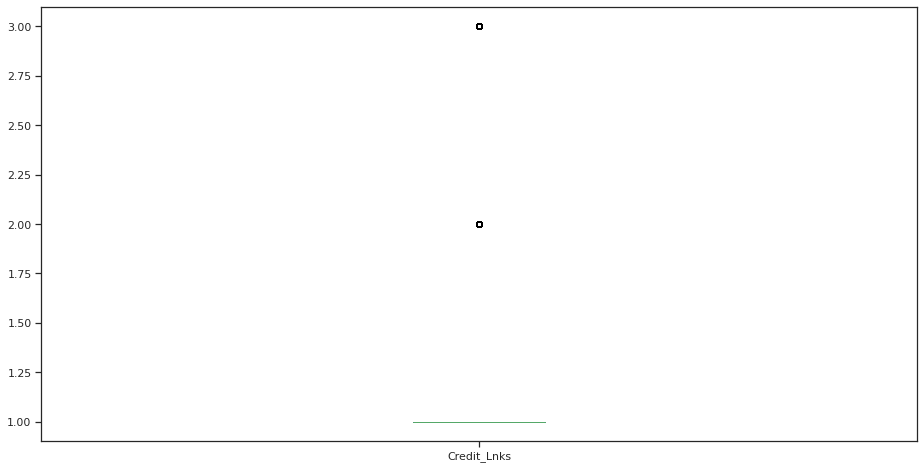

column is Experience


<Figure size 432x288 with 0 Axes>

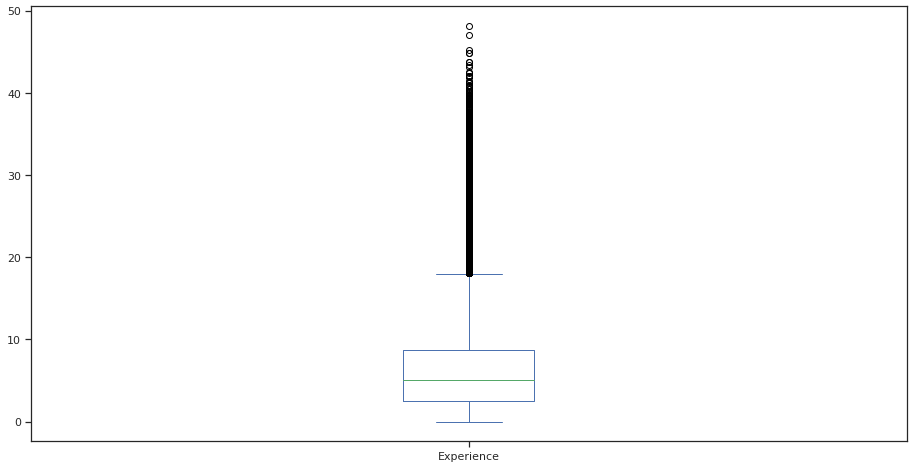

column is Income_Alt


<Figure size 432x288 with 0 Axes>

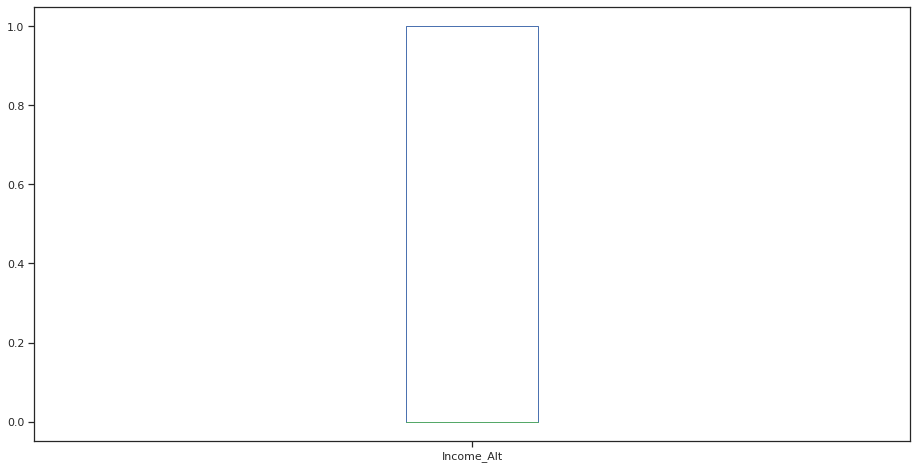

column is Day_Process


<Figure size 432x288 with 0 Axes>

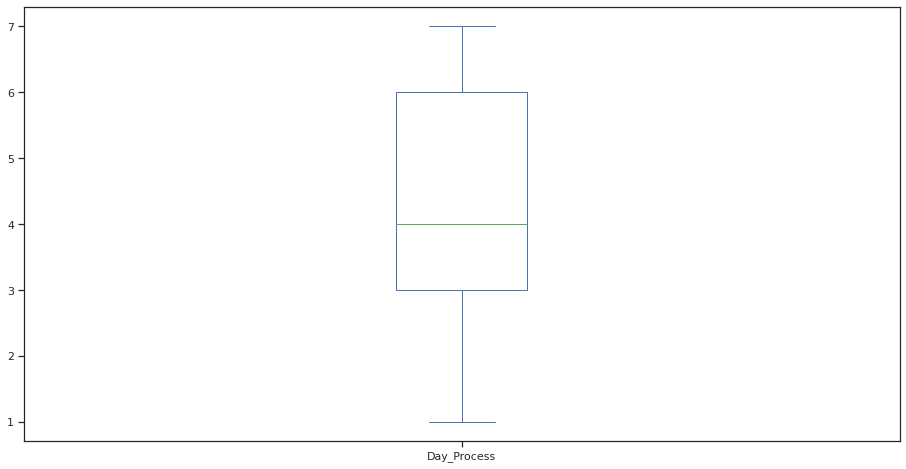

column is Ph.No


<Figure size 432x288 with 0 Axes>

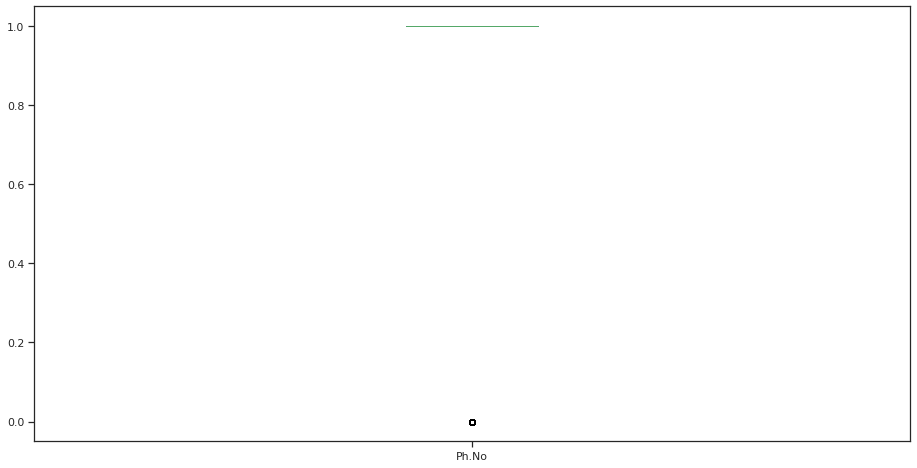

column is Dependents


<Figure size 432x288 with 0 Axes>

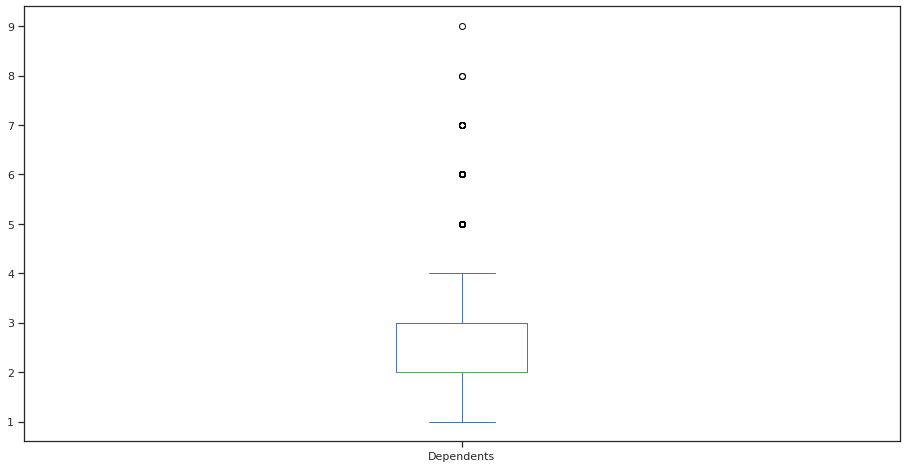

column is Company_Rating


<Figure size 432x288 with 0 Axes>

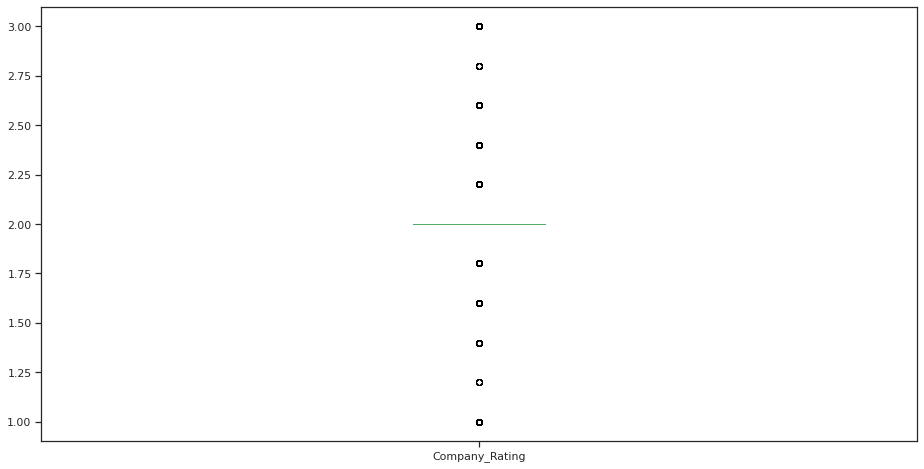

column is Age


<Figure size 432x288 with 0 Axes>

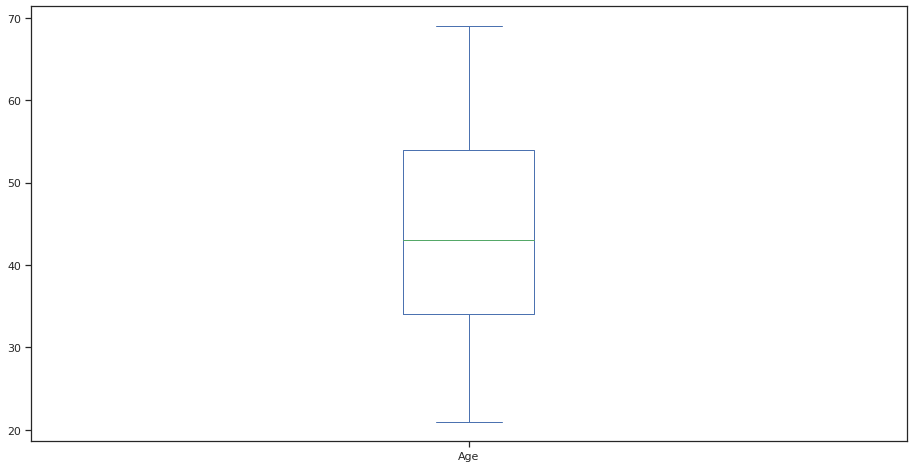

column is hour_Process


<Figure size 432x288 with 0 Axes>

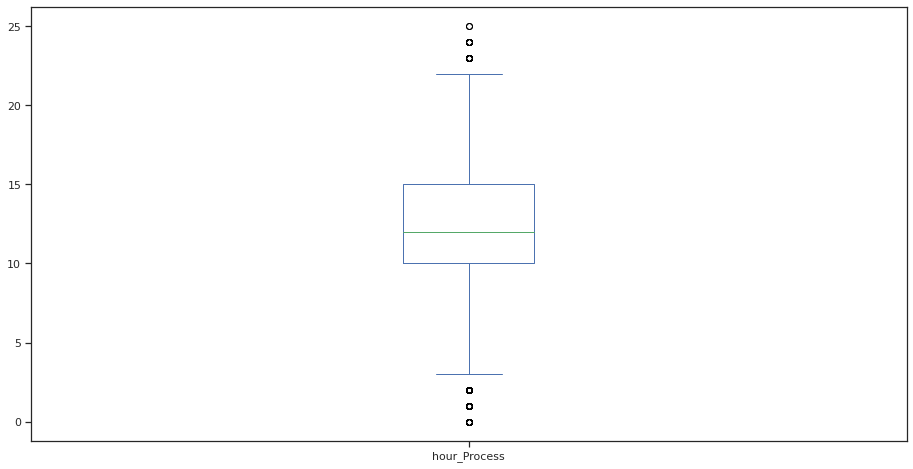

column is Addr_permanent


<Figure size 432x288 with 0 Axes>

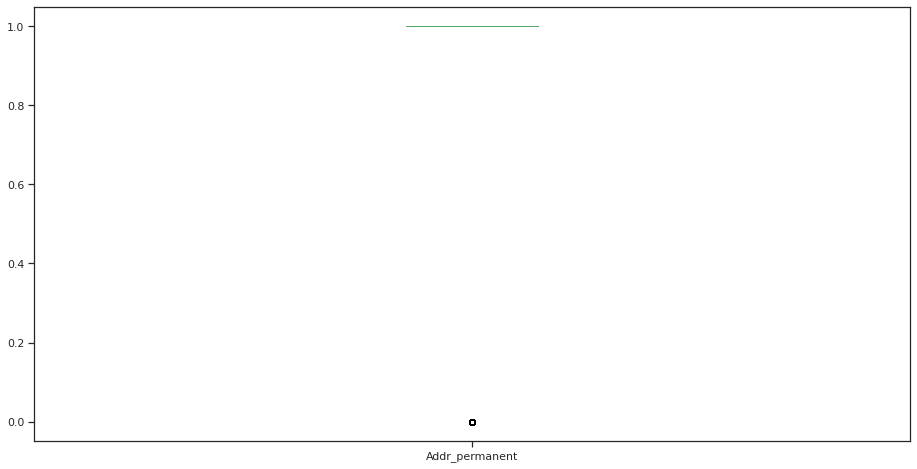

column is Permanent_Addr_tag


<Figure size 432x288 with 0 Axes>

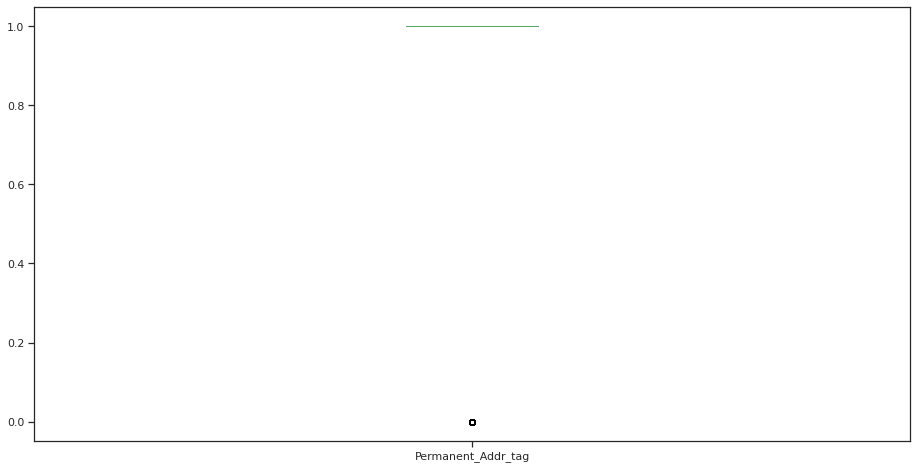

column is c1_rated


<Figure size 432x288 with 0 Axes>

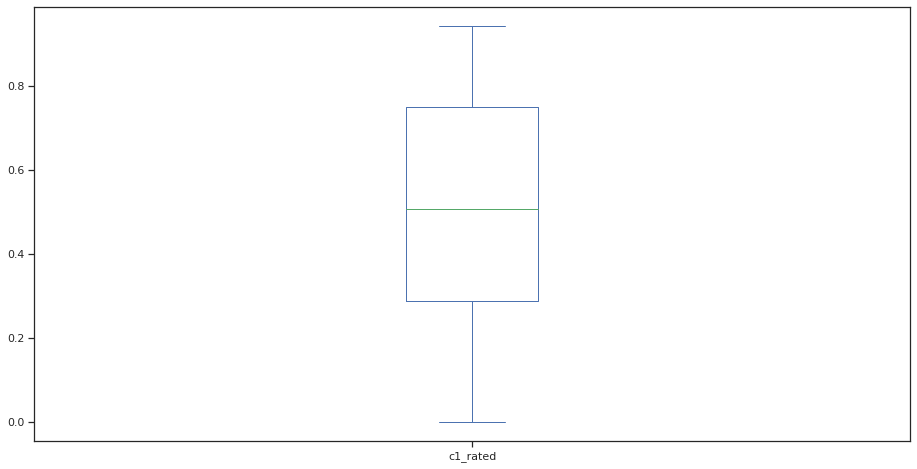

column is c2_rated


<Figure size 432x288 with 0 Axes>

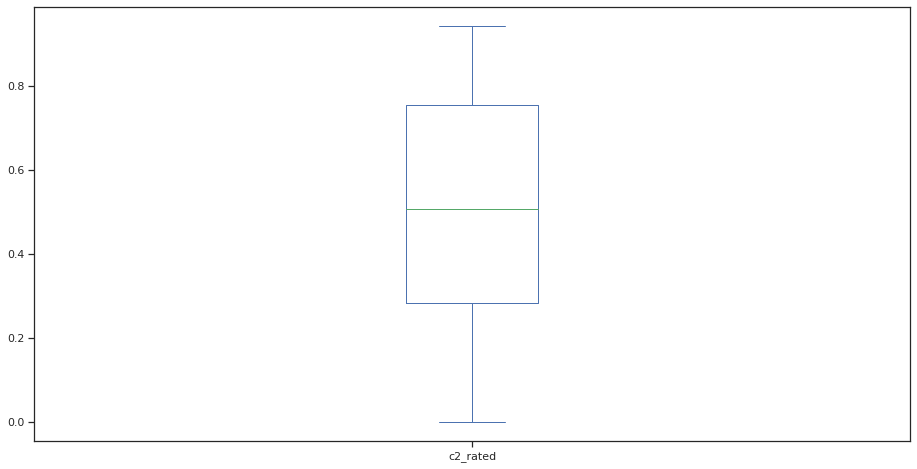

column is Contact_age


<Figure size 432x288 with 0 Axes>

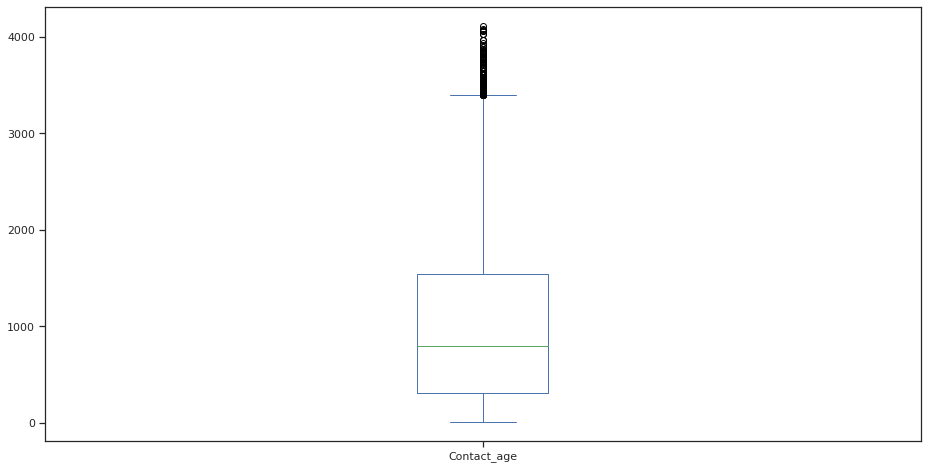

column is Product_bought


<Figure size 432x288 with 0 Axes>

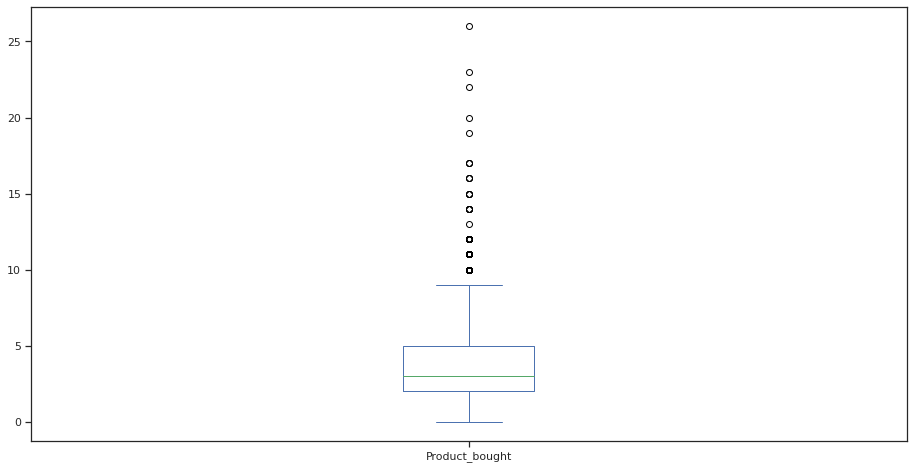

column is Job_Type_Govt.


<Figure size 432x288 with 0 Axes>

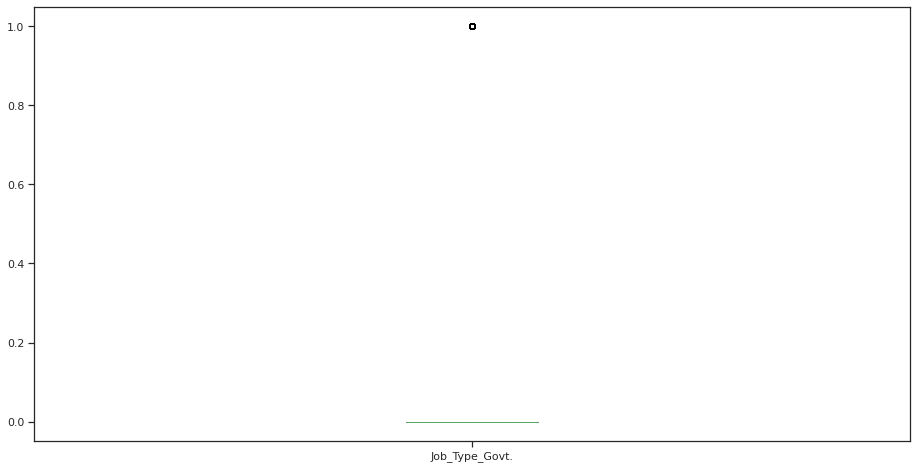

column is Job_Type_IT


<Figure size 432x288 with 0 Axes>

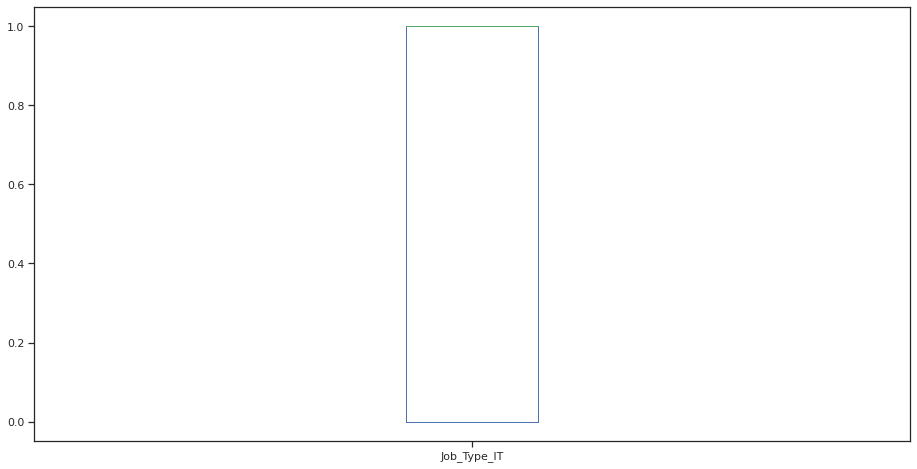

column is Job_Type_Non-IT


<Figure size 432x288 with 0 Axes>

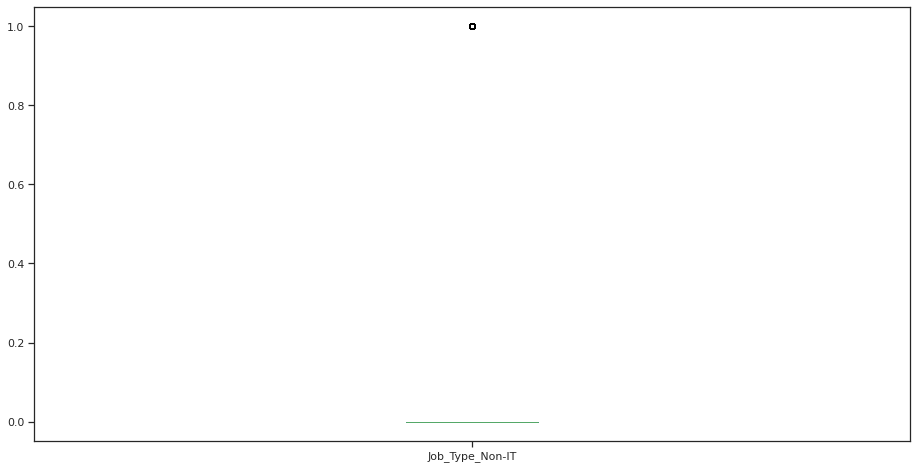

column is Marital_Stat_Divorce


<Figure size 432x288 with 0 Axes>

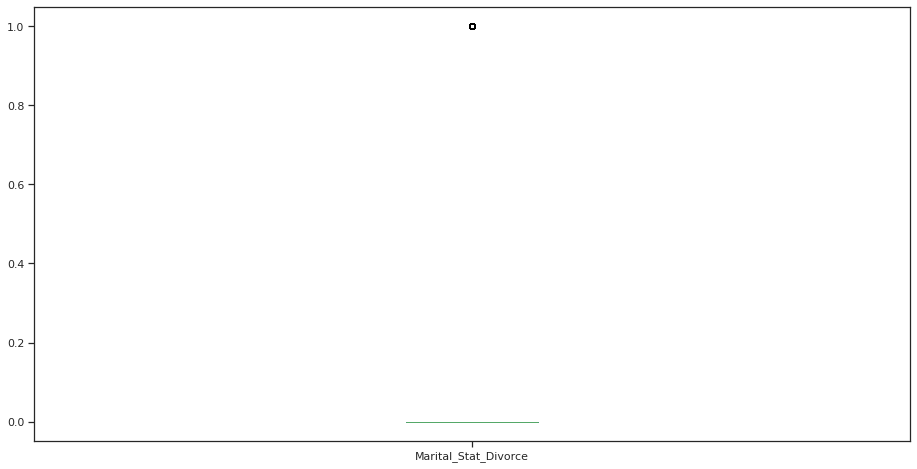

column is Marital_Stat_Married


<Figure size 432x288 with 0 Axes>

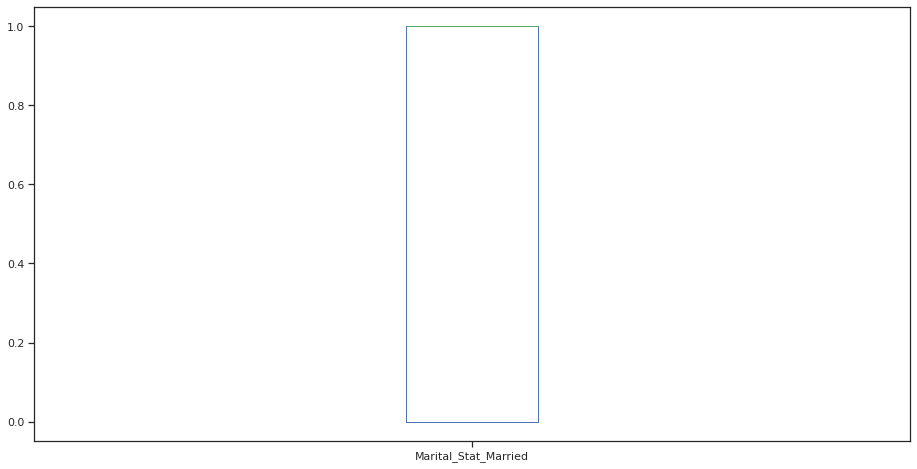

column is Marital_Stat_Single


<Figure size 432x288 with 0 Axes>

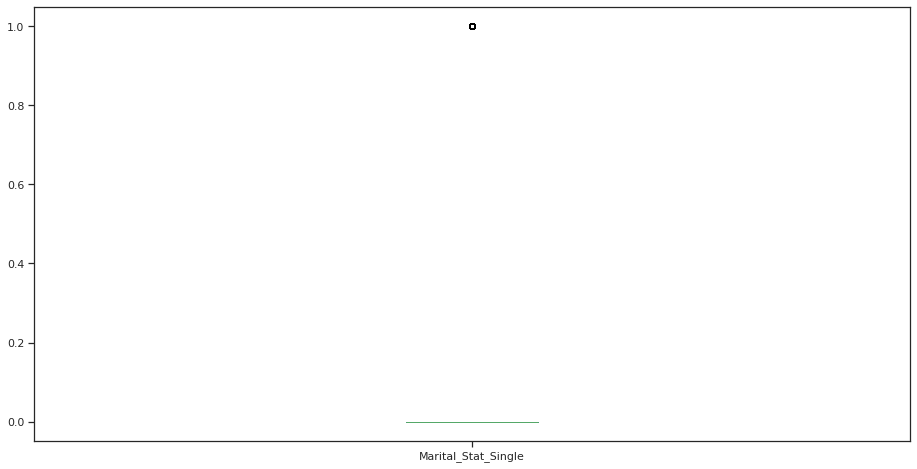

column is Marital_Stat_Widow


<Figure size 432x288 with 0 Axes>

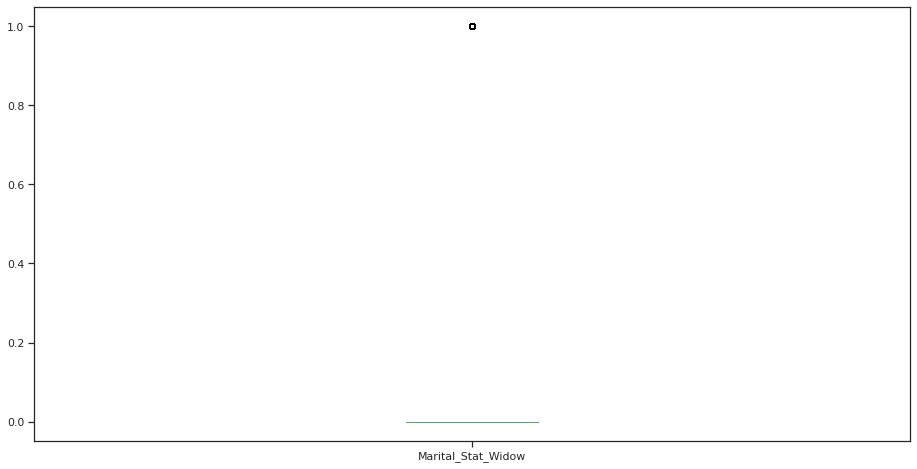

column is Gen_F


<Figure size 432x288 with 0 Axes>

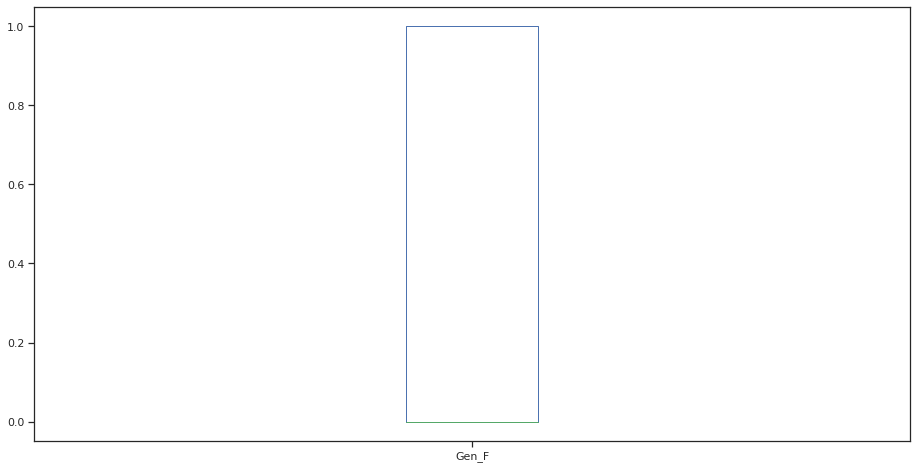

column is Gen_M


<Figure size 432x288 with 0 Axes>

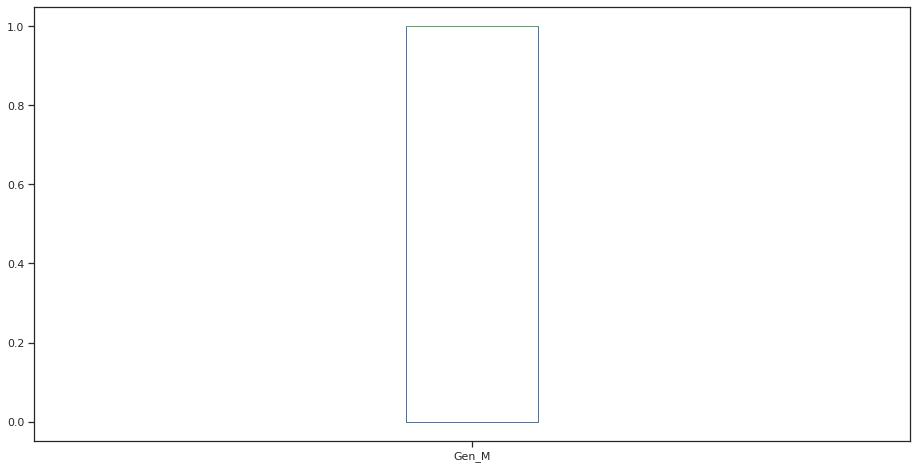

column is Region_Central


<Figure size 432x288 with 0 Axes>

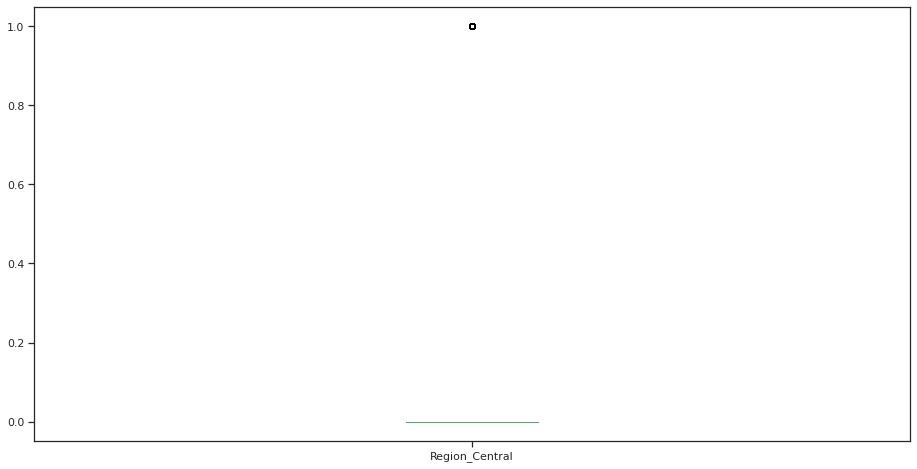

column is Region_East


<Figure size 432x288 with 0 Axes>

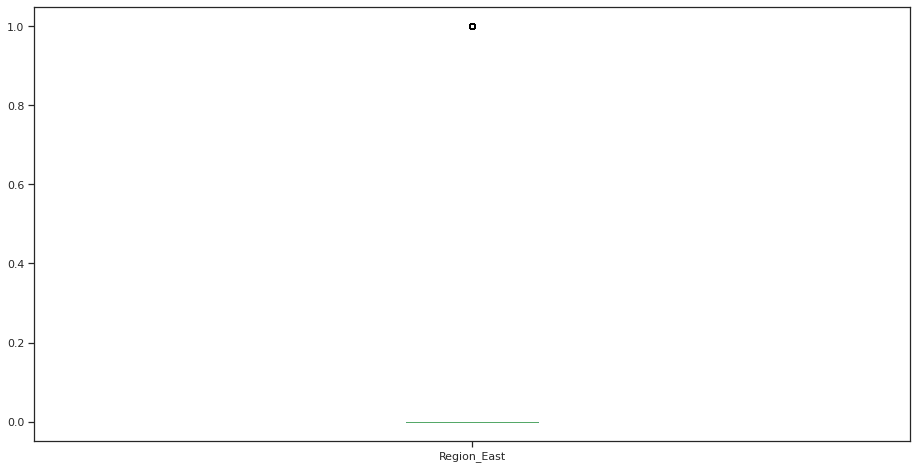

column is Region_North


<Figure size 432x288 with 0 Axes>

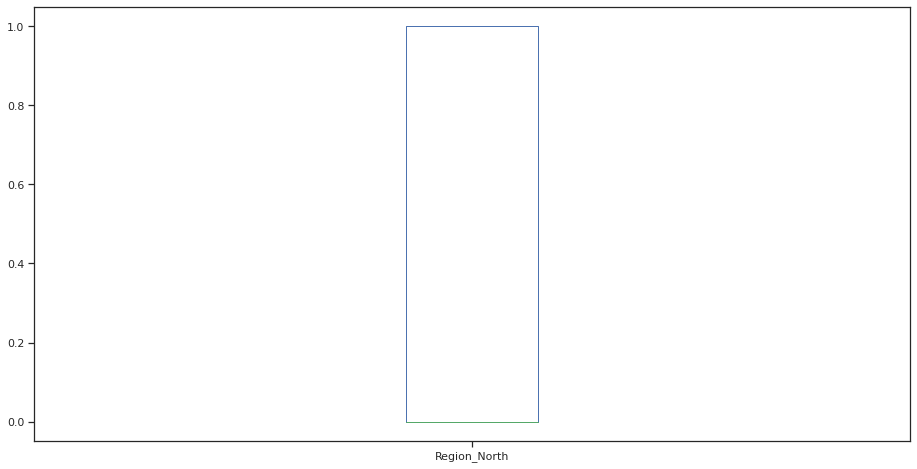

column is Region_South


<Figure size 432x288 with 0 Axes>

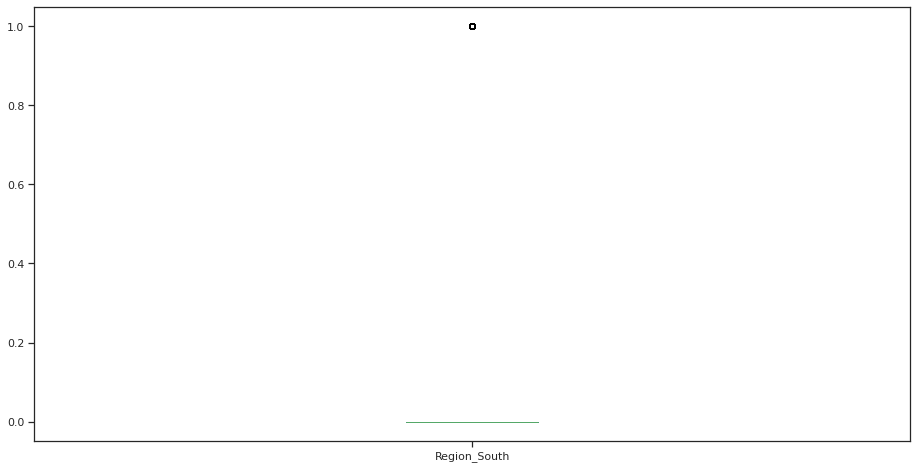

column is Region_Type_Metro


<Figure size 432x288 with 0 Axes>

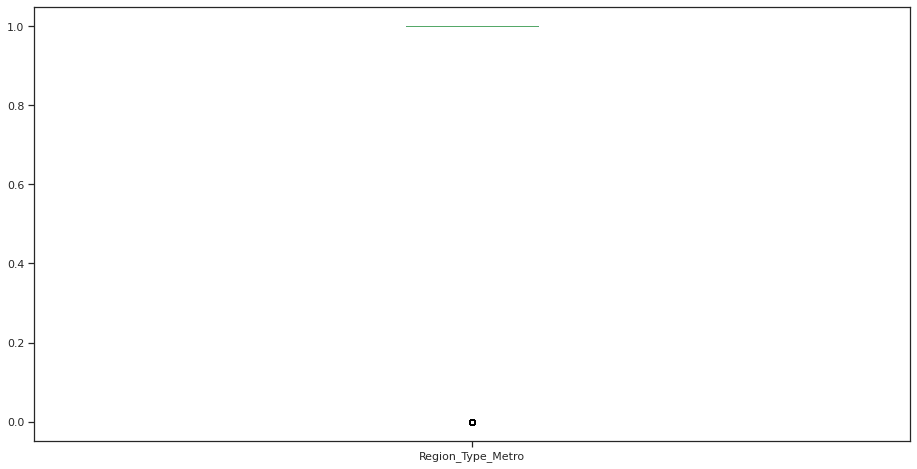

column is Region_Type_Rural


<Figure size 432x288 with 0 Axes>

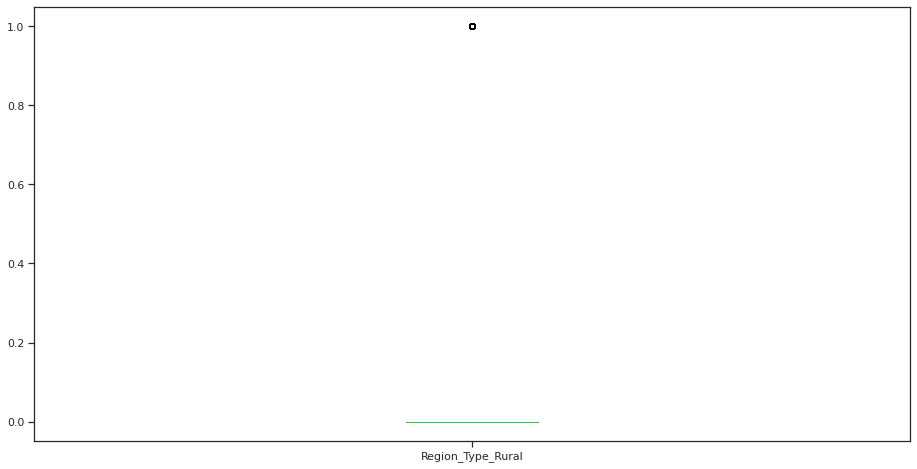

column is Region_Type_other


<Figure size 432x288 with 0 Axes>

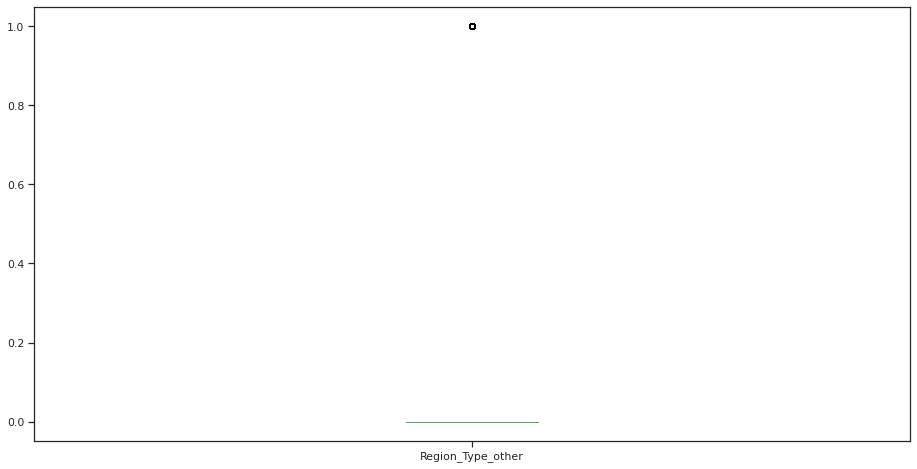

column is Type_Loan_CLoan


<Figure size 432x288 with 0 Axes>

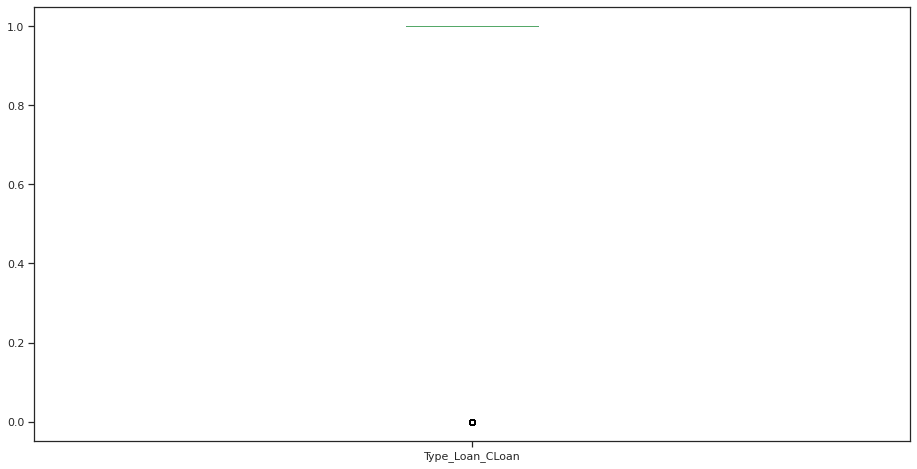

column is Type_Loan_RLoan


<Figure size 432x288 with 0 Axes>

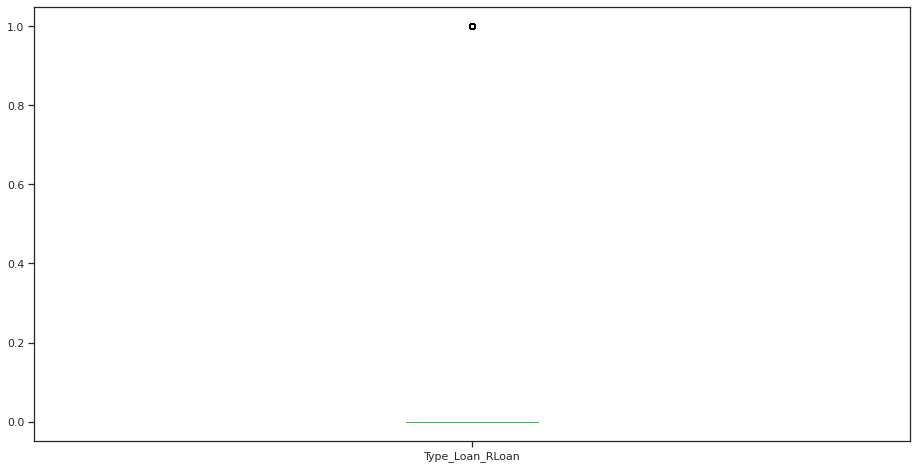

In [175]:
chk_box(new_test_imputed)

In [ ]:
for i in new_test_imputed.columns:
    Q1 = np.percentile(new_test_imputed[i], 25,interpolation = 'midpoint')
 
    Q3 = np.percentile(new_test_imputed[i], 75,interpolation = 'midpoint')
    
    IQR = Q3 - Q1
        
    upper = (Q3+1.5*IQR)
    lower = (Q1-1.5*IQR)
       
    curr_val = new_test_imputed[i]
    median = new_test_imputed[i].quantile(0.50)
                        
    print("column is",i)
    print("Median is",median) 
    print("Upper bound is",upper)
    print("Lower bound is",lower)
        
    new_test_imputed[i] = np.where(new_test_imputed[i] >= upper, median, curr_val)
    new_test_imputed[i] = np.where(new_test_imputed[i] <= lower, median, curr_val)

column is ID


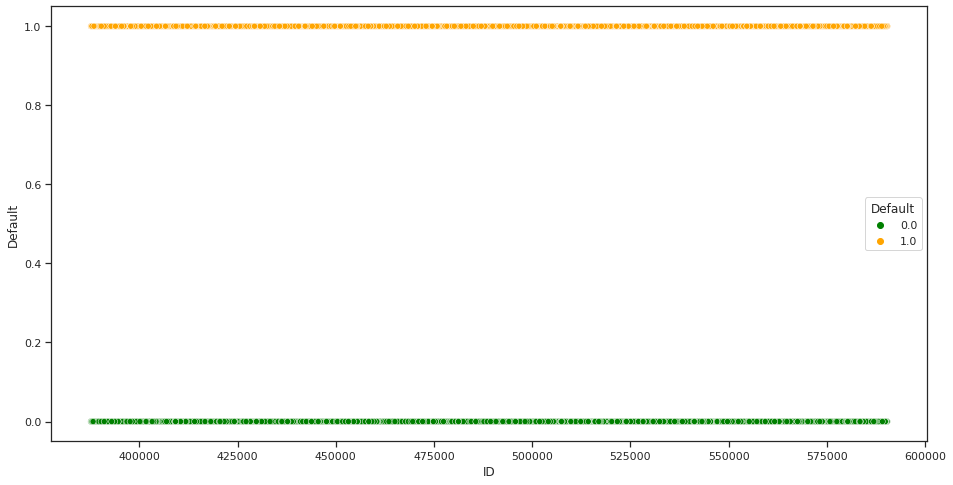

column is Compensation


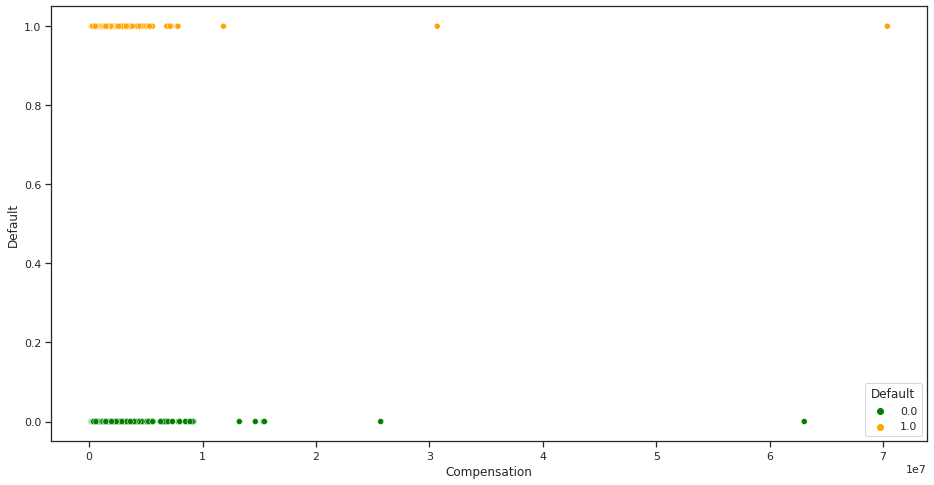

column is Vehicle_Status


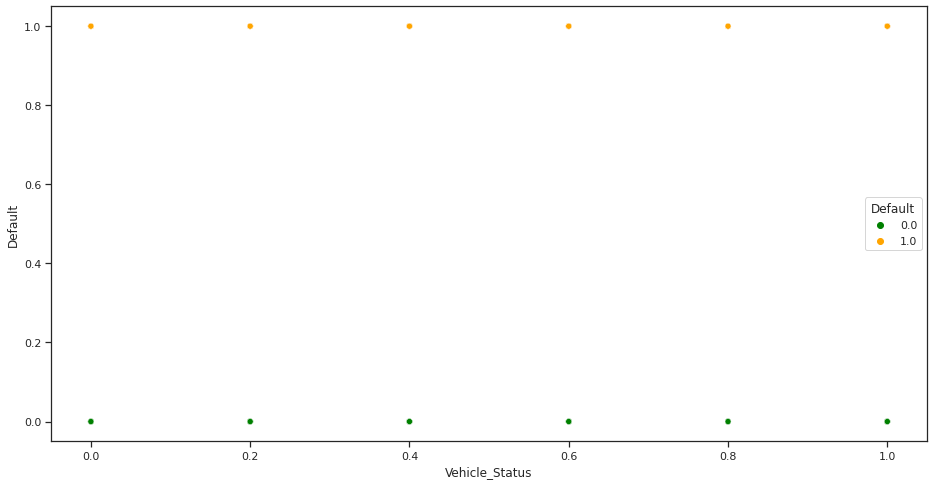

column is Loan_amt


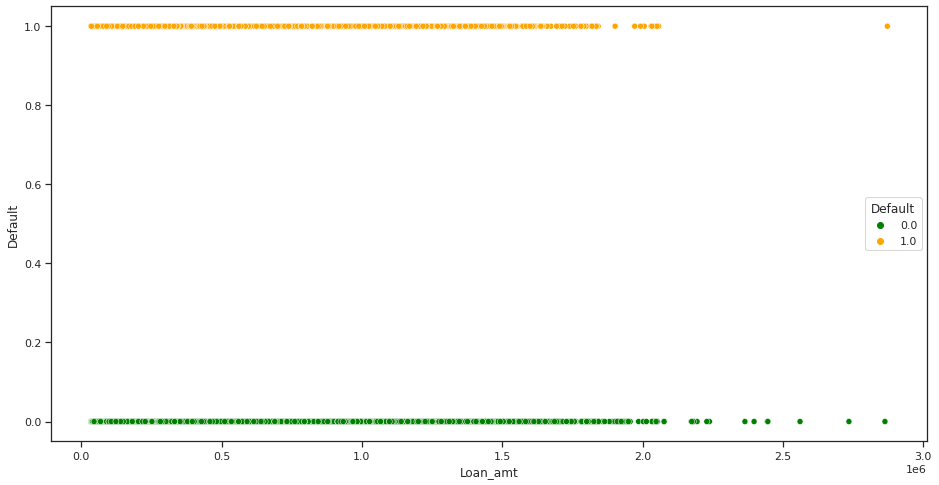

column is Annuity_amt


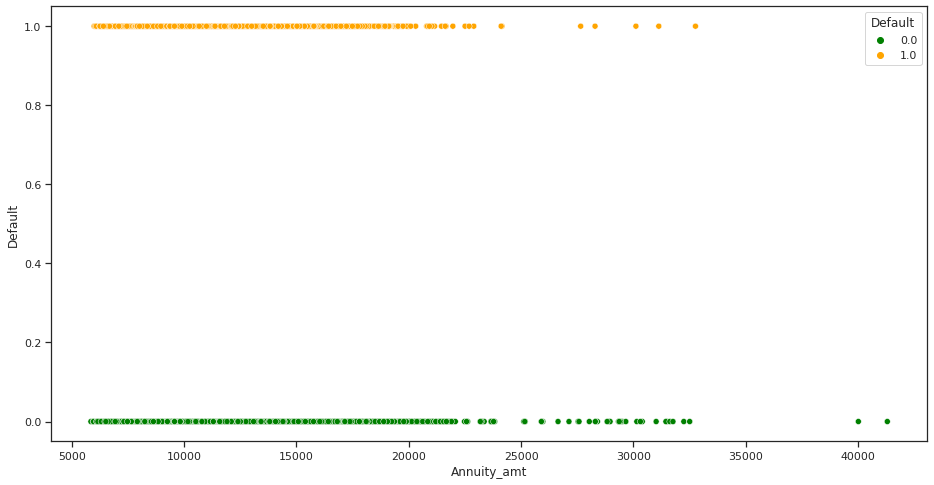

column is density_Ind


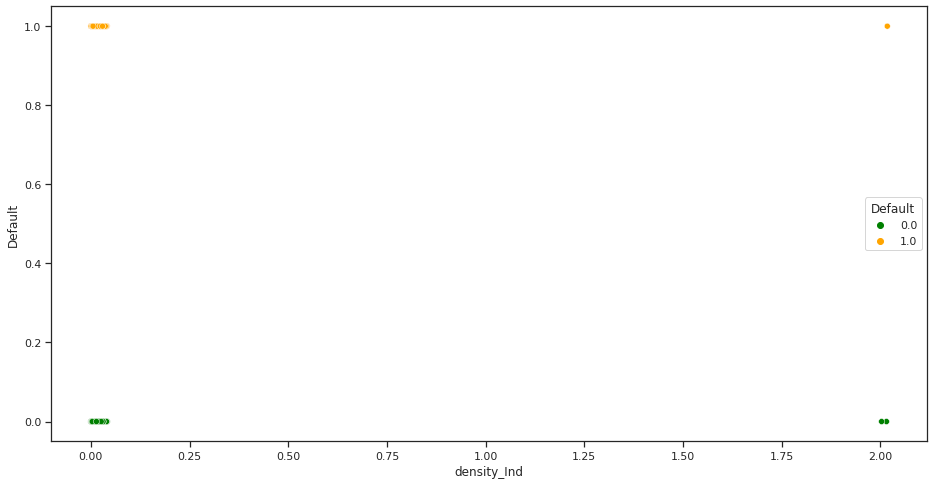

column is Default_hist


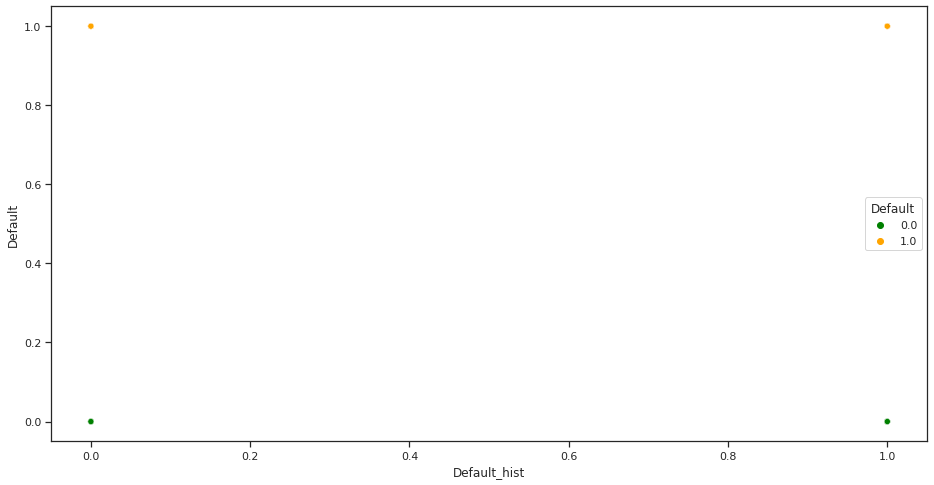

column is Prop_List


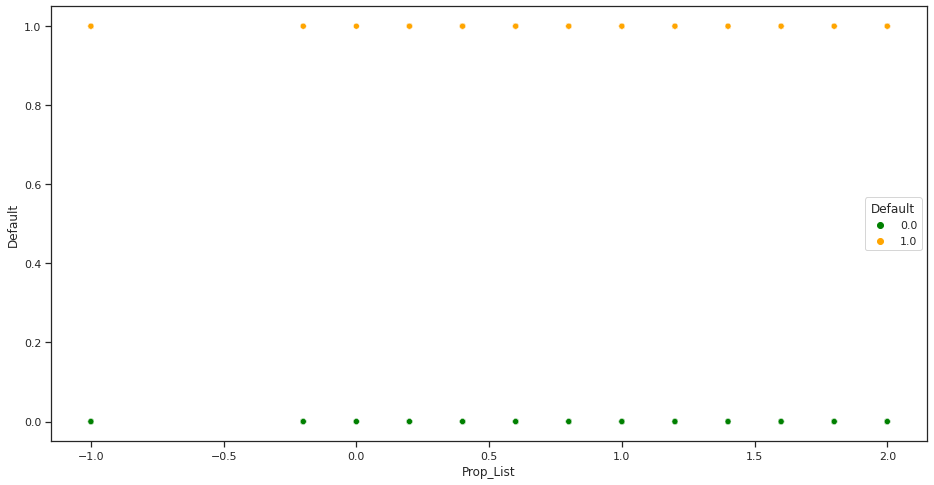

column is Home_Appliances


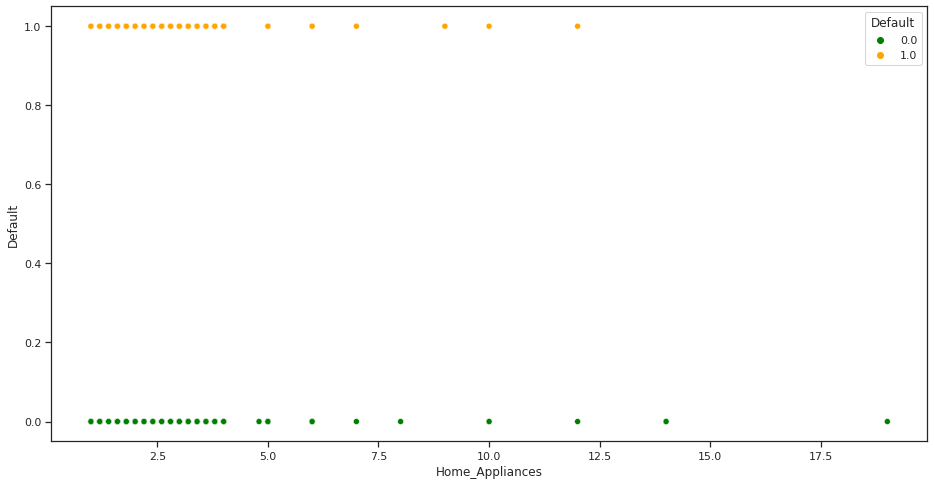

column is Credit_Inq


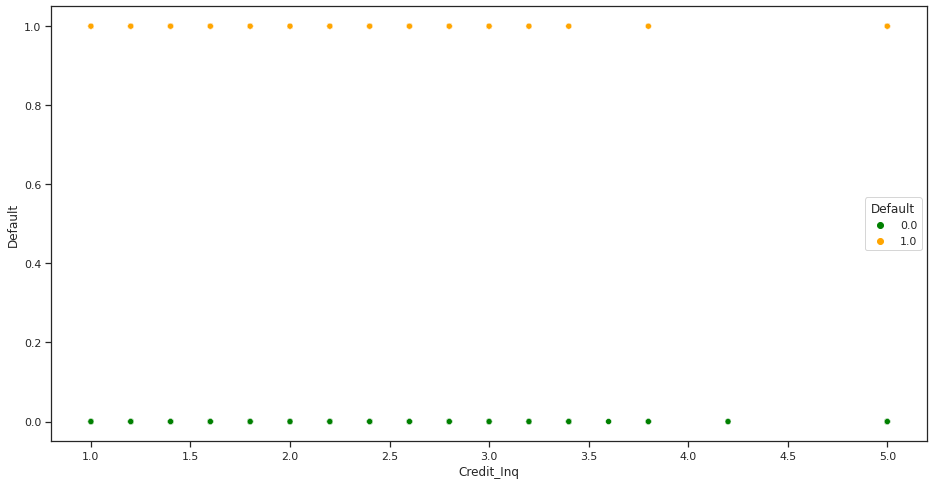

column is Education_det


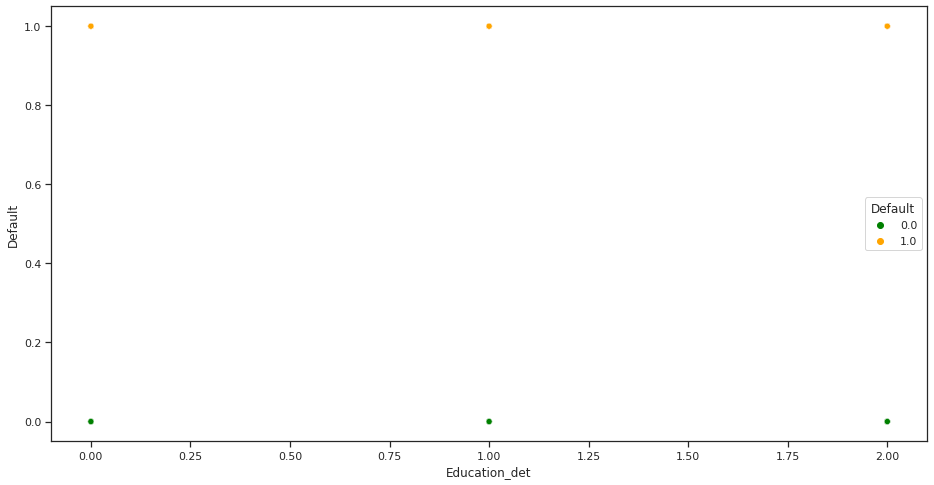

column is Credit_Lnks


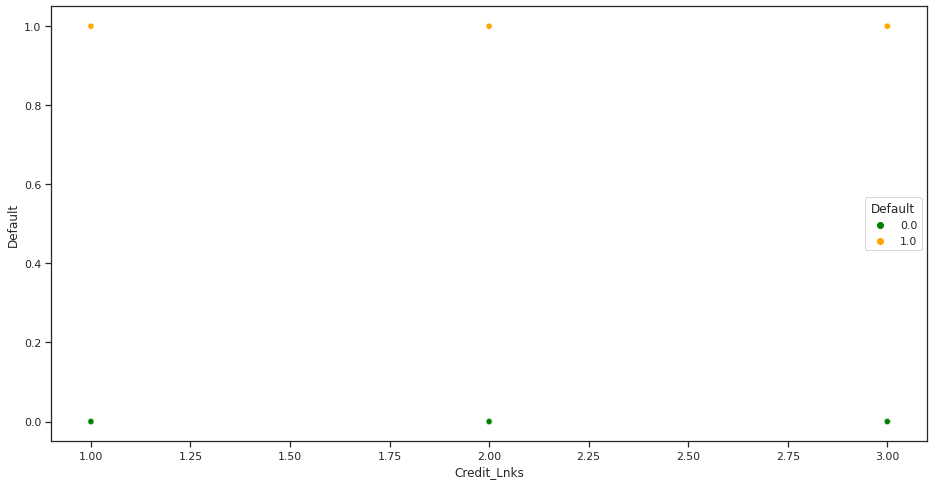

column is Experience


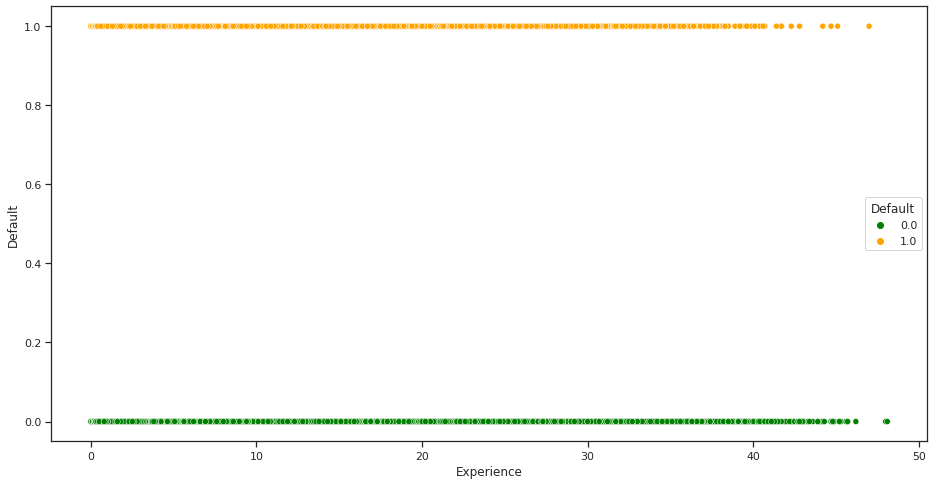

column is Income_Alt


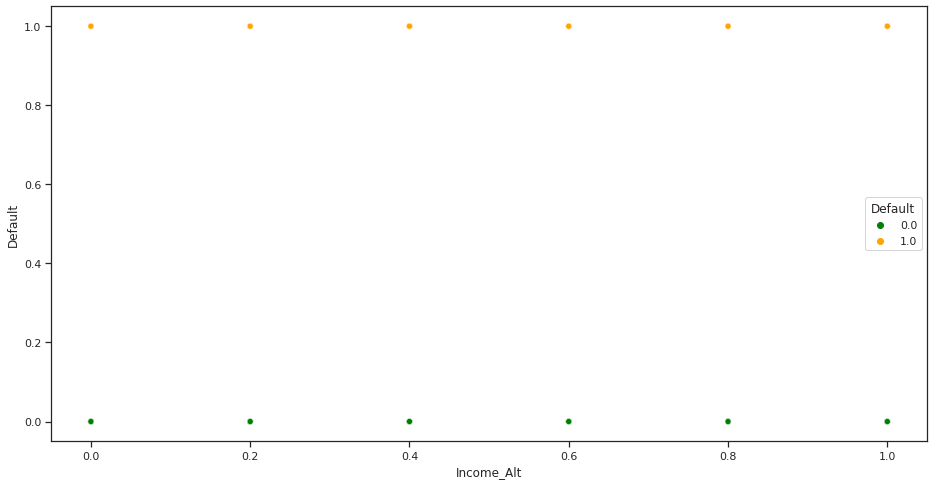

column is Day_Process


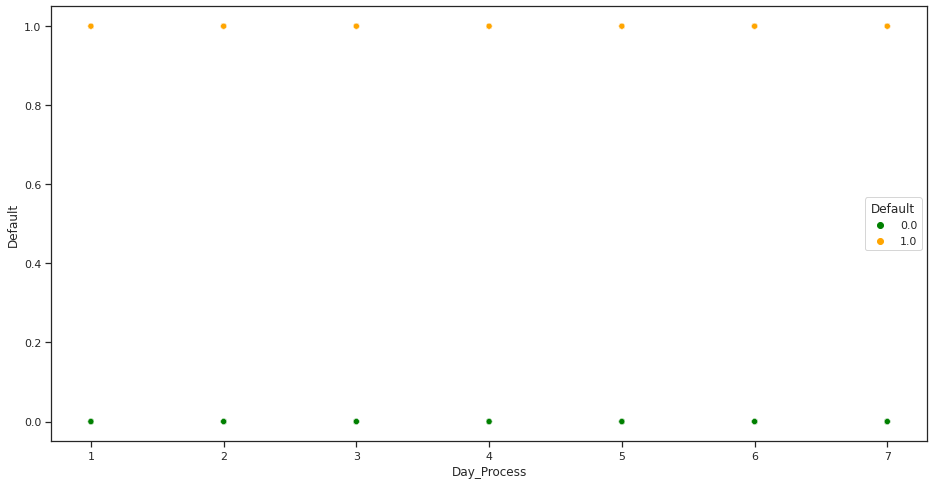

column is Ph.No


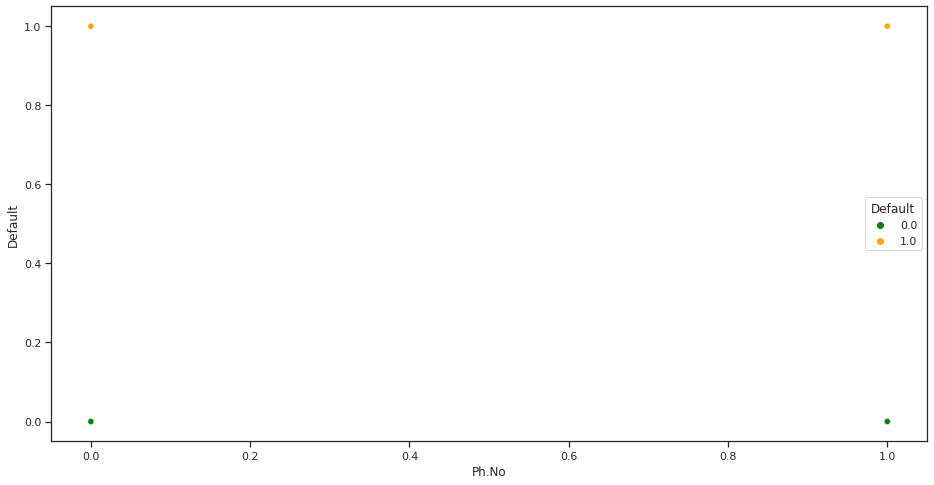

column is Dependents


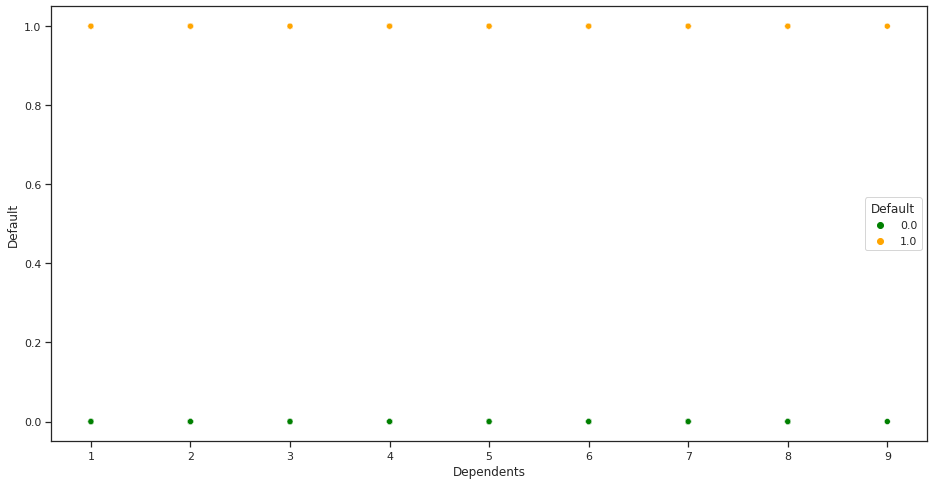

column is Company_Rating


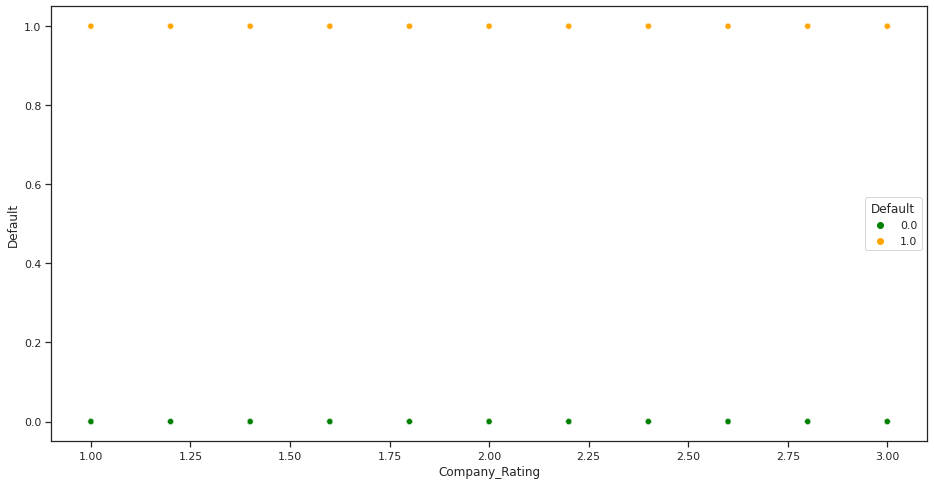

column is Age


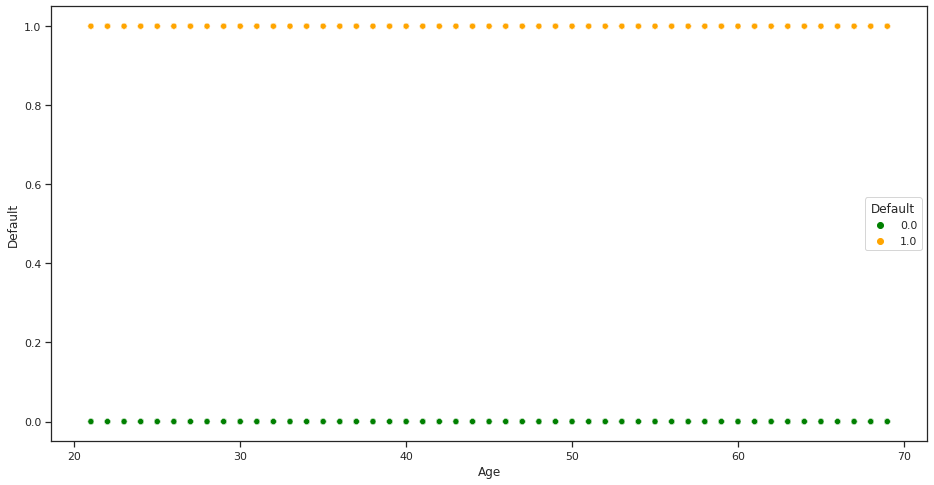

column is hour_Process


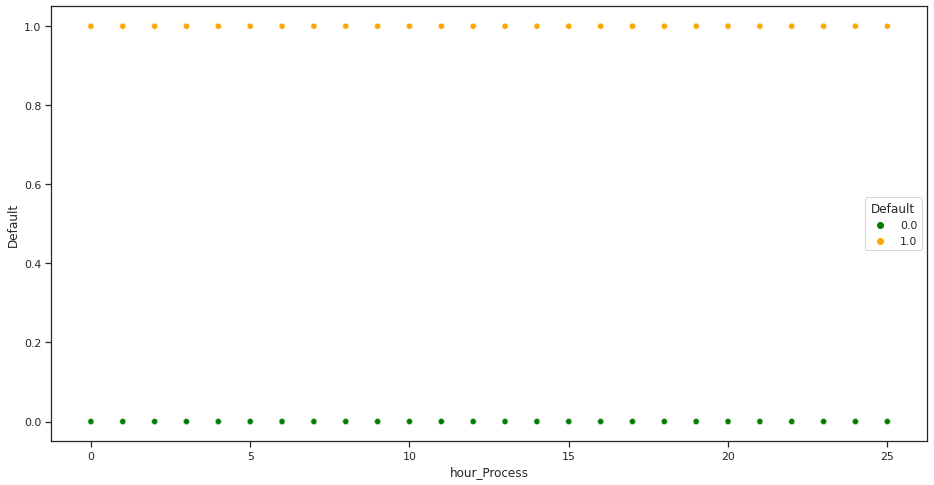

column is Addr_permanent


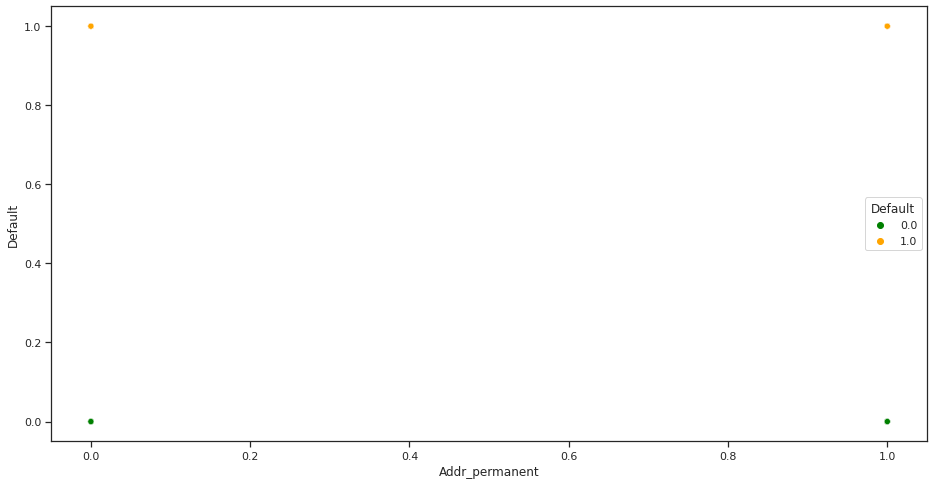

column is Permanent_Addr_tag


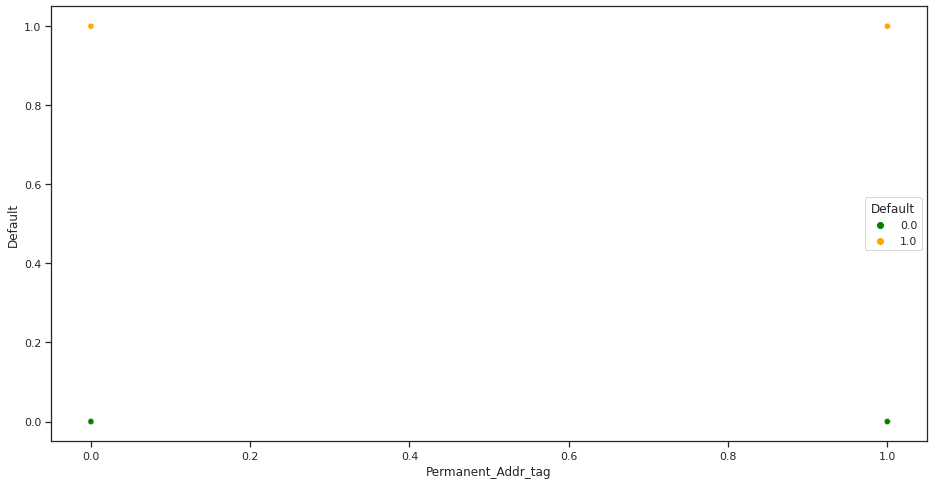

column is c1_rated


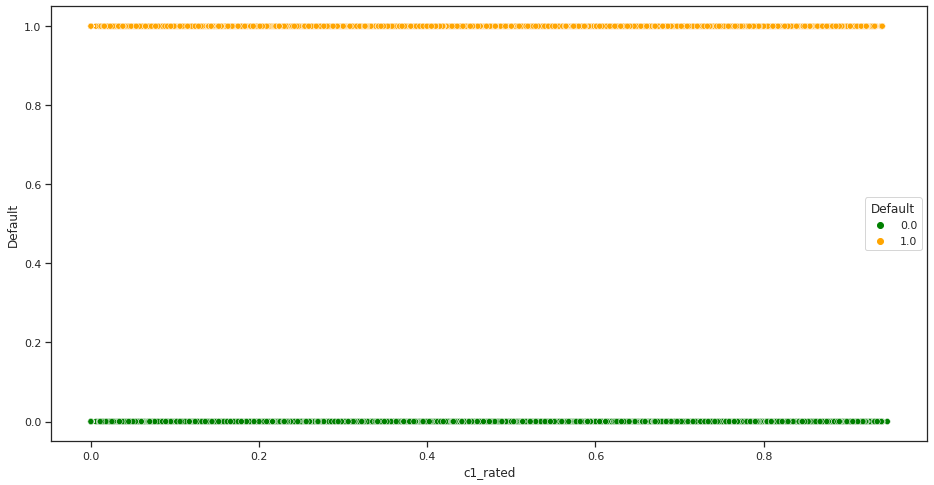

column is c2_rated


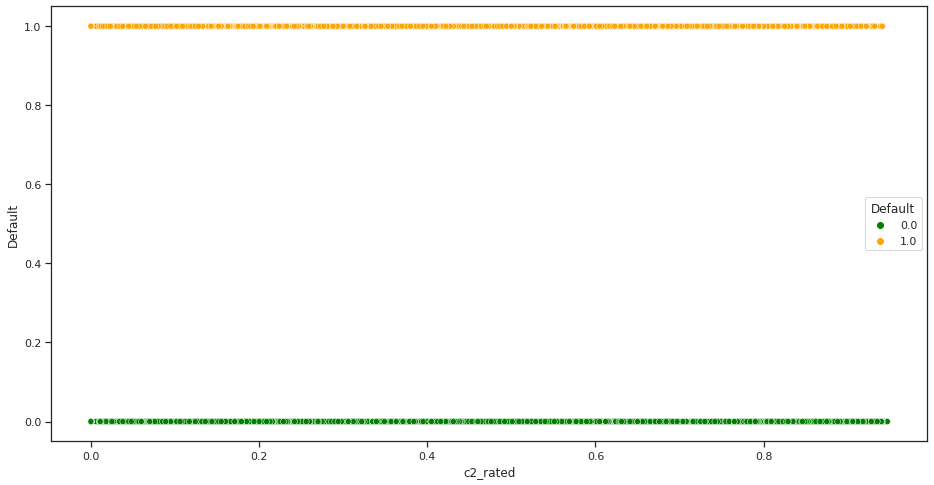

column is Contact_age


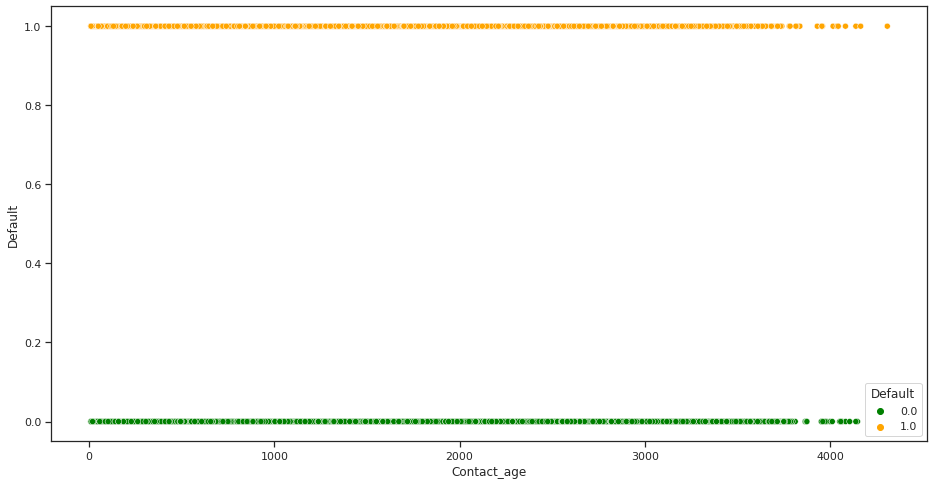

column is Product_bought


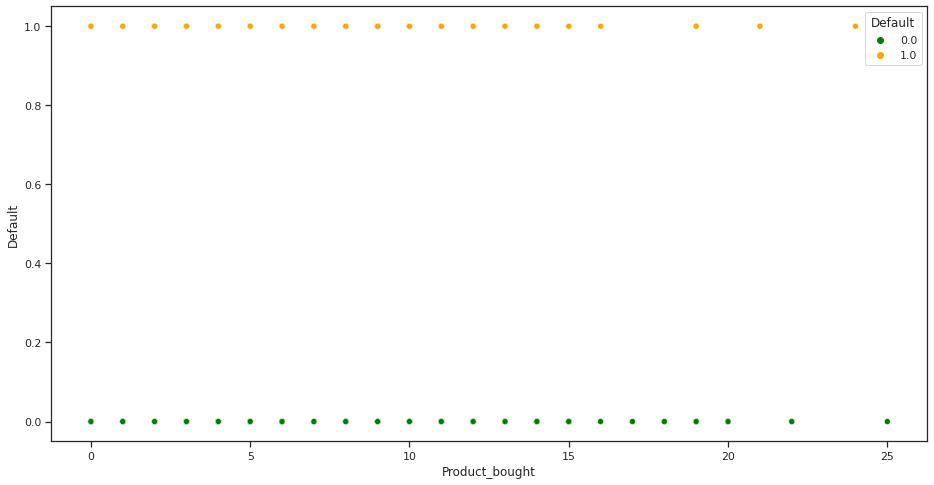

Nothing Default
column is Job_Type_Govt.


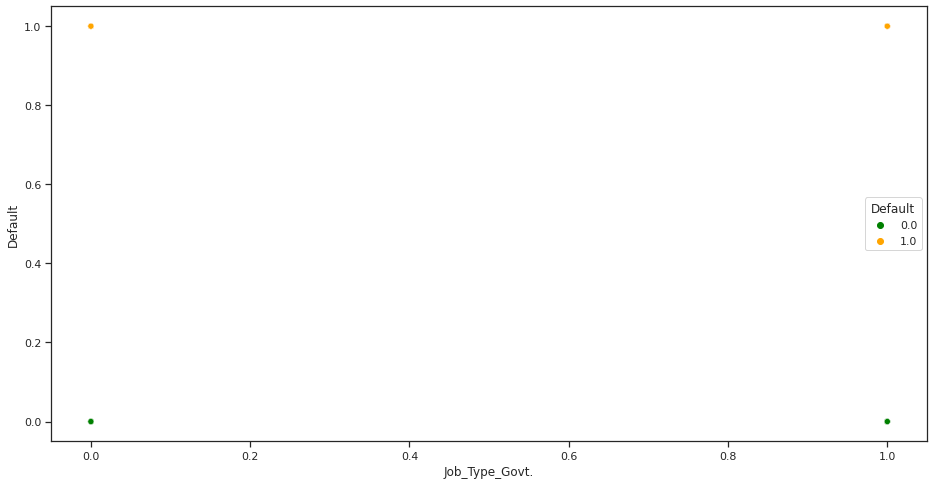

column is Job_Type_IT


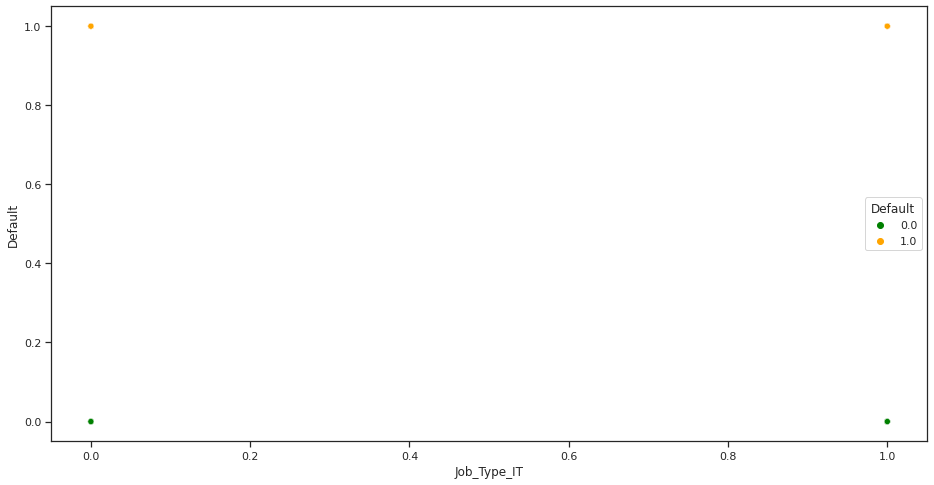

column is Job_Type_Non-IT


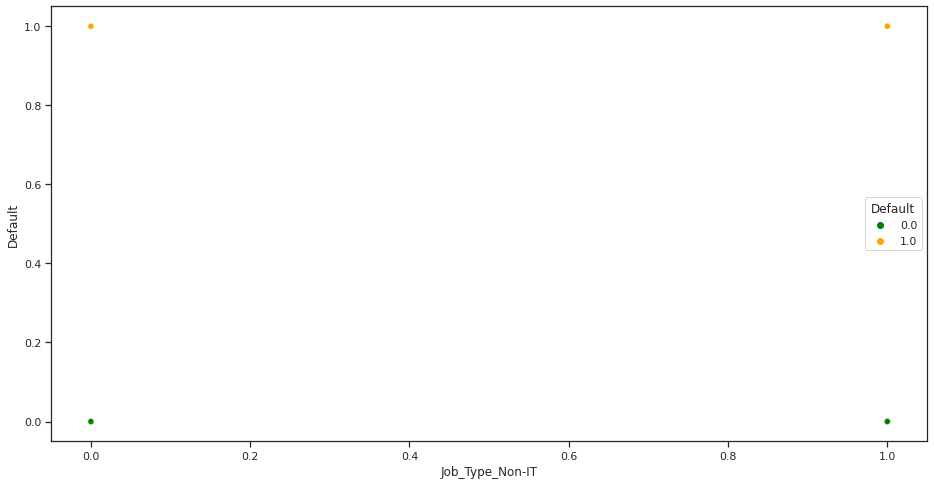

column is Marital_Stat_Divorce


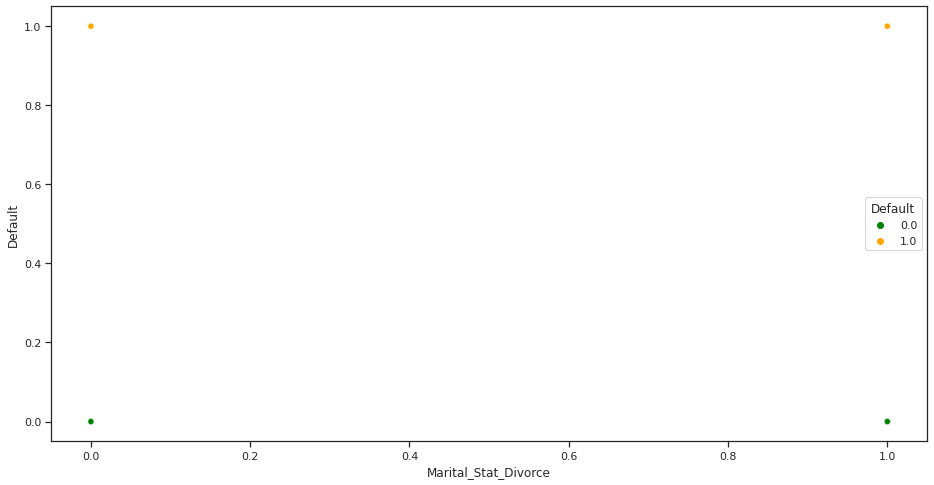

column is Marital_Stat_Married


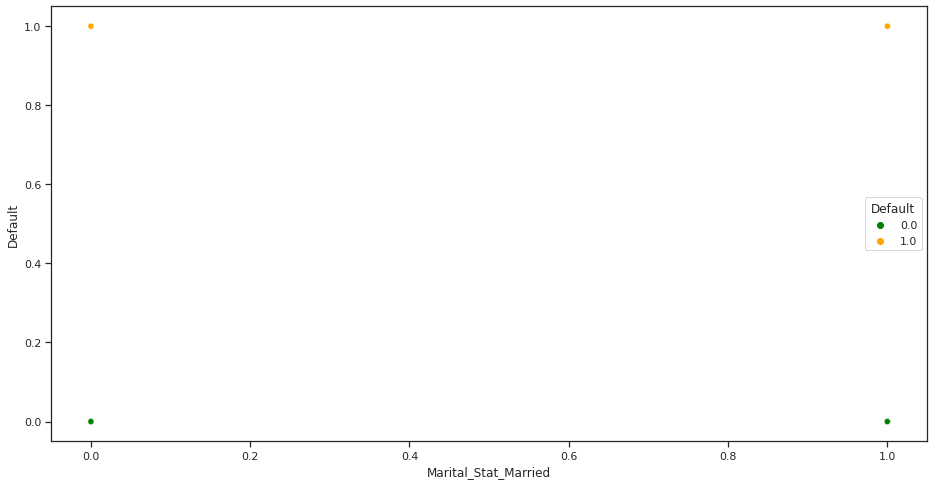

column is Marital_Stat_Single


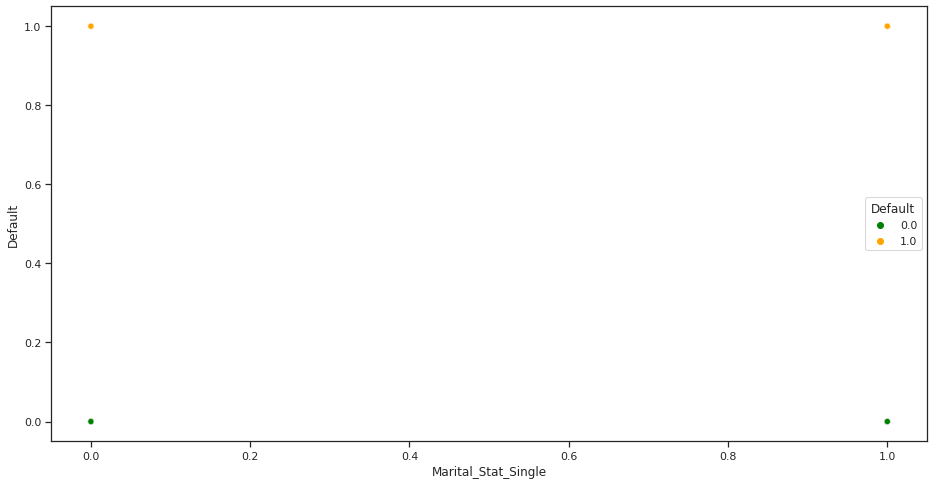

column is Marital_Stat_Widow


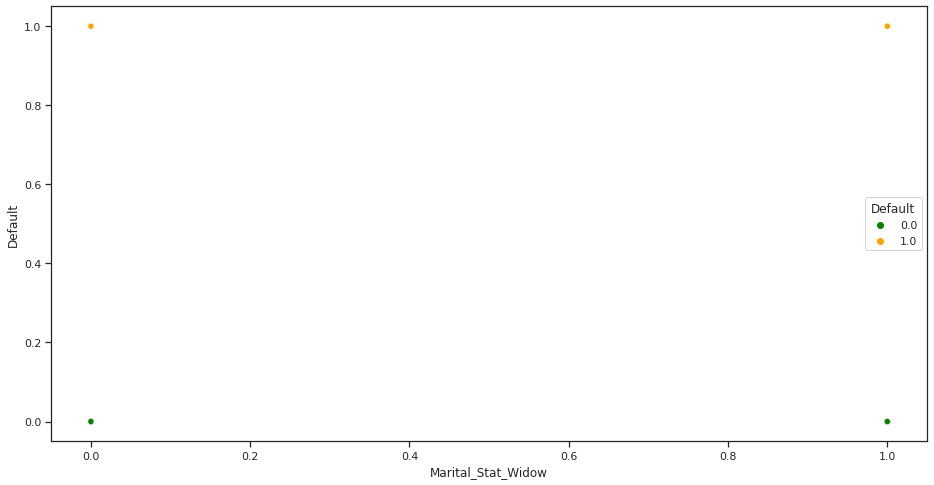

column is Gen_F


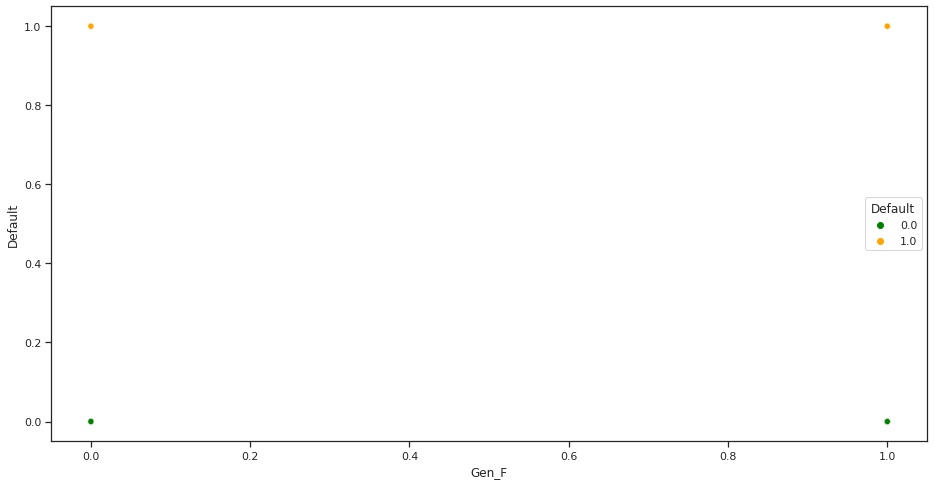

column is Gen_M


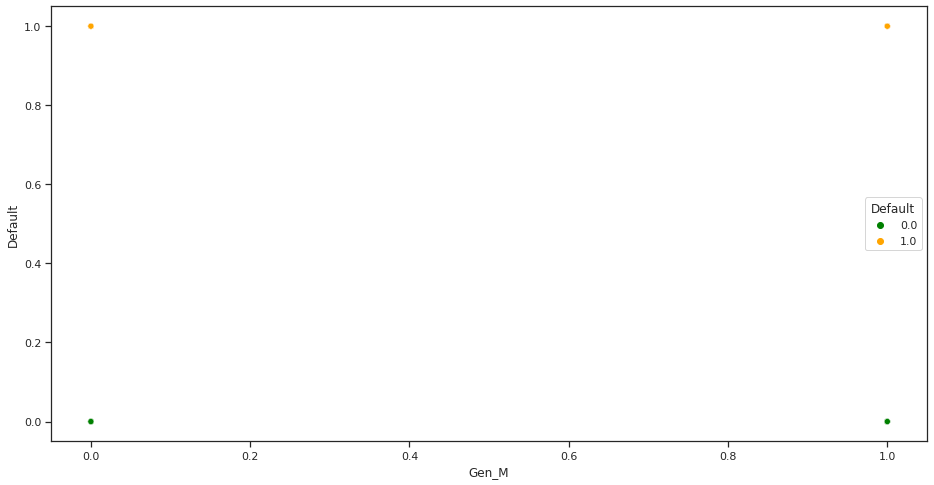

column is Region_Central


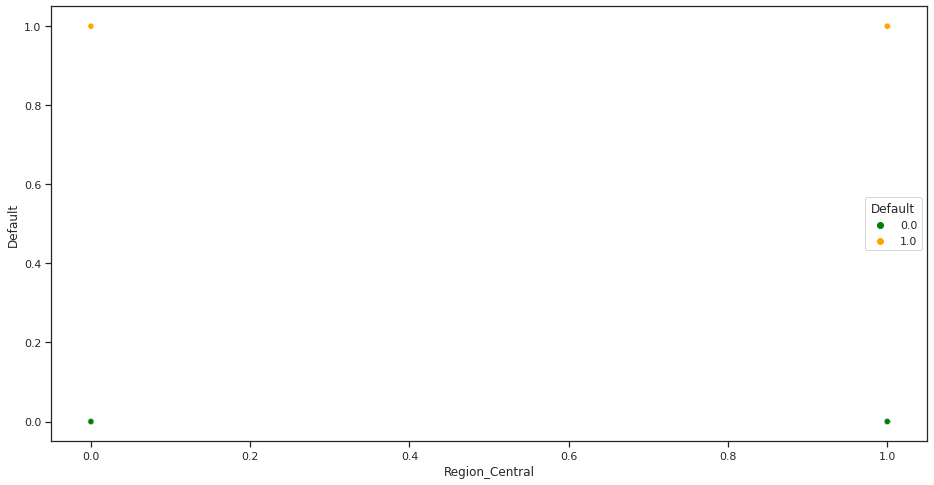

column is Region_East


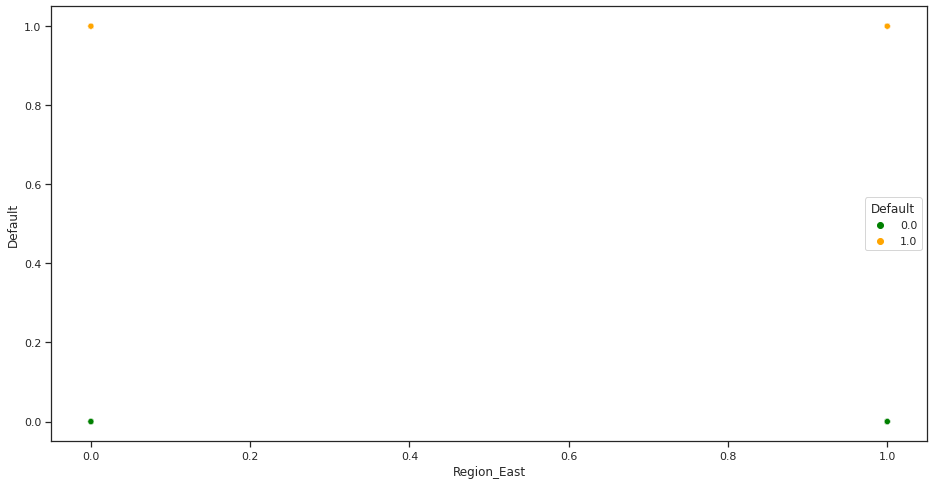

column is Region_North


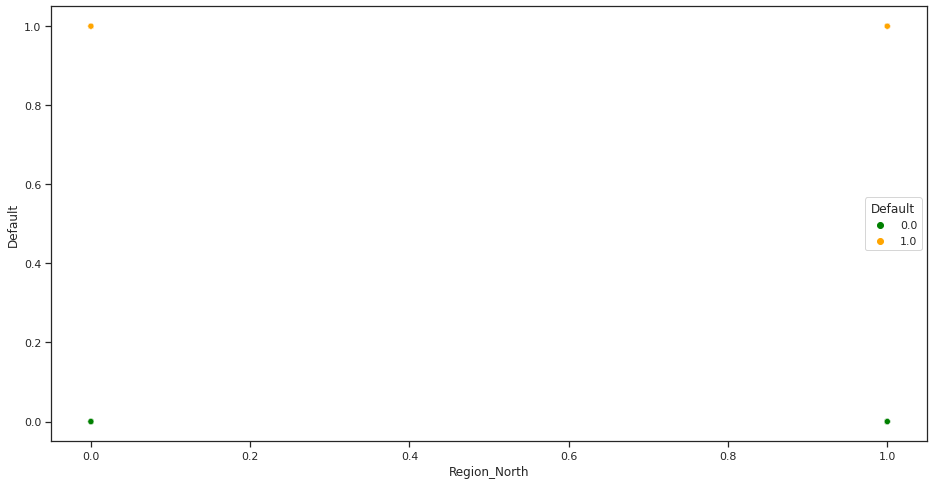

column is Region_South


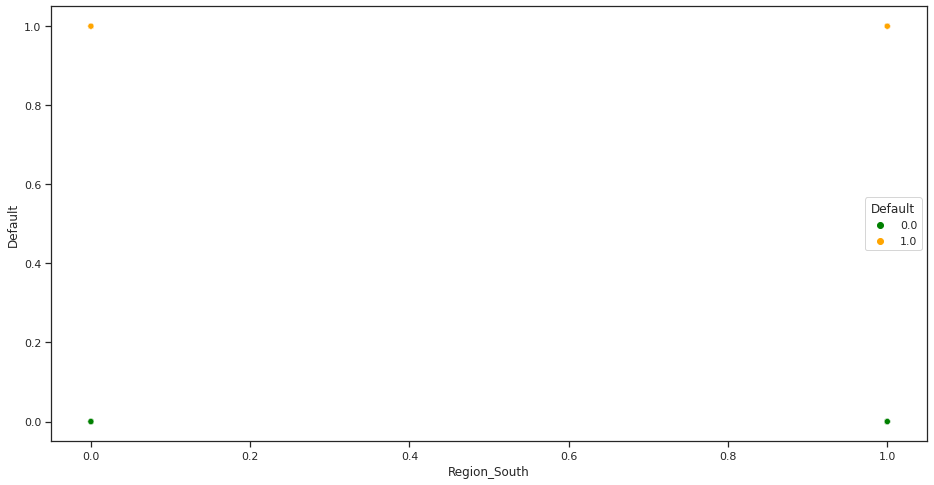

column is Region_Type_Metro


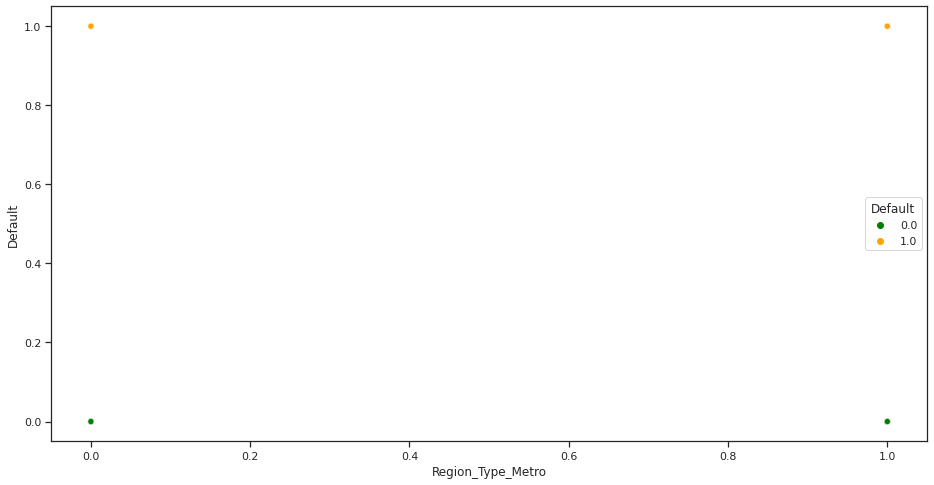

column is Region_Type_Rural


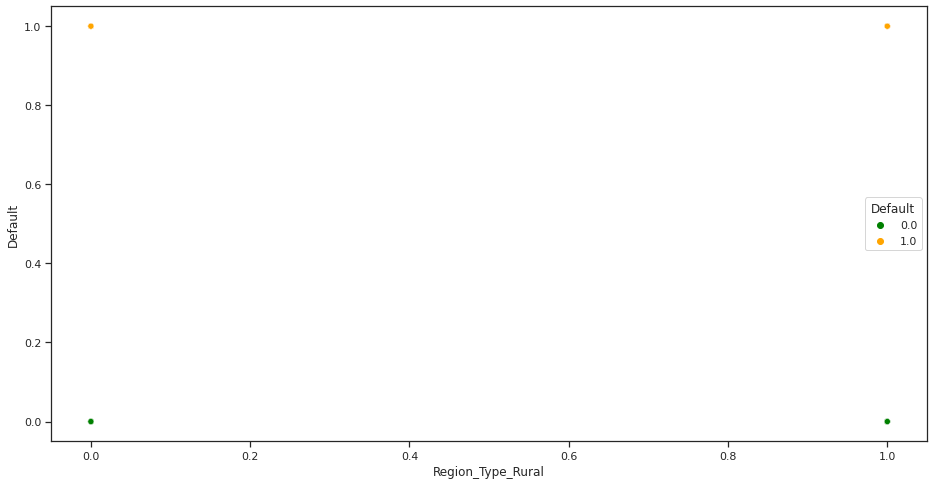

column is Region_Type_other


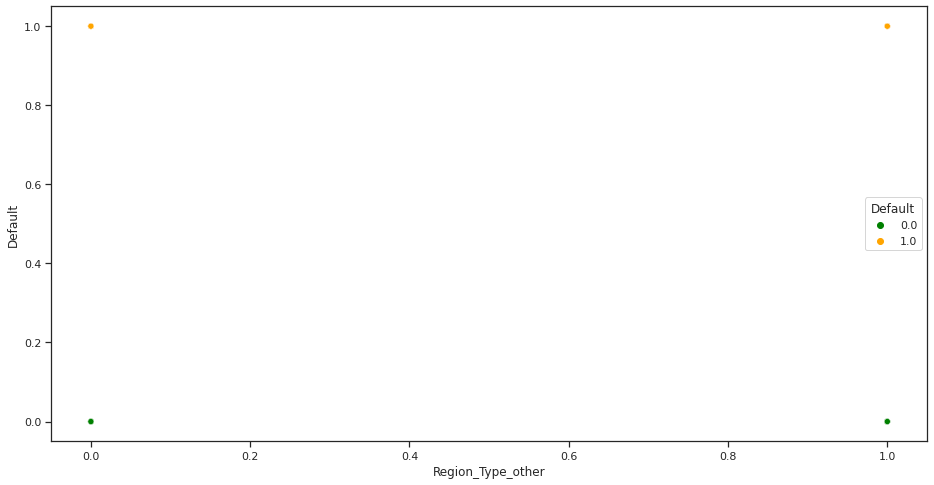

column is Type_Loan_CLoan


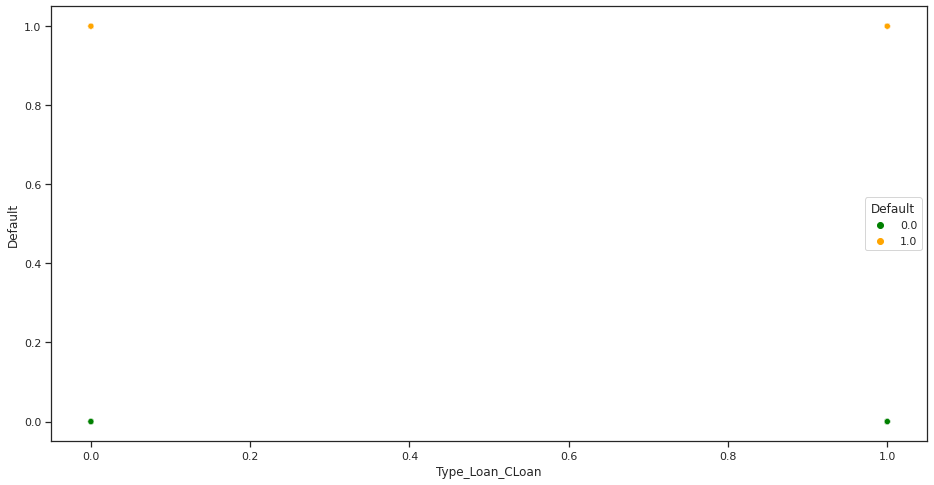

column is Type_Loan_RLoan


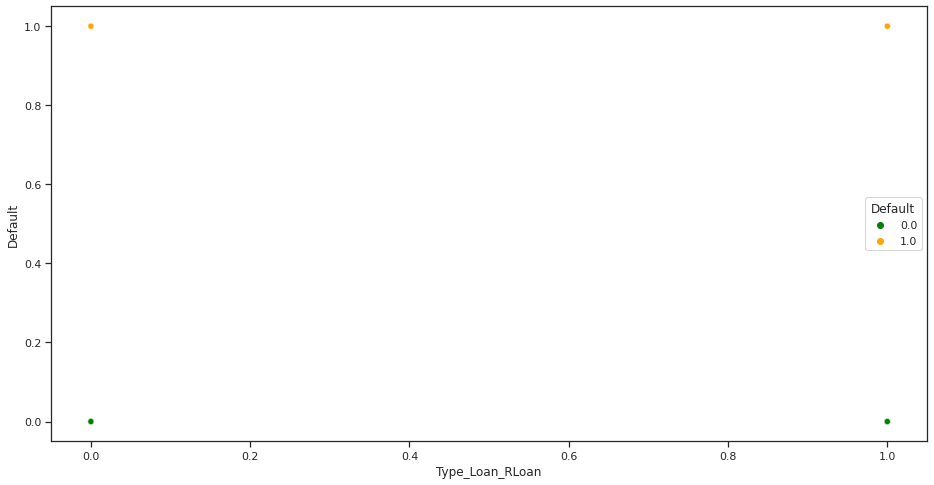

In [176]:
#.. Bivariate analysis.... Checking each independent variable with dependent variable ("Default")

for i in new_train_imputed.columns:
    if i == 'Default':
        print("Nothing",i)
    else:    
        print("column is",i)
        plt.figure()
        g=sns.scatterplot(x=i, y="Default",hue="Default",data=new_train_imputed,palette=['green','orange'], legend='full')
        plt.show()

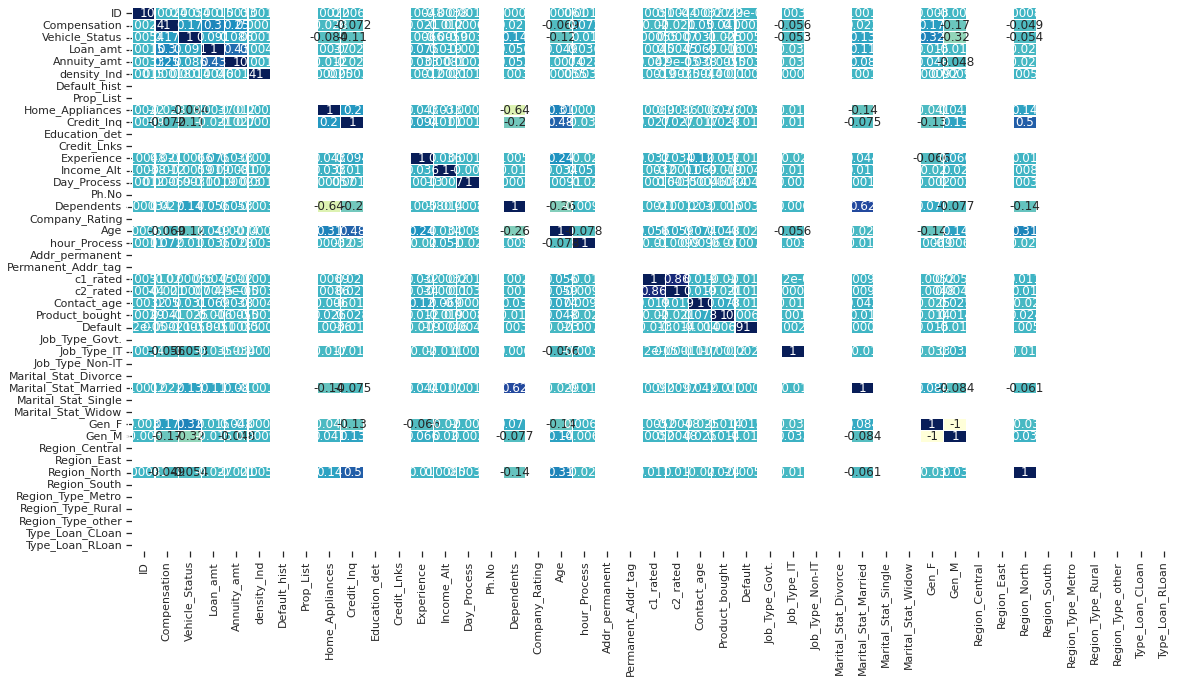

In [234]:
sns.set(rc={'figure.figsize':(18.7,10)})

sns.set(style="ticks", color_codes=True)

sns.heatmap(new_train_imputed.corr(), annot=True, linewidths=0.5, center=0, cbar=False, cmap="YlGnBu")

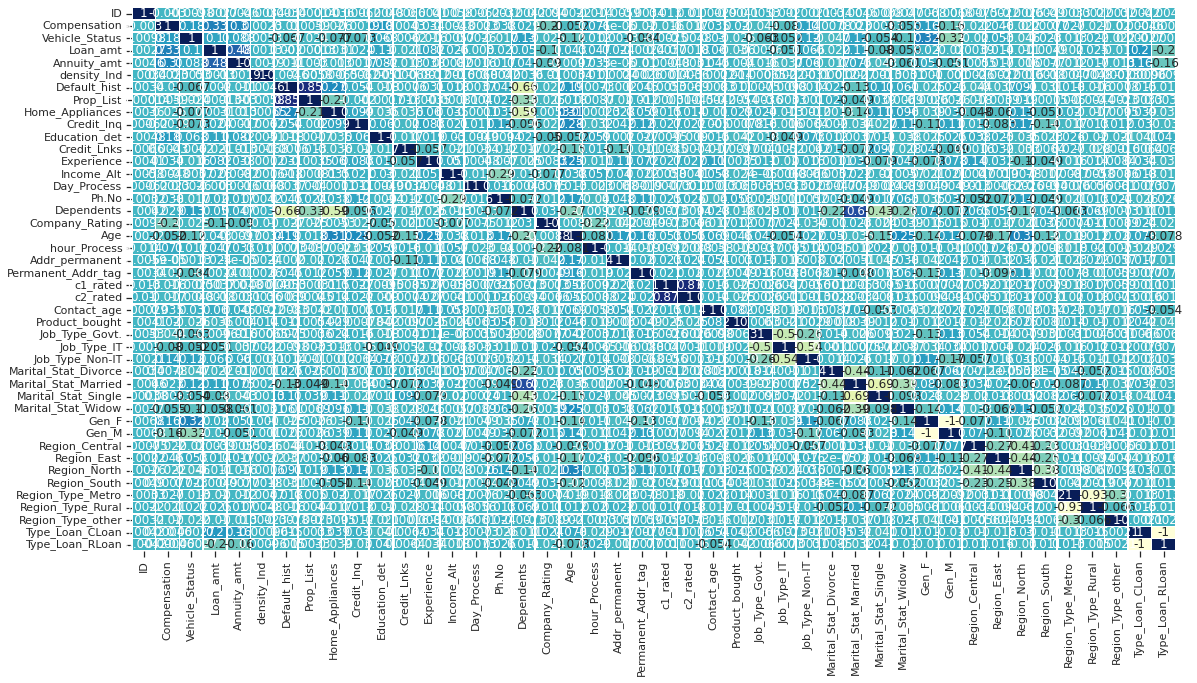

In [179]:
sns.set(rc={'figure.figsize':(18.7,10)})

sns.set(style="ticks", color_codes=True)

sns.heatmap(new_test_imputed.corr(), annot=True, linewidths=0.5, center=0, cbar=False, cmap="YlGnBu")

Observations:

There doesnt seem to be any significant linear relationship between the independent and dependent variables for most of the columns Other than 
- Property list on applicant's name
- default history on applicant's name
- c1 rated
- c2 rated


## 3 Model Building

In this you can build various ML models and try tuning the parameters involved to achieve better score

In [180]:
from sklearn.linear_model import RidgeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import imblearn 
from imblearn.over_sampling import SMOTE
from scipy.stats import zscore


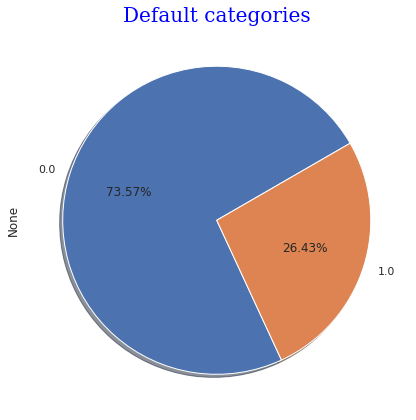

In [235]:
#Checking for imbalance in Target variable (Default)

new_train_imputed.groupby('Default').size().plot(kind='pie', subplots=True, shadow=True, startangle=30, figsize=(8,6), autopct='%1.2f%%')
font1 = {'family':'serif','color':'blue','size':20}
plt.title("Default categories", fontdict = font1)    
                
plt.tight_layout()
plt.show()


In [236]:
new_train_imputed["Default"].value_counts()

0.0    97436
1.0    35004
Name: Default, dtype: int64

There is a major imbalance in Default (Target variable) .... there are only 26% defaulted customers Vs 74% non-defaulters

this has to be corrected else the algorithm will not predict defaults properly and will biased towards non-defaulters

In [237]:
#   Segregating Predictors and Target attributes

X = new_train_imputed.drop(["Default","ID"], axis=1)   #........... Independent variables / Predictors attribute, 
y = new_train_imputed['Default']                       #............Dependent variable / Target attribute

In [238]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [239]:
y.value_counts()    #........... the imbalance has been corrected now..........

1.0    97436
0.0    97436
Name: Default, dtype: int64

In [240]:
print("X.shape",X.shape)
print("y.shape",y.shape)

X.shape (194872, 43)
y.shape (194872,)


In [241]:
X.describe().transpose()

count           mean            std          min  \
Compensation          194872.0  693363.215626  236165.470779  152728.0000   
Vehicle_Status        194872.0       0.338252       0.435854       0.0000   
Loan_amt              194872.0  388407.830957  228204.299842   34275.0000   
Annuity_amt           194872.0   10776.766609    1837.161568    5852.1000   
density_Ind           194872.0       0.020419       0.010737       0.0001   
Default_hist          194872.0       1.000000       0.000000       1.0000   
Prop_List             194872.0       1.000000       0.000000       1.0000   
Home_Appliances       194872.0       3.218312       1.133124       1.0000   
Credit_Inq            194872.0       1.591063       0.726406       1.0000   
Education_det         194872.0       1.000000       0.000000       1.0000   
Credit_Lnks           194872.0       1.000000       0.000000       1.0000   
Experience            194872.0       5.493915       3.699615       0.0000   
Income_Alt            194872.0       0.279221       0.414159       0.0000   
Day_Process           194872.0       4.167233       1.658336       1.0000   
Ph.No                 194872.0       1.000000       0.000000       1.0000   
Dependents            194872.0       2.115546       0.791708       1.0000   
Company_Rating        194872.0       2.000000       0.000000       2.0000   
Age                   194872.0      43.779871      11.317408      21.0000   
hour_Process          194872.0      12.085334       3.301257       3.0000   
Addr_permanent        194872.0       1.000000       0.000000       1.0000   
Permanent_Addr_tag    194872.0       1.000000       0.000000       1.0000   
c1_rated              194872.0       0.503469       0.240606       0.0000   
c2_rated              194872.0       0.503702       0.243864       0.0000   
Contact_age           194872.0     962.588938     754.604888      10.0000   
Product_bought        194872.0       3.308771       1.916924       0.0000   
Job_Type_Govt.        194872.0       0.000000       0.000000       0.0000   
Job_Type_IT           194872.0       0.505568       0.472799       0.0000   
Job_Type_Non-IT       194872.0       0.000000       0.000000       0.0000   
Marital_Stat_Divorce  194872.0       0.000000       0.000000       0.0000   
Marital_Stat_Married  194872.0       0.737350       0.416035       0.0000   
Marital_Stat_Single   194872.0       0.000000       0.000000       0.0000   
Marital_Stat_Widow    194872.0       0.000000       0.000000       0.0000   
Gen_F                 194872.0       0.346520       0.450530       0.0000   
Gen_M                 194872.0       0.653480       0.450530       0.0000   
Region_Central        194872.0       0.000000       0.000000       0.0000   
Region_East           194872.0       0.000000       0.000000       0.0000   
Region_North          194872.0       0.399936       0.463098       0.0000   
Region_South          194872.0       0.000000       0.000000       0.0000   
Region_Type_Metro     194872.0       1.000000       0.000000       1.0000   
Region_Type_Rural     194872.0       0.000000       0.000000       0.0000   
Region_Type_other     194872.0       0.000000       0.000000       0.0000   
Type_Loan_CLoan       194872.0       1.000000       0.000000       1.0000   
Type_Loan_RLoan       194872.0       0.000000       0.000000       0.0000   

                                25%            50%            75%  \
Compensation          522576.000000  669278.349729  831776.387605   
Vehicle_Status             0.000000       0.000000       0.994381   
Loan_amt              205228.096450  349164.250000  522356.587829   
Annuity_amt             9440.615000   10759.963062   12019.540000   
density_Ind                0.011684       0.020400       0.029200   
Default_hist               1.000000       1.000000       1.000000   
Prop_List                  1.000000       1.000000       1.000000   
Home_Appliances            2.281419       4.000000       4.000000   
Credit_Inq     

In [242]:
#  ... Standardizing the Data

X_scaled = X.apply(zscore)

In [243]:
X_scaled.describe().transpose()

count          mean       std       min       25%  \
Compensation          194872.0 -1.518643e-16  1.000003 -2.289228 -0.723169   
Vehicle_Status        194872.0 -9.254061e-17  1.000003 -0.776070 -0.776070   
Loan_amt              194872.0  4.403610e-16  1.000003 -1.551828 -0.802703   
Annuity_amt           194872.0 -3.996238e-16  1.000003 -2.680591 -0.727293   
density_Ind           194872.0  8.575868e-17  1.000003 -1.892467 -0.813594   
Default_hist               0.0           NaN       NaN       NaN       NaN   
Prop_List                  0.0           NaN       NaN       NaN       NaN   
Home_Appliances       194872.0  3.316586e-16  1.000003 -1.957701 -0.826825   
Credit_Inq            194872.0  1.604329e-16  1.000003 -0.813684 -0.813684   
Education_det              0.0           NaN       NaN       NaN       NaN   
Credit_Lnks                0.0           NaN       NaN       NaN       NaN   
Experience            194872.0 -1.426394e-16  1.000003 -1.485000 -0.766005   
Income_Alt            194872.0 -7.183019e-17  1.000003 -0.674190 -0.674190   
Day_Process           194872.0 -3.474102e-16  1.000003 -1.909891 -0.703860   
Ph.No                      0.0           NaN       NaN       NaN       NaN   
Dependents            194872.0 -3.014680e-16  1.000003 -1.409042 -0.193191   
Company_Rating             0.0           NaN       NaN       NaN       NaN   
Age                   194872.0  1.595578e-16  1.000003 -2.012822 -0.775787   
hour_Process          194872.0 -1.900401e-16  1.000003 -2.752090 -0.631680   
Addr_permanent             0.0           NaN       NaN       NaN       NaN   
Permanent_Addr_tag         0.0           NaN       NaN       NaN       NaN   
c1_rated              194872.0  1.528488e-16  1.000003 -2.092510 -0.853967   
c2_rated              194872.0 -4.416280e-16  1.000003 -2.065508 -0.859916   
Contact_age           194872.0  1.792473e-16  1.000003 -1.262371 -0.805265   
Product_bought        194872.0  2.037498e-16  1.000003 -1.726088 -0.682747   
Job_Type_Govt.             0.0           NaN       NaN       NaN       NaN   
Job_Type_IT           194872.0 -1.162409e-16  1.000003 -1.069311 -1.069311   
Job_Type_Non-IT            0.0           NaN       NaN       NaN       NaN   
Marital_Stat_Divorce       0.0           NaN       NaN       NaN       NaN   
Marital_Stat_Married  194872.0  1.206164e-16  1.000003 -1.772333 -0.814267   
Marital_Stat_Single        0.0           NaN       NaN       NaN       NaN   
Marital_Stat_Widow         0.0           NaN       NaN       NaN       NaN   
Gen_F                 194872.0  7.817458e-17  1.000003 -0.769140 -0.769140   
Gen_M                 194872.0  2.466291e-16  1.000003 -1.450476 -1.450476   
Region_Central             0.0           NaN       NaN       NaN       NaN   
Region_East                0.0           NaN       NaN       NaN       NaN   
Region_North          194872.0  2.822890e-16  1.000003 -0.863612 -0.863612   
Region_South               0.0           NaN       NaN       NaN       NaN   
Region_Type_Metro          0.0           NaN       NaN       NaN       NaN   
Region_Type_Rural          0.0           NaN       NaN       NaN       NaN   
Region_Type_other          0.0           NaN       NaN       NaN       NaN   
Type_Loan_CLoan            0.0           NaN       NaN       NaN       NaN   
Type_Loan_RLoan            0.0           NaN       NaN       NaN       NaN   

                           50%       75%       max  
Compensation         -0.101983  0.586087  3.019970  
Vehicle_Status       -0.776070  1.505389  1.518281  
Loan_amt             -0.171967  0.586970  3.068720  
Annuity_amt          -0.009146  0.676466  3.000012  
density_Ind          -0.001796  0.817805  1.954071  
Default_hist               NaN       NaN       NaN  
Prop_List                  NaN       NaN       NaN  
Home_Appliances       0.689854  0.689854  2.454891  
Credit_Inq           -0.813684  0.562960  3.040920  
Education_det              NaN       NaN       NaN  
Credit_Ln

In [244]:
#.... ..... Train & Validation splitting of Data......... in 80% Train & 20% Validation

X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=.20, random_state=1)

## Model 1

In [245]:
# .... Train Logistic Regression model

from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# Fit the model on train
model = LogisticRegression(solver="liblinear")
model.fit(X_train, y_train)
#predict on test
y_pred_logit = model.predict(X_val)

coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

ValueError: ignored

In [192]:
model_score_train = model.score(X_train, y_train)
print(model_score_train)

0.5243141304835885


In [193]:
model_score_valid = model.score(X_val, y_val)
print(model_score_valid)

0.5276715843489417


In [76]:
print("Logistic regression - Accuracy ",metrics.accuracy_score(y_val, y_pred_logit))
print("Logistic regression - Precision",metrics.precision_score(y_val, y_pred_logit))
print("Logistic regression - Recall   ",metrics.recall_score(y_val, y_pred_logit))
print("Logistic regression - F1 score ",metrics.f1_score(y_val, y_pred_logit))
print("Logistic regression - ROC      ",metrics.roc_auc_score(y_val, y_pred_logit))


Logistic regression - Accuracy  0.5237459910198845
Logistic regression - Precision 0.5217479778196062
Logistic regression - Recall    0.5281969408250502
Logistic regression - F1 score  0.5249526539386805
Logistic regression - ROC       0.5237620351942001


Logistic Regression is giving a High Bias and absolutely no variance score......

## Model 2 

In [ ]:
# ...... GridsearchCV for Logistic Regression

from sklearn.model_selection import GridSearchCV

parameters = [{'penalty': ['l1'], 'solver': ['liblinear', 'saga'], 'C':[1, 10, 100]},
              {'penalty': ['l2'], 'solver': ['lbfgs','sag','newton-cg'], 'C':[1, 10, 100]}] 
              
Logreg=LogisticRegression()

grid_search = GridSearchCV(estimator = Logreg,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)

grid_search.fit(X_train, y_train)  

def display1(results):
    print(f'Best parameters are: {results.best_params_}')
    print("")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,2)} + or -{round(std,2)} for the {params}')

display1(grid_search)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


Best parameters are: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}

0.52 + or -0.0 for the {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
0.52 + or -0.0 for the {'C': 1, 'penalty': 'l1', 'solver': 'saga'}
0.52 + or -0.0 for the {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
0.52 + or -0.0 for the {'C': 10, 'penalty': 'l1', 'solver': 'saga'}
0.52 + or -0.0 for the {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
0.52 + or -0.0 for the {'C': 100, 'penalty': 'l1', 'solver': 'saga'}
0.52 + or -0.0 for the {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.52 + or -0.0 for the {'C': 1, 'penalty': 'l2', 'solver': 'sag'}
0.52 + or -0.0 for the {'C': 1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.52 + or -0.0 for the {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.52 + or -0.0 for the {'C': 10, 'penalty': 'l2', 'solver': 'sag'}
0.52 + or -0.0 for the {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.52 + or -0.0 for the {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.52 + or -0.0 for th

0.5216713599363683

Logistic regression 2 - Accuracy  0.5250288646568313
Logistic regression 2 - Precision 0.5230479295064432
Logistic regression 2 - Recall    0.5288664572282021
Logistic regression 2 - F1 score  0.5259411011523689
Logistic regression 2 - ROC       0.5250426978849876


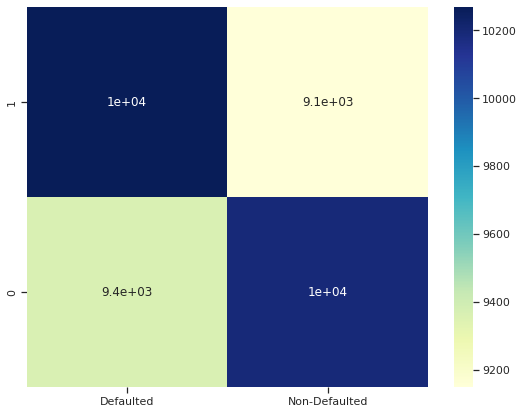

In [ ]:
# ..... Hyper tuned Logistic regression based on Gridsearch 

model_logit_2 = LogisticRegression(solver="liblinear", penalty="l1", C=1, random_state=10)
model_logit_2.fit(X_train, y_train)
#predict on Vaildation data
y_pred_logit_2 = model_logit_2.predict(X_val)

model_score_train = model_logit_2.score(X_train, y_train)
print(model_score_train)
print("")

cm=metrics.confusion_matrix(y_val, y_pred_logit_2, labels=[1,0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Defaulted","Non-Defaulted"]])
plt.figure(figsize = (9,7))
sns.heatmap(df_cm, annot=True,cmap="YlGnBu")

print("Logistic regression 2 - Accuracy ",metrics.accuracy_score(y_val, y_pred_logit_2))
print("Logistic regression 2 - Precision",metrics.precision_score(y_val, y_pred_logit_2))
print("Logistic regression 2 - Recall   ",metrics.recall_score(y_val, y_pred_logit_2))
print("Logistic regression 2 - F1 score ",metrics.f1_score(y_val, y_pred_logit_2))
print("Logistic regression 2 - ROC      ",metrics.roc_auc_score(y_val, y_pred_logit_2))


In [ ]:
#Predicting the actual Test_data which has been given separately

X_test = new_test_imputed.drop(["ID"], axis=1)
X_test_scaled = X_test.apply(zscore)

y_pred_test_logit = model_logit_2.predict(X_test)

In [ ]:
y_pred_test_logit

array([1., 1., 1., ..., 1., 1., 1.])

In [ ]:
unique, counts = np.unique(y_pred_test_logit, return_counts=True)

result = np.column_stack((unique, counts)) 
print (result)

[[1.000e+00 5.676e+04]]


In [ ]:
Logit_test_pred = Test_set_df["ID"]

In [ ]:
pred_df = pd.DataFrame(y_pred_test_logit)

In [ ]:
pred_df.value_counts()

1.0    56760
dtype: int64

In [ ]:
Logit_test_pred.count()

56760

In [ ]:
Logit_test_pred.shape

(56760,)

In [ ]:
#reset index 
Logit_test_pred = Logit_test_pred.reset_index(drop=True)
pred_df         = pred_df.reset_index(drop=True)

In [ ]:
result = pd.concat([Logit_test_pred,pred_df],axis=1)

In [ ]:
result.shape

(56760, 2)

In [ ]:
result.columns = ['ID', 'Default']

In [ ]:
result

ID  Default
0      487410.0      1.0
1      533258.0      1.0
2      581926.0      1.0
3      486301.0      1.0
4      580822.0      1.0
...         ...      ...
56755  513665.0      1.0
56756  450327.0      1.0
56757  476417.0      1.0
56758  461152.0      1.0
56759  524075.0      1.0

[56760 rows x 2 columns]

In [ ]:
result["Default"].value_counts()

1.0    56760
Name: Default, dtype: int64

In [ ]:
result.to_csv('/content/drive/MyDrive/Colab Notebooks/Project/Hackathon/Ramesh_Gopinath_logistic_prediction_3.csv', index=False)

#Model 3 - XGBoost

XGB train score 0.8171613308787212
XGB Validation score 0.8158819756254009
with XGBoost - Accuracy  0.8158819756254009
with XGBoost - Precision 0.9897575418100344
with XGBoost - Recall    0.6370191069681207
with XGBoost - F1 score  0.7751457040797142
with XGBoost - ROC       0.8152372352511121


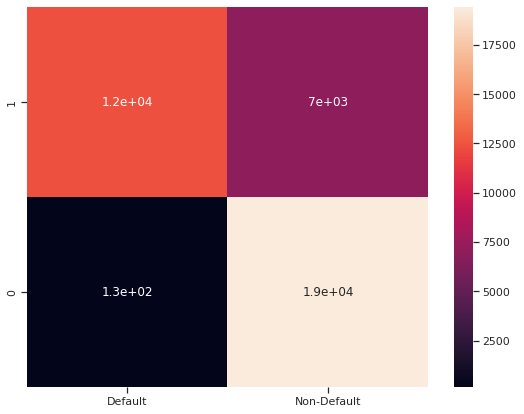

In [77]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

xgb_mod = XGBClassifier(use_label_encoder=False)

xgb_mod.fit(X_train,y_train)

print("XGB train score",xgb_mod.score(X_train,y_train))
print("XGB Validation score",xgb_mod.score(X_val,y_val))

y_pred_xgb = xgb_mod.predict(X_val)

cm=metrics.confusion_matrix(y_val, y_pred_xgb, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Default","Non-Default"]])
plt.figure(figsize = (9,7))
sns.heatmap(df_cm, annot=True)

print("with XGBoost - Accuracy ",metrics.accuracy_score(y_val, y_pred_xgb))
print("with XGBoost - Precision",metrics.precision_score(y_val, y_pred_xgb))
print("with XGBoost - Recall   ",metrics.recall_score(y_val, y_pred_xgb))
print("with XGBoost - F1 score ",metrics.f1_score(y_val, y_pred_xgb))
print("with XGBoost - ROC      ",metrics.roc_auc_score(y_val, y_pred_xgb))

In [79]:
#Predicting the actual Test_data which has been given separately

X_test = new_test_imputed.drop(["ID"], axis=1)
X_test_scaled = X_test.apply(zscore)
y_pred_test_xgb = xgb_mod.predict(X_test_scaled)

unique, counts = np.unique(y_pred_test_xgb, return_counts=True)

result_xgb = np.column_stack((unique, counts)) 
print ("result xgb",result_xgb)


result xgb [[1.000e+00 5.676e+04]]


In [80]:
xgb_test_pred = Test_set_df["ID"]
xgb_pred_df = pd.DataFrame(y_pred_test_xgb)
#reset index 
xgb_test_pred = xgb_test_pred.reset_index(drop=True)
xgb_pred_df   = xgb_pred_df.reset_index(drop=True)

result_data_xgb = pd.concat([xgb_test_pred,xgb_pred_df],axis=1)

result_data_xgb.columns = ['ID', 'Default']

result_data_xgb.to_csv('/content/drive/MyDrive/Colab Notebooks/Project/Hackathon/Ramesh_Gopinath_xgb_prediction_2.csv', index=False)

GridsearchCV for XGBOOST

#Model 4 - GradientBoostingClassifier

gbcl train score 0.8124595085216522
gbcl validation score 0.8106478511866582
GBCL - 100, rate=0.05 - Accuracy  0.8106478511866582
GBCL - 100, rate=0.05 - Precision 0.9773935115412072
GBCL - 100, rate=0.05 - Recall    0.6345985476644178
GBCL - 100, rate=0.05 - F1 score  0.7695478391206594
GBCL - 100, rate=0.05 - ROC       0.8100132527666603


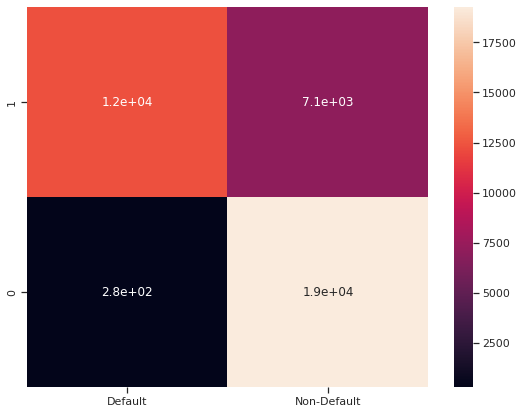

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbcl = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.05, random_state=1)
gbcl = gbcl.fit(X_train, y_train)

print("gbcl train score",gbcl.score(X_train,y_train))
print("gbcl validation score",gbcl.score(X_val,y_val))

y_pred_gbcl = gbcl.predict(X_val)

cm=metrics.confusion_matrix(y_val, y_pred_gbcl, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Default","Non-Default"]])
plt.figure(figsize = (9,7))
sns.heatmap(df_cm, annot=True)

print("GBCL - 100, rate=0.05 - Accuracy ",metrics.accuracy_score(y_val, y_pred_gbcl))
print("GBCL - 100, rate=0.05 - Precision",metrics.precision_score(y_val, y_pred_gbcl))
print("GBCL - 100, rate=0.05 - Recall   ",metrics.recall_score(y_val, y_pred_gbcl))
print("GBCL - 100, rate=0.05 - F1 score ",metrics.f1_score(y_val, y_pred_gbcl))
print("GBCL - 100, rate=0.05 - ROC      ",metrics.roc_auc_score(y_val, y_pred_gbcl))

In [ ]:
#Predicting the actual Test_data which has been given separately

y_pred_test_gbcl = gbcl.predict(X_test_scaled)

unique, counts = np.unique(y_pred_test_gbcl, return_counts=True)

result_gbcl = np.column_stack((unique, counts)) 
print("result gbcl",result_gbcl)


result gbcl [[1.000e+00 5.676e+04]]


In [ ]:
gbcl_test_pred = Test_set_df["ID"]
gbcl_pred_df = pd.DataFrame(y_pred_test_gbcl)
#reset index 
gbcl_test_pred = gbcl_test_pred.reset_index(drop=True)
gbcl_pred_df   = gbcl_pred_df.reset_index(drop=True)

result_data_gbcl = pd.concat([gbcl_test_pred,gbcl_pred_df],axis=1)

result_data_gbcl.columns = ['ID', 'Default']

result_data_gbcl.to_csv('/content/drive/MyDrive/Colab Notebooks/Project/Hackathon/Ramesh_Gopinath_gbcl_prediction_1.csv', index=False)

Model 5 - KNN Classifier

In [84]:
from sklearn.neighbors import KNeighborsClassifier
import scipy.stats as stats

NNH_1 = KNeighborsClassifier(n_neighbors= 3, weights = 'uniform', leaf_size=7,p=2 )

NNH_1.fit(X_train, y_train)
NNH_pred_1 = NNH_1.predict(X_val)

print("NNH 1 train score",NNH_1.score(X_train,y_train))
print("NNH 1 validation score",NNH_1.score(X_val,y_val))
print("")

print("KNN with neighbours=3, weights=uniform, leaf_size=7, p=2 - Accuracy ",metrics.accuracy_score(y_val, NNH_pred_1))
print("KNN with neighbours=3, weights=uniform, leaf_size=7, p=2 - Precision",metrics.precision_score(y_val, NNH_pred_1))
print("KNN with neighbours=3, weights=uniform, leaf_size=7, p=2 - Recall   ",metrics.recall_score(y_val, NNH_pred_1))
print("KNN with neighbours=3, weights=uniform, leaf_size=7, p=2 - F1 score ",metrics.f1_score(y_val, NNH_pred_1))
print("KNN with neighbours=3, weights=uniform, leaf_size=7, p=2 - ROC      ",metrics.roc_auc_score(y_val, NNH_pred_1))

NNH 1 train score 0.8767840304816642
NNH 1 validation score 0.7214111610006414

KNN with neighbours=3, weights=uniform, leaf_size=7, p=2 - Accuracy  0.7214111610006414
KNN with neighbours=3, weights=uniform, leaf_size=7, p=2 - Precision 0.7019680022653263
KNN with neighbours=3, weights=uniform, leaf_size=7, p=2 - Recall    0.7660297677293094
KNN with neighbours=3, weights=uniform, leaf_size=7, p=2 - F1 score  0.7326010934344679
KNN with neighbours=3, weights=uniform, leaf_size=7, p=2 - ROC       0.7215719960438142


In [85]:
#Predicting the actual Test_data which has been given separately

y_pred_test_NNH_1 = NNH_1.predict(X_test_scaled)

unique, counts = np.unique(y_pred_test_NNH_1, return_counts=True)

result_NNH_1 = np.column_stack((unique, counts)) 
print("result NNH 1",result_NNH_1)


result NNH 1 [[0.0000e+00 3.6593e+04]
 [1.0000e+00 2.0167e+04]]


In [86]:
NNH_1_test_pred = Test_set_df["ID"]
NNH_1_pred_df = pd.DataFrame(y_pred_test_NNH_1)
#reset index 
NNH_1_test_pred = NNH_1_test_pred.reset_index(drop=True)
NNH_1_pred_df   = NNH_1_pred_df.reset_index(drop=True)

result_data_NNH_1 = pd.concat([NNH_1_test_pred,NNH_1_pred_df],axis=1)

result_data_NNH_1.columns = ['ID', 'Default']

result_data_NNH_1.to_csv('/content/drive/MyDrive/Colab Notebooks/Project/Hackathon/Ramesh_Gopinath_NNH_prediction_1.csv', index=False)

with little KNN Tuning

In [228]:
from sklearn.neighbors import KNeighborsClassifier
import scipy.stats as stats

NNH_2 = KNeighborsClassifier(n_neighbors= 5, weights = 'distance', leaf_size=7,p=2 )

NNH_2.fit(X_train, y_train)
NNH_pred_2 = NNH_2.predict(X_val)

print("NNH 2 train score",NNH_2.score(X_train,y_train))
print("NNH 2 validation score",NNH_2.score(X_val,y_val))
print("")

print("KNN with neighbours=5, weights=distance, leaf_size=7, p=2 - Accuracy ",metrics.accuracy_score(y_val, NNH_pred_2))
print("KNN with neighbours=5, weights=distance, leaf_size=7, p=2 - Precision",metrics.precision_score(y_val, NNH_pred_2))
print("KNN with neighbours=5, weights=distance, leaf_size=7, p=2 - Recall   ",metrics.recall_score(y_val, NNH_pred_2))
print("KNN with neighbours=5, weights=distance, leaf_size=7, p=2 - F1 score ",metrics.f1_score(y_val, NNH_pred_2))
print("KNN with neighbours=5, weights=distance, leaf_size=7, p=2 - ROC      ",metrics.roc_auc_score(y_val, NNH_pred_2))

NNH 2 train score 1.0
NNH 2 validation score 0.7439127645926876

KNN with neighbours=5, weights=distance, leaf_size=7, p=2 - Accuracy  0.7439127645926876
KNN with neighbours=5, weights=distance, leaf_size=7, p=2 - Precision 0.6980189708721565
KNN with neighbours=5, weights=distance, leaf_size=7, p=2 - Recall    0.8565174846783746
KNN with neighbours=5, weights=distance, leaf_size=7, p=2 - F1 score  0.7691880766829313
KNN with neighbours=5, weights=distance, leaf_size=7, p=2 - ROC       0.7443186666668281


In [229]:
#Predicting the actual Test_data which has been given separately

y_pred_test_NNH_2 = NNH_2.predict(X_test_scaled)

unique, counts = np.unique(y_pred_test_NNH_2, return_counts=True)

result_NNH_2 = np.column_stack((unique, counts)) 
print("result NNH 1",result_NNH_2)


result NNH 1 [[0.0000e+00 3.3005e+04]
 [1.0000e+00 2.3755e+04]]


In [230]:
NNH_2_test_pred = Test_set_df["ID"]
NNH_2_pred_df = pd.DataFrame(y_pred_test_NNH_2)
#reset index 
NNH_2_test_pred = NNH_2_test_pred.reset_index(drop=True)
NNH_2_pred_df   = NNH_2_pred_df.reset_index(drop=True)

result_data_NNH_2 = pd.concat([NNH_2_test_pred,NNH_2_pred_df],axis=1)

result_data_NNH_2.columns = ['ID', 'Default']

result_data_NNH_2.to_csv('/content/drive/MyDrive/Colab Notebooks/Project/Hackathon/Ramesh_Gopinath_NNH_prediction_3.csv', index=False)

Model 6 - CatBoost Classifier

In [91]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 74 kB/s 


In [224]:
from catboost import CatBoostClassifier

model_cat_1 = CatBoostClassifier()
# Fit model
model_cat_1.fit(X_train, y_train)

print("Cat Boost 1 train score",model_cat_1.score(X_train,y_train))
print("Cat Boost 1 validation score",model_cat_1.score(X_val,y_val))
print("")

# Get predicted classes
cat_pred_1 = model_cat_1.predict(X_val)
# Get predicted probabilities for each class
cat_pred_proba = model_cat_1.predict_proba(X_val)
# Get predicted RawFormulaVal
cat_pred_raw = model_cat_1.predict(X_val, prediction_type='RawFormulaVal')

print("Cat Boost 1 - Accuracy ",metrics.accuracy_score(y_val, cat_pred_1))
print("Cat Boost 1 - Precision",metrics.precision_score(y_val, cat_pred_1))
print("Cat Boost 1 - Recall   ",metrics.recall_score(y_val, cat_pred_1))
print("Cat Boost 1 - F1 score ",metrics.f1_score(y_val, cat_pred_1))
print("Cat Boost 1 - ROC      ",metrics.roc_auc_score(y_val, cat_pred_1))

Learning rate set to 0.088977
0:	learn: 0.6104578	total: 281ms	remaining: 4m 40s
1:	learn: 0.5565010	total: 408ms	remaining: 3m 23s
2:	learn: 0.5437435	total: 537ms	remaining: 2m 58s
3:	learn: 0.5105314	total: 675ms	remaining: 2m 48s
4:	learn: 0.4956122	total: 762ms	remaining: 2m 31s
5:	learn: 0.4795599	total: 830ms	remaining: 2m 17s
6:	learn: 0.4666183	total: 899ms	remaining: 2m 7s
7:	learn: 0.4568072	total: 988ms	remaining: 2m 2s
8:	learn: 0.4480588	total: 1.07s	remaining: 1m 57s
9:	learn: 0.4396100	total: 1.2s	remaining: 1m 59s
10:	learn: 0.4324553	total: 1.27s	remaining: 1m 54s
11:	learn: 0.4280053	total: 1.35s	remaining: 1m 51s
12:	learn: 0.4232094	total: 1.42s	remaining: 1m 47s
13:	learn: 0.4212163	total: 1.49s	remaining: 1m 44s
14:	learn: 0.4175094	total: 1.55s	remaining: 1m 42s
15:	learn: 0.4148962	total: 1.63s	remaining: 1m 40s
16:	learn: 0.4127722	total: 1.69s	remaining: 1m 37s
17:	learn: 0.4110221	total: 1.76s	remaining: 1m 35s
18:	learn: 0.4094692	total: 1.83s	remaining: 1m

In [225]:
print("cat_pred_proba",cat_pred_proba)
print("")
print("cat_pred_raw",cat_pred_raw)

cat_pred_proba [[7.69792520e-01 2.30207480e-01]
 [7.63487744e-01 2.36512256e-01]
 [5.33558244e-03 9.94664418e-01]
 ...
 [1.81847631e-04 9.99818152e-01]
 [7.43368793e-01 2.56631207e-01]
 [7.69281911e-01 2.30718089e-01]]

cat_pred_raw [-1.20714003 -1.17189704  5.22800736 ...  8.61215955 -1.06355222
 -1.20426093]


In [226]:
#Predicting the actual Test_data which has been given separately

y_pred_test_cat_1 = model_cat_1.predict(X_test_scaled)

unique, counts = np.unique(y_pred_test_cat_1, return_counts=True)

result_cat_1 = np.column_stack((unique, counts)) 
print("result cat 1",result_cat_1)


result cat 1 [[1.000e+00 5.676e+04]]


In [227]:
cat_1_test_pred = Test_set_df["ID"]
cat_1_pred_df = pd.DataFrame(y_pred_test_cat_1)
#reset index 
cat_1_test_pred = cat_1_test_pred.reset_index(drop=True)
cat_1_pred_df   = cat_1_pred_df.reset_index(drop=True)

result_data_cat_1 = pd.concat([cat_1_test_pred,cat_1_pred_df],axis=1)

result_data_cat_1.columns = ['ID', 'Default']

result_data_cat_1.to_csv('/content/drive/MyDrive/Colab Notebooks/Project/Hackathon/Ramesh_Gopinath_CAT_prediction_2.csv', index=False)

Model 7 - ANN

In [96]:
#defining the Regression model
from keras.models import Sequential;
from keras.layers import Dense, Activation;
import tensorflow as tf

In [99]:
print("X train shape",X_train.shape)
print("y train shape",y_train.shape)

X train shape (155897, 30)
y train shape (155897,)


In [102]:
model_ANN_1 = Sequential()

model_ANN_1.add(Dense(units=180, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
model_ANN_1.add(Dense(units=100, kernel_initializer='normal', activation='relu'))
model_ANN_1.add(Dense(units=80, kernel_initializer='normal', activation='relu'))
model_ANN_1.add(Dense(units=40, kernel_initializer='normal', activation='relu'))
model_ANN_1.add(Dense(1, activation="sigmoid"))   #.......... Since we need output layer to classify between 0 or 1 

# Compile the model
model_ANN_1.compile(loss="binary_crossentropy", metrics=["accuracy"], optimizer="adam")
model_ANN_1.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 180)               5580      
                                                                 
 dense_6 (Dense)             (None, 100)               18100     
                                                                 
 dense_7 (Dense)             (None, 80)                8080      
                                                                 
 dense_8 (Dense)             (None, 40)                3240      
                                                                 
 dense_9 (Dense)             (None, 1)                 41        
                                                                 
Total params: 35,041
Trainable params: 35,041
Non-trainable params: 0
_________________________________________________________________


In [103]:
# Fit the model
history_ANN_1 = model_ANN_1.fit(x=X_train, y=y_train, batch_size=100, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
1559/1559 [==============================] - 10s 6ms/step - loss: 0.5455 - accuracy: 0.7022 - val_loss: 0.4917 - val_accuracy: 0.7434
Epoch 2/10
1559/1559 [==============================] - 8s 5ms/step - loss: 0.4855 - accuracy: 0.7489 - val_loss: 0.4858 - val_accuracy: 0.7491
Epoch 3/10
1559/1559 [==============================] - 8s 5ms/step - loss: 0.4762 - accuracy: 0.7553 - val_loss: 0.4697 - val_accuracy: 0.7602
Epoch 4/10
1559/1559 [==============================] - 8s 5ms/step - loss: 0.4722 - accuracy: 0.7580 - val_loss: 0.4751 - val_accuracy: 0.7547
Epoch 5/10
1559/1559 [==============================] - 8s 5ms/step - loss: 0.4670 - accuracy: 0.7623 - val_loss: 0.4694 - val_accuracy: 0.7598
Epoch 6/10
1559/1559 [==============================] - 9s 5ms/step - loss: 0.4643 - accuracy: 0.7643 - val_loss: 0.4659 - val_accuracy: 0.7628
Epoch 7/10
1559/1559 [==============================] - 8s 5ms/step - loss: 0.4621 - accuracy: 0.7651 - val_loss: 0.4658 - val_accuracy

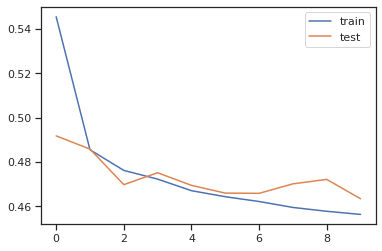

In [104]:
plt.figure(figsize=(6,4))
plt.plot(history_ANN_1.history['loss'], label='train')
plt.plot(history_ANN_1.history['val_loss'], label='test')
plt.legend()
plt.show()

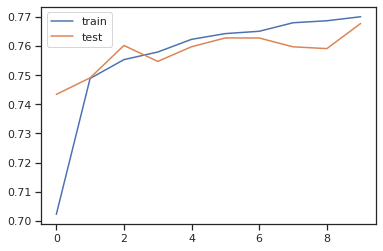

In [107]:
plt.figure(figsize=(6,4))
plt.plot(history_ANN_1.history['accuracy'], label='train')
plt.plot(history_ANN_1.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [121]:
model_ANN_2 = Sequential()

model_ANN_2.add(Dense(units=180, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
model_ANN_2.add(Dense(units=100, kernel_initializer='normal', activation='relu'))
model_ANN_2.add(Dense(units=80, kernel_initializer='normal', activation='relu'))
model_ANN_2.add(Dense(units=40, kernel_initializer='normal', activation='relu'))
model_ANN_2.add(Dense(1, activation="sigmoid"))   #.......... Since we need output layer to classify between 0 or 1 

# Compile the model
tf.keras.metrics.BinaryAccuracy(name="binary_accuracy", dtype=None, threshold=0.5)
model_ANN_2.compile(loss="binary_crossentropy", metrics=[tf.keras.metrics.BinaryAccuracy()], optimizer="SGD")

model_ANN_2.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 180)               5580      
                                                                 
 dense_26 (Dense)            (None, 100)               18100     
                                                                 
 dense_27 (Dense)            (None, 80)                8080      
                                                                 
 dense_28 (Dense)            (None, 40)                3240      
                                                                 
 dense_29 (Dense)            (None, 1)                 41        
                                                                 
Total params: 35,041
Trainable params: 35,041
Non-trainable params: 0
_________________________________________________________________


In [122]:
# Fit the model
history_ANN_2 = model_ANN_2.fit(x=X_train, y=y_train, batch_size=80, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
1949/1949 [==============================] - 9s 4ms/step - loss: 0.6915 - binary_accuracy: 0.5484 - val_loss: 0.6900 - val_binary_accuracy: 0.5656
Epoch 2/20
1949/1949 [==============================] - 8s 4ms/step - loss: 0.6868 - binary_accuracy: 0.5845 - val_loss: 0.6823 - val_binary_accuracy: 0.5934
Epoch 3/20
1949/1949 [==============================] - 8s 4ms/step - loss: 0.6717 - binary_accuracy: 0.6183 - val_loss: 0.6562 - val_binary_accuracy: 0.6500
Epoch 4/20
1949/1949 [==============================] - 8s 4ms/step - loss: 0.6280 - binary_accuracy: 0.6760 - val_loss: 0.5980 - val_binary_accuracy: 0.6963
Epoch 5/20
1949/1949 [==============================] - 8s 4ms/step - loss: 0.5673 - binary_accuracy: 0.7138 - val_loss: 0.5413 - val_binary_accuracy: 0.7355
Epoch 6/20
1949/1949 [==============================] - 8s 4ms/step - loss: 0.5217 - binary_accuracy: 0.7396 - val_loss: 0.5070 - val_binary_accuracy: 0.7484
Epoch 7/20
1949/1949 [==============================

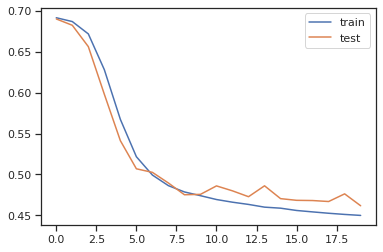

In [133]:
plt.figure(figsize=(6,4))
plt.plot(history_ANN_2.history['loss'], label='train')
plt.plot(history_ANN_2.history['val_loss'], label='test')
plt.legend()
plt.show()

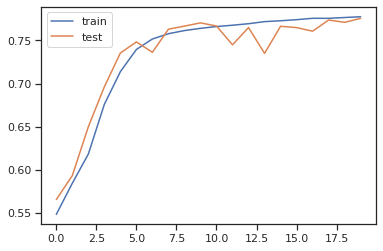

In [134]:
plt.figure(figsize=(6,4))
plt.plot(history_ANN_2.history['binary_accuracy'], label='train')
plt.plot(history_ANN_2.history['val_binary_accuracy'], label='test')
plt.legend()
plt.show()

In [135]:
test_loss_2, test_acc_2 = model_ANN_2.evaluate(X_val,  y_val, verbose=2)

print('\nTest accuracy - trial 2:', test_acc_2*100)

ANN_pred_2 = model_ANN_2.predict(X_test_scaled)

1218/1218 - 2s - loss: 0.4618 - binary_accuracy: 0.7757 - 2s/epoch - 1ms/step

Test accuracy - trial 2: 77.57023572921753


In [136]:
ANN_pred_2 = model_ANN_2.predict(X_test_scaled)

unique, counts = np.unique(ANN_pred_2, return_counts=True)

result_ANN_2 = np.column_stack((unique, counts)) 
print("result ANN 2",result_ANN_2)

result ANN 2 [[1.14071321e-04 1.00000000e+00]
 [7.99268484e-04 1.00000000e+00]
 [1.32852793e-03 1.00000000e+00]
 ...
 [9.95255291e-01 1.00000000e+00]
 [9.95826185e-01 1.00000000e+00]
 [9.95886385e-01 1.00000000e+00]]


In [137]:
ANN_2_test_pred = Test_set_df["ID"]
ANN_2_pred_df = pd.DataFrame(ANN_pred_2)
#reset index 
ANN_2_test_pred = ANN_2_test_pred.reset_index(drop=True)
ANN_2_pred_df   = ANN_2_pred_df.reset_index(drop=True)

result_data_ANN_2 = pd.concat([ANN_2_test_pred,ANN_2_pred_df],axis=1)

result_data_ANN_2.columns = ['ID', 'Default']

result_data_ANN_2.loc[:,'Default'] = result_data_ANN_2['Default'].apply(lambda x: "0" if x <= 0.5 else 1)

result_data_ANN_2.to_csv('/content/drive/MyDrive/Colab Notebooks/Project/Hackathon/Ramesh_Gopinath_ANN_prediction_3.csv', index=False)

In [217]:
model_ANN_3 = Sequential()

model_ANN_3.add(Dense(units=300, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
model_ANN_3.add(Dense(units=240, kernel_initializer='normal', activation='relu'))
model_ANN_3.add(Dense(units=200, kernel_initializer='normal', activation='relu'))
model_ANN_3.add(Dense(units=150, kernel_initializer='normal', activation='relu'))
model_ANN_3.add(Dense(units=100, kernel_initializer='normal', activation='relu'))
model_ANN_3.add(Dense(units=80, kernel_initializer='normal', activation='relu'))
model_ANN_3.add(Dense(units=60, kernel_initializer='normal', activation='relu'))
model_ANN_3.add(Dense(units=40, kernel_initializer='normal', activation='relu'))
model_ANN_3.add(Dense(units=20, kernel_initializer='normal', activation='relu'))
model_ANN_3.add(Dense(1, activation="sigmoid"))   #.......... Since we need output layer to classify between 0 or 1 

# Compile the model
tf.keras.metrics.BinaryAccuracy(name="binary_accuracy", dtype=None, threshold=0.5)
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model_ANN_3.compile(loss="binary_crossentropy", metrics=[tf.keras.metrics.BinaryAccuracy()], optimizer=opt)

model_ANN_3.summary()


Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_110 (Dense)           (None, 300)               13200     
                                                                 
 dense_111 (Dense)           (None, 240)               72240     
                                                                 
 dense_112 (Dense)           (None, 200)               48200     
                                                                 
 dense_113 (Dense)           (None, 150)               30150     
                                                                 
 dense_114 (Dense)           (None, 100)               15100     
                                                                 
 dense_115 (Dense)           (None, 80)                8080      
                                                                 
 dense_116 (Dense)           (None, 60)              

In [218]:
# Fit the model
history_ANN_3 = model_ANN_3.fit(x=X_train, y=y_train, batch_size=70, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
2228/2228 [==============================] - 25s 10ms/step - loss: 0.5390 - binary_accuracy: 0.7033 - val_loss: 0.4985 - val_binary_accuracy: 0.7390
Epoch 2/20
2228/2228 [==============================] - 23s 10ms/step - loss: 0.4804 - binary_accuracy: 0.7538 - val_loss: 0.4898 - val_binary_accuracy: 0.7440
Epoch 3/20
2228/2228 [==============================] - 23s 10ms/step - loss: 0.4709 - binary_accuracy: 0.7607 - val_loss: 0.4672 - val_binary_accuracy: 0.7659
Epoch 4/20
2228/2228 [==============================] - 24s 11ms/step - loss: 0.4632 - binary_accuracy: 0.7663 - val_loss: 0.4611 - val_binary_accuracy: 0.7676
Epoch 5/20
2228/2228 [==============================] - 22s 10ms/step - loss: 0.4574 - binary_accuracy: 0.7704 - val_loss: 0.4584 - val_binary_accuracy: 0.7718
Epoch 6/20
2228/2228 [==============================] - 22s 10ms/step - loss: 0.4541 - binary_accuracy: 0.7735 - val_loss: 0.4565 - val_binary_accuracy: 0.7728
Epoch 7/20
2228/2228 [==================

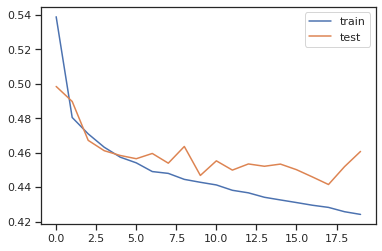

In [219]:
plt.figure(figsize=(6,4))
plt.plot(history_ANN_3.history['loss'], label='train')
plt.plot(history_ANN_3.history['val_loss'], label='test')
plt.legend()
plt.show()

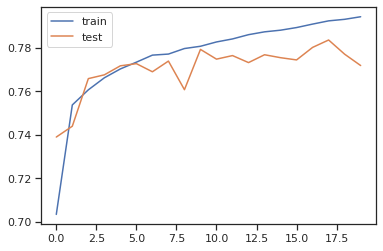

In [220]:
plt.figure(figsize=(6,4))
plt.plot(history_ANN_3.history['binary_accuracy'], label='train')
plt.plot(history_ANN_3.history['val_binary_accuracy'], label='test')
plt.legend()
plt.show()

In [221]:
test_loss_3, test_acc_3 = model_ANN_3.evaluate(X_val,  y_val, verbose=2)

print('\nTest accuracy - trial 3:', test_acc_3*100)


1218/1218 - 3s - loss: 0.4607 - binary_accuracy: 0.7719 - 3s/epoch - 2ms/step

Test accuracy - trial 3: 77.19307541847229


In [222]:
X_test = new_test_imputed.drop(["ID"], axis=1)
X_test_scaled = X_test.apply(zscore)
ANN_pred_3 = model_ANN_3.predict(X_test_scaled)

unique, counts = np.unique(ANN_pred_3, return_counts=True)

result_ANN_3 = np.column_stack((unique, counts)) 
print("result ANN 3",result_ANN_3)

result ANN 3 [[ 0.12928039  1.        ]
 [ 0.13023001  1.        ]
 [ 0.13212469  1.        ]
 ...
 [ 0.99999982  1.        ]
 [ 0.99999988  4.        ]
 [ 1.         35.        ]]


In [223]:
ANN_3_test_pred = Test_set_df["ID"]
ANN_3_pred_df = pd.DataFrame(ANN_pred_3)
#reset index 
ANN_3_test_pred = ANN_3_test_pred.reset_index(drop=True)
ANN_3_pred_df   = ANN_3_pred_df.reset_index(drop=True)

result_data_ANN_3 = pd.concat([ANN_3_test_pred,ANN_3_pred_df],axis=1)

result_data_ANN_3.columns = ['ID', 'Default']

result_data_ANN_3.loc[:,'Default'] = result_data_ANN_3['Default'].apply(lambda x: "0" if x <= 0.5 else 1)

result_data_ANN_3.to_csv('/content/drive/MyDrive/Colab Notebooks/Project/Hackathon/Ramesh_Gopinath_ANN_prediction_6.csv', index=False)

## Descriptive Section

### Q) Once you have a mechanism to estimate the “level of default”, please describe how the financial institution must use that mechanism to decide whether to approve or decline the prospect for the loan they are applying for. 
##### (This is an open-ended question and you are free to come up with a detailed explanation basis the analysis, model building exercise you have carried out)

In this approach I have done the following

- Imputed blank rows in Train dataset and Test dataset with KNNImputer()
- Label encoded 10 columns in Train and Test dataset
- OneHotencoded 3 columns in Train and Test dataset
- Found an imbalance in the distribution of Default in Training set, 74% Non-default and 26% Default, hence upsampled the Training set to balance the Target variable
- Used 80% of the Training set as Training data and 20% of Training set as "Validation data"

and finally Predicted the Defaulting on the Test dataset with Logistic Regression.

The Logistic regression model predicts all the 56,000+ rows of data as Non-defaulters. So loans can easily be given to the applicants predicted in the Test dataset.

It is also very important not to have blank rows in so much of data, so it is highly recommended that Data gatherers should ensure all the data should be captured to enable better predictions

Even the **XGB model** also predicts **all the 56000+ rows of data as Non-defaulters**, so loans can be given to the applicants predicted in the Test dataset.

Even the **GradientBoostingClassier model** also predicts all the **56000+ rows of data as Non-defaulters**, so loans can be given to the applicants predicted in the Test dataset.

**K Nearest Neighbour** with Neighbours=3, wieghts=Uniform, leaf_size=7, p=2 has given a different prediction....

It predicts **35.53% as Non-defaulters** and **64.46% to be Defaulters.**.... 

K Nearest Neighbour with Neighbours=5, wieghts=Distance, leaf_size=7, p=2 has given a different prediction....

It predicts 35.53% as Non-defaulters and 64.46% to be Defaulters.....

Tried Catboost Classifier and it gave a prediction that all the applicants are Non-faulters

Tried Artificial Neural Network 3 different models and and each of the model gave me different set of Probabilities between 0 and 1 for the applicant ID.  Applying a threshold of 0.5 so that anything more than 0.5 will be treated as 1 and anything less than 0.5 will be treated as 0.  

Each model gave me varying percentages of defaulters and Non-defaulters